<div style="display: flex; justify-content: space-between; align-items: center;">
    <img src="https://logos-download.com/wp-content/uploads/2022/11/London_School_of_Economics_and_Political_Science_Logo.png" alt="LSE Logo" style="width: 600px;margin-right: 250px"/>
    <img src="http://localhost:8889/files/Downloads/TurtleGamesLogo.png?_xsrf=2%7Cfa150998%7Cdae34090ba1d2a228c5936897e7cf2e7%7C1732185955" alt="TG Logo" style="width: 200px;margin-right: 100px"/>
</div>

### LSE Data Analytics Online Career Accelerator

# Course 3: Advanced Analytics for Organisational Impact - Sujith Kumaar K C

## Assignment: Predicting Future Outcomes - Turtle Games : ***Python***

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
&emsp;&emsp;[1. Load and Explore the data](#1.-Load-and-Explore-the-data)<br>
&emsp;&emsp;&emsp;[a. Import Packages](#a.-Import-Packages)<br>
&emsp;&emsp;&emsp;[b. Load Data and Explore](#b.-Load-Data-and-Explore)<br>
&emsp;&emsp;&emsp;[c. Additional Data Quality Checks](#c.-Additional-Data-Quality-Checks)<br>
&emsp;&emsp;[2. Linear Regression](#2.-Linear-Regression)<br>
&emsp;&emsp;&emsp;[Loyalty Explained by Spending Score, Age, Income](#Loyalty-Explained-by-Spending-Score%2C-Age%2C-Income)<br>
&emsp;&emsp;&emsp;[a. Simple Linear Regression - Loyalty points explained by spending score](#a.-Simple-Linear-Regression---Loyalty-points-explained-by-spending-score)<br>
&emsp;&emsp;&emsp;[b. Simple Linear Regression - Loyalty points explained by remuneration](#b.-Simple-Linear-Regression---Loyalty-points-explained-by-remuneration)<br>
&emsp;&emsp;&emsp;[c. Simple Linear Regression - Loyalty points explained by age](#c.-Simple-Linear-Regression---Loyalty-points-explained-by-age)<br>
&emsp;&emsp;&emsp;[d. Summary of Simple Linear Regression Models](#d.-Summary-of-Simple-Linear-Regression-Models)<br>
&emsp;&emsp;&emsp;[e. Multiple Linear Regression Model](#e.-Multiple-Linear-Regression-Model)<br>
&emsp;&emsp;[3. Exploring the structure using decision trees](#3.-Exploring-the-structure-using-decision-trees)<br>
&emsp;&emsp;[4. Identifying Customer groups using k-Means](#4.-Identifying-Customer-groups-using-k-Means)<br>
&emsp;&emsp;&emsp;[a. Identifying cluster size](#a.-Identifying-cluster-size)<br>
&emsp;&emsp;&emsp;[b. Applying k-Means clustering](#b.-Applying-k-Means-clustering)<br>
&emsp;&emsp;&emsp;[c. Cluster-based Analysis and Persona identification](#c.-Cluster-based-Analysis-and-Persona-identification)<br>
&emsp;&emsp;&emsp;[d. Analysing Cluster Profiles](#d.-Analysing-Cluster-Profiles)<br>
&emsp;&emsp;[5. Analysing Customer Sentiment with Reviews](#5.-Analysing-Customer-Sentiment-with-Reviews)<br>
&emsp;&emsp;&emsp;[a. Sentiment Analysis](#5a.-Sentiment-Analysis)<br>
&emsp;&emsp;&emsp;[b. WordCloud and Common Words](#5b.-WordCloud-and-Common-Words)<br>
&emsp;&emsp;&emsp;[c. Sentiment Analysis - Product and Customer group level analysis](#5c.-Sentiment-Analysis---Product-and-Customer-group-level-analysis)<br>
&emsp;&emsp;&emsp;[d. Product-based Sentiment Analysis](#5d.-Product-based-Sentiment-Analysis)<br>
&emsp;&emsp;&emsp;[e. Customer Groups wise Sentiment Analysis](#5e.-Customer-Groups-wise-Sentiment-Analysis)<br>
&emsp;&emsp;[6. Insights and Recommendations](#6.-Insights-and-Recommendations)<br>


### 1. Load and Explore the data

##### a. Import Packages

In [7]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Test that the imports worked
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.24.3
Pandas version: 2.0.3
Scikit-learn version: 1.3.0


In [8]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import math

#StatsModels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

#SkLearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, r2_score, silhouette_score

#NLP
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from textblob import TextBlob

# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Note: Indicates situations that aren’t necessarily exceptions.
import warnings
warnings.filterwarnings('ignore')

##### b. Load Data and Explore

In [10]:
# Load the data
tgr = pd.read_csv('turtle_reviews.csv')

# Display first few rows
print("\nFirst few rows of the dataset:")
tgr.head()


First few rows of the dataset:


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [11]:
# Display dataset dimensions
print('\n\nNumber of instances = %d' % (tgr.shape[0]))
print('\nNumber of attributes = %d' % (tgr.shape[1]))

# Get basic information about the dataset
print("\nDataset Info:")
print(tgr.info())



Number of instances = 2000

Number of attributes = 11

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [12]:
# Drop unnecessary columns.
tgr.drop(columns=['language', 'platform'], inplace=True)

# Display cleaned up columns
print('Updated list of columns:')
for col in tgr.columns:
    print(col)


Updated list of columns:
gender
age
remuneration (k£)
spending_score (1-100)
loyalty_points
education
product
review
summary


In [13]:
# Rename columns for clarity
tgr.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"},inplace=True)

# Display cleaned up columns
print('Updated list of columns:')
for col in tgr.columns:
    print(col)

Updated list of columns:
gender
age
remuneration
spending_score
loyalty_points
education
product
review
summary


In [14]:
# Check for missing values
print('Number of missing values:')
for col in tgr.columns:
    print('\t%s: %d' % (col,tgr[col].isna().sum()))

# Check for duplicates
print('Number of duplicates: %d' % (tgr.duplicated().sum()))

Number of missing values:
	gender: 0
	age: 0
	remuneration: 0
	spending_score: 0
	loyalty_points: 0
	education: 0
	product: 0
	review: 0
	summary: 0
Number of duplicates: 0


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;font-weight: bold">
           Since there are no duplicates or missing values, we can proceed to exploring the data further.
    </ul>
</div>

In [16]:
# Display summary statistics
print("\nSummary Statistics:")
print(tgr[['age', 'remuneration', 'spending_score', 'loyalty_points']].describe().round(3))



Summary Statistics:
            age  remuneration  spending_score  loyalty_points
count  2000.000      2000.000        2000.000        2000.000
mean     39.495        48.079          50.000        1578.032
std      13.573        23.124          26.095        1283.240
min      17.000        12.300           1.000          25.000
25%      29.000        30.340          32.000         772.000
50%      38.000        47.150          50.000        1276.000
75%      49.000        63.960          73.000        1751.250
max      72.000       112.340          99.000        6847.000


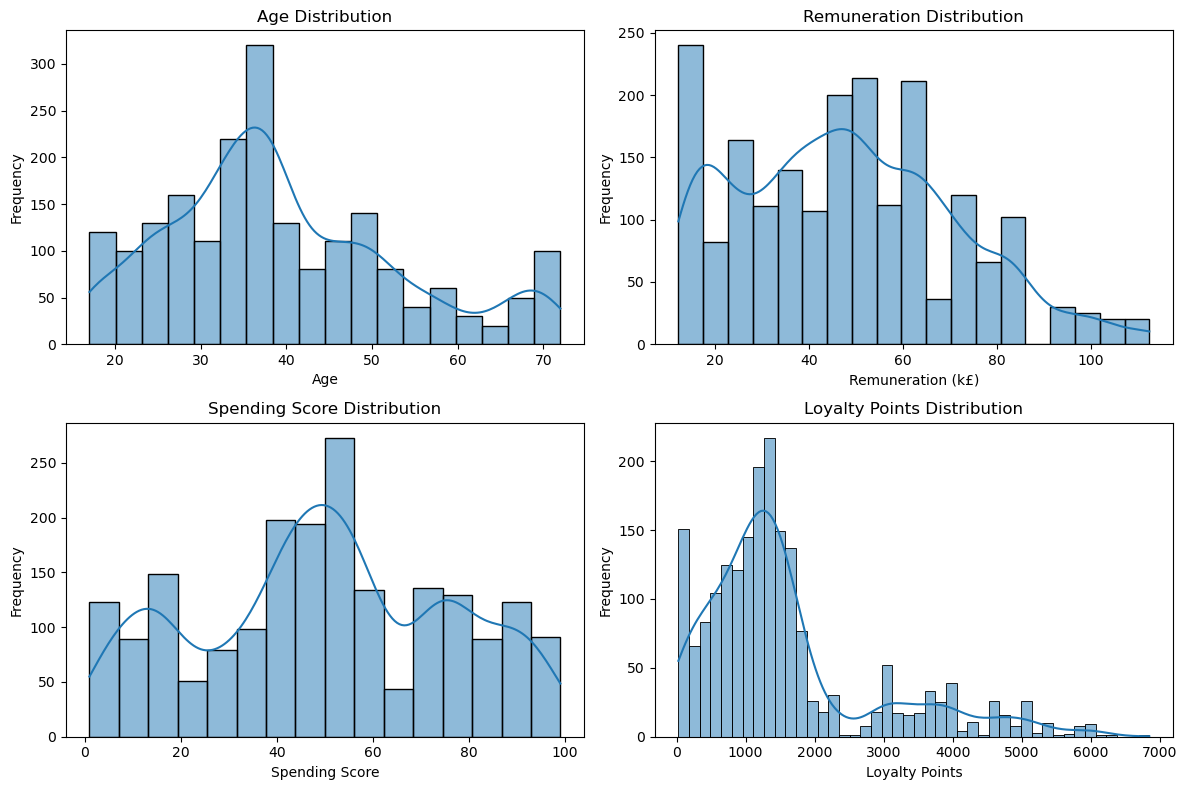

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=tgr, x='age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data=tgr, x='remuneration', kde=True)
plt.title('Remuneration Distribution')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data=tgr, x='spending_score', kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data=tgr, x='loyalty_points', kde=True)
plt.title('Loyalty Points Distribution')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')

plt.tight_layout()


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;font-weight: bold">
         The Distribution plots show that there are no negative values in the data. We can also see that the data is skewed.
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> 1. Loyalty points - The data is right skewed.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> 2. Spending score - The data is right skewed.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> 3. Age - The data is left skewed.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> 4. Remuneration - The data is left skewed.</li>
    </ul>
</div>

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
         <b>Applying log transformation to these columns, we see how the distributions change.</b>
        </li>
    </ul>
</div>

Skewness of variables:
loyalty_points: 1.465
spending_score: -0.042
remuneration: 0.413
age: 0.609


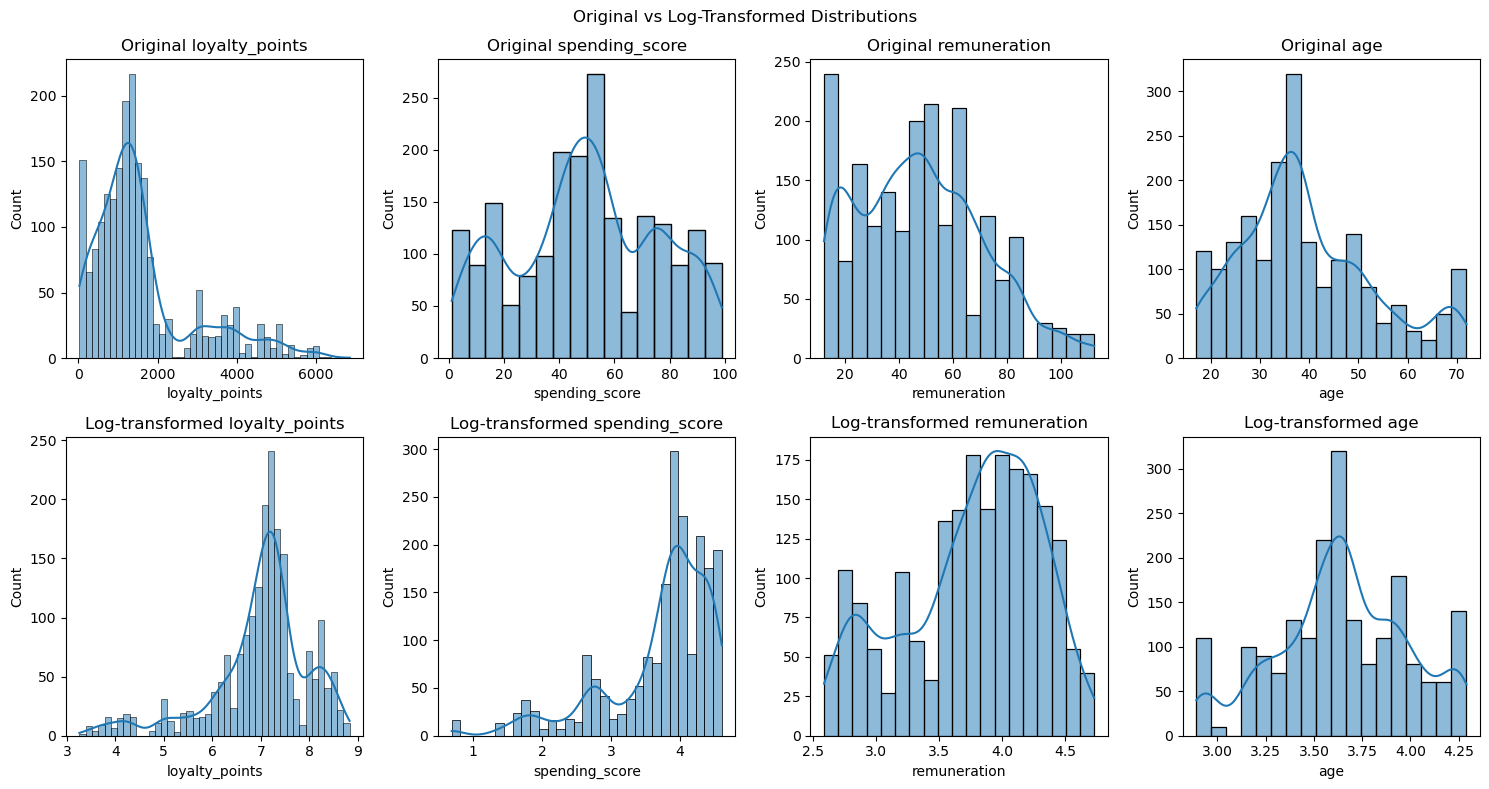

In [20]:
# Calculate skewness for numerical columns
numerical_cols = ['loyalty_points', 'spending_score', 'remuneration', 'age']
skewness = tgr[numerical_cols].skew()

print("Skewness of variables:")
for col in numerical_cols:
    print(f"{col}: {skewness[col]:.3f}")

# Visualize distributions side by side
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Original vs Log-Transformed Distributions')

for idx, col in enumerate(numerical_cols):
    # Original distribution
    sns.histplot(data=tgr, x=col, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Original {col}')

    # Log-transformed distribution
    log_data = np.log1p(tgr[col])
    sns.histplot(data=log_data, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Log-transformed {col}')

plt.tight_layout()
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 14px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            Based on the skewness values and the plots, we can see that <b>loyalty_points requires log transformation</b>, while the other variables are currently moderately skewed, and transforming them will not be necessary.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            Transforming Loyalty points alone could make interpretation of the analysis difficult - so we will retain the loyalty points as is for now and will transform them as required.
        </li>
    </ul>
</div>

#### c. Additional Data Quality Checks

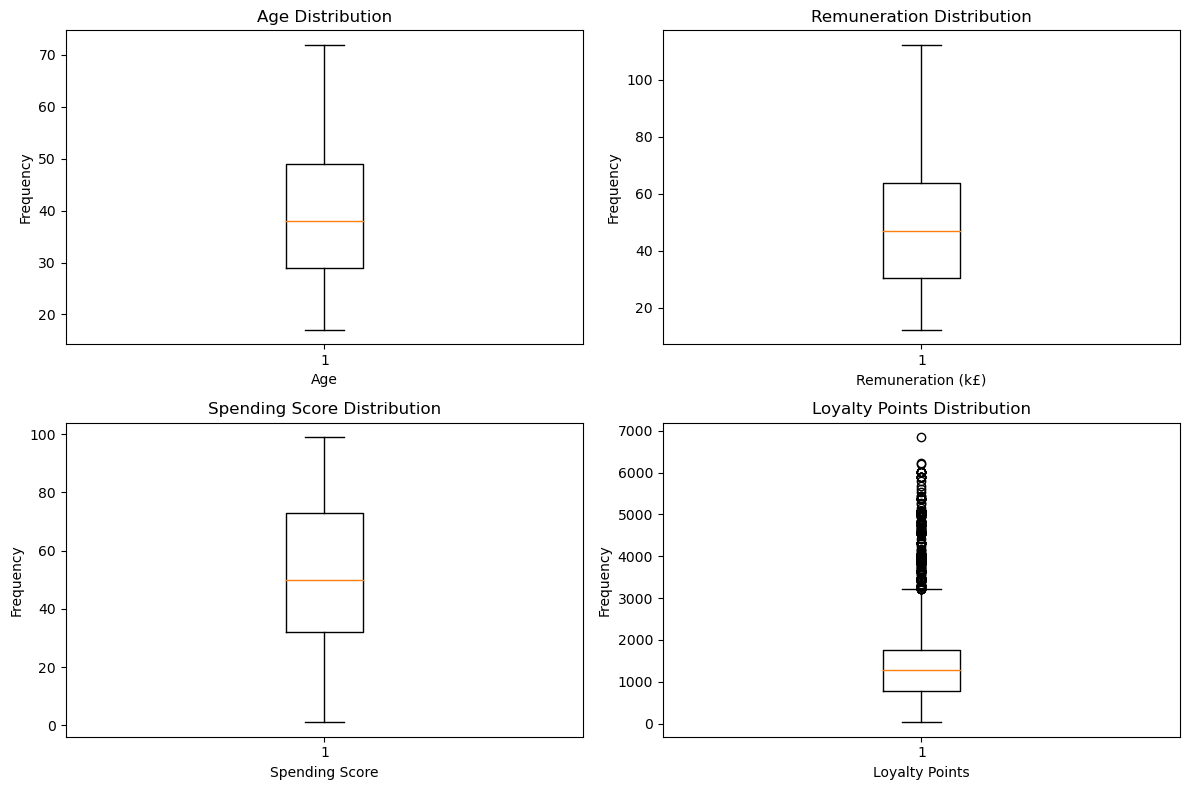

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(tgr['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.boxplot(tgr['remuneration'])
plt.title('Remuneration Distribution')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.boxplot(tgr['spending_score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.boxplot(tgr['loyalty_points'])
plt.title('Loyalty Points Distribution')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')

plt.tight_layout()

<div style="
    background-color: #ffe6e6;
    border: 1px solid #ff6666;
    border-left: 20px solid #ff6666;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 14px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Loyalty points has outliers and is right skewed. The other plots shows that there are no significant outliers in the data.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Since we have only 2000 observations, we will retain the outliers in the data and remove them if analysis shows that they are affecting the prediction results
        </li>
    </ul>
</div>

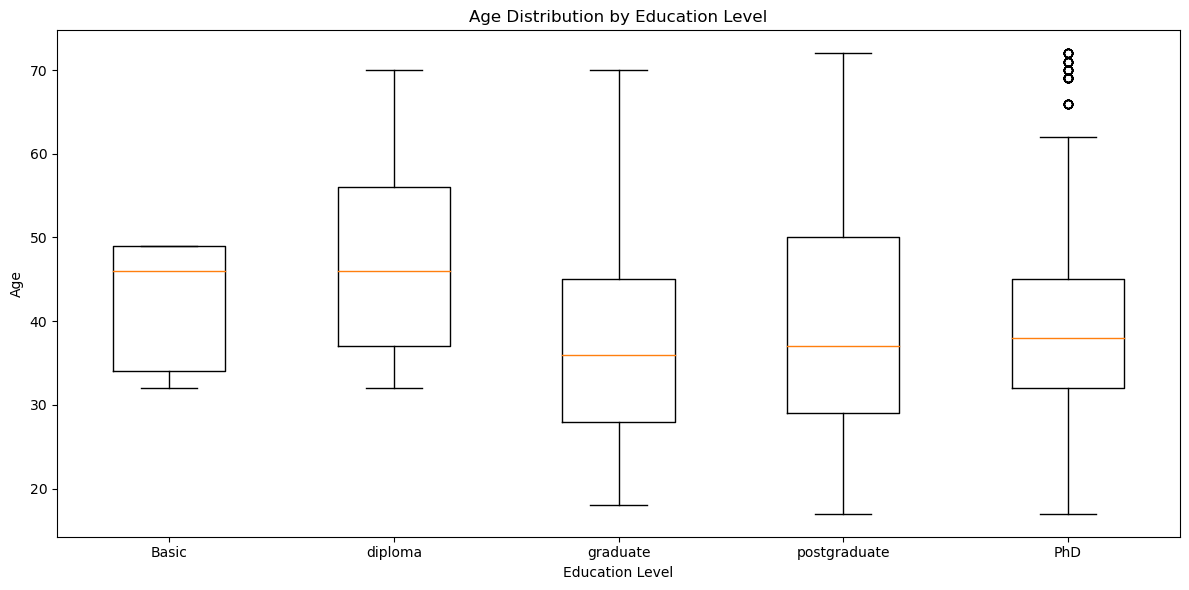

In [25]:
# Create subsets by education with specific order
education_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']
education_groups = [tgr[tgr['education'] == level]['age'] for level in education_order]

plt.figure(figsize=(12, 6))

# Create boxplots for age distribution by education
plt.boxplot(education_groups, labels=education_order)
plt.title('Age Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Age')

plt.tight_layout()

In [26]:
# Exploring the data quality for age
def highlight_keywords(text):
    if isinstance(text, str):
        keywords = ["son", "kid", "daughter", "year old"]
        has_keyword = any(keyword in text.lower() for keyword in keywords)
        if has_keyword:
            text = text.replace("son", "<span style='background-color: yellow'>son</span>")
            text = text.replace("kid", "<span style='background-color: yellow'>kid</span>")
            text = text.replace("daughter", "<span style='background-color: yellow'>daughter</span>")
            text = text.replace("year old", "<span style='background-color: yellow'>year old</span>")
            return text
    return None

filtered_df = tgr[(tgr['education'].isin(['PhD', 'postgraduate'])) & (tgr['age'] <= 20)]
print(f"Potentially Misrepresented age data based on education and review: {len(filtered_df)}")
filtered_df['highlighted_review'] = filtered_df['review'].apply(highlight_keywords)
filtered_df = filtered_df.dropna(subset=['highlighted_review'])
print("\n\nExample of misrepresented age data based on education and review:")
filtered_df.drop(columns=['summary', 'review']).rename(columns={'highlighted_review': 'review'}).style.format({'review': lambda x: x})

Potentially Misrepresented age data based on education and review: 50


Example of misrepresented age data based on education and review:


<div style="
    background-color: #ffe6e6;
    border: 1px solid #ff6666;
    border-left: 20px solid #ff6666;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 14px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.5;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            We can see that there are 50 customers who are PhD or postgraduate and are less than 20 years old.
        </li>
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
        These customers in their reviews also talk about kids / grandchildren which lets us infer that <b>age is likely misreported and we should treat age data with caution.</b>
        </li>
    </ul>
</div>

In [28]:
# Save the DataFrame to a CSV file
tgr.to_csv('turtle_reviews_cleaned.csv', index=False)

# Read back the CSV file and display the first few rows
tgr_cleaned = pd.read_csv('turtle_reviews_cleaned.csv')
print("\nFirst few rows of data read from CSV:")
tgr_cleaned.head()


First few rows of data read from CSV:


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### 2. Linear Regression

#### Loyalty Explained by Spending Score, Age, Income


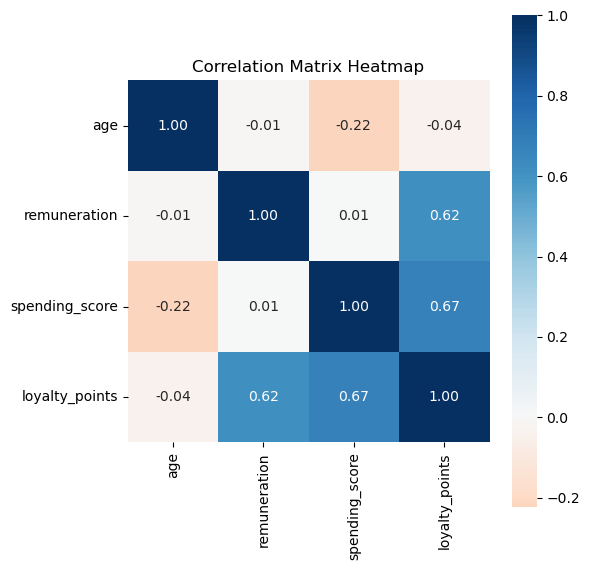

In [31]:
# Create a correlation plot using seaborn
plt.figure(figsize=(6,6))
sns.heatmap(tgr_cleaned[['age', 'remuneration', 'spending_score', 'loyalty_points']].corr(),
            annot=True,
            fmt='.2f',
            cmap='RdBu',
            center=0,
            square=True,
           )
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
             Loyalty points has a strong positive correlation with spending score and remuneration
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            Age has a negative correlation with loyalty points
        </li>
    </ul>
</div>

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            <b>Note:</b> We had also identified that loyalty points is right-skewed and would require log transformation.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            Applying log transformation to loyalty points and standardizing the other variables below
        </li>
    </ul>
</div>

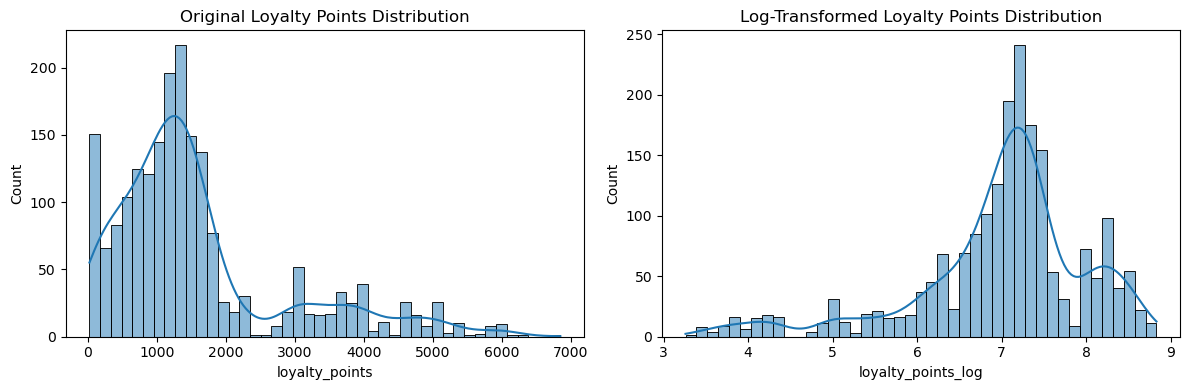

In [34]:
# Import required packages
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a copy of the features we'll use for regression
regression_data = tgr[['loyalty_points', 'spending_score', 'remuneration', 'age']].copy()

# Apply log transformation to loyalty_points (adding 1 to handle zeros)
regression_data['loyalty_points_log'] = np.log1p(regression_data['loyalty_points'])

# Visualize the effect of log transformation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=regression_data, x='loyalty_points', kde=True)
plt.title('Original Loyalty Points Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=regression_data, x='loyalty_points_log', kde=True)
plt.title('Log-Transformed Loyalty Points Distribution')

plt.tight_layout()
plt.show()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform all features
scaled_data = pd.DataFrame(
    scaler.fit_transform(regression_data[['loyalty_points_log', 'spending_score', 'remuneration', 'age']]),
    columns=['loyalty_points_log', 'spending_score', 'remuneration', 'age'],
    index=regression_data.index
)

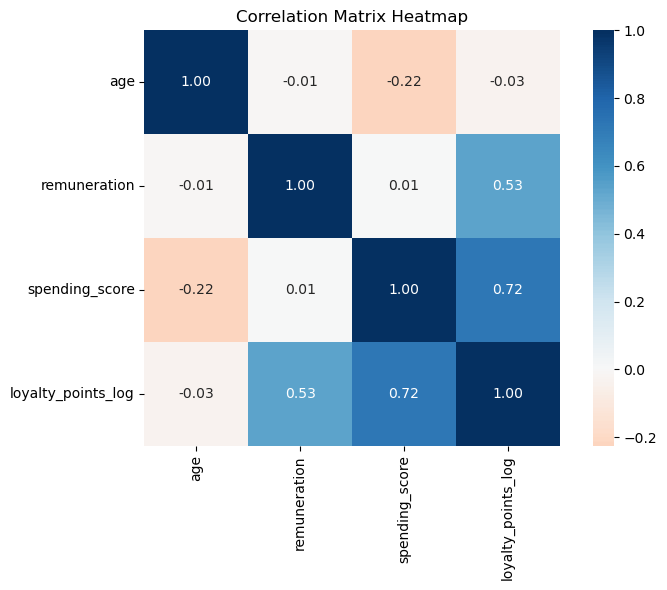

In [35]:
# Create a correlation plot using seaborn - Loyalty points Log Converted
plt.figure(figsize=(8, 6))
sns.heatmap(scaled_data[['age', 'remuneration', 'spending_score', 'loyalty_points_log']].corr(),
            annot=True,
            fmt='.2f',
            cmap='RdBu',
            center=0,
            square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Positive correlation of Loyalty points with spending score has <b>increased. </b>
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Positive correlation of Loyalty points with remuneration has <b>reduced.</b>
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Negative correlation of Loyalty points with age has <b>reduced.</b>
        </li>
    </ul>
</div>

##### a. Simple Linear Regression - Loyalty points explained by spending score

Analysis with Log-Transformed Loyalty Points:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     loyalty_points_log   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2157.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          5.62e-320
Time:                        21:36:01   Log-Likelihood:                -2105.7
No. Observations:                2000   AIC:                             4215.
Df Residuals:                    1998   BIC:                             4227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

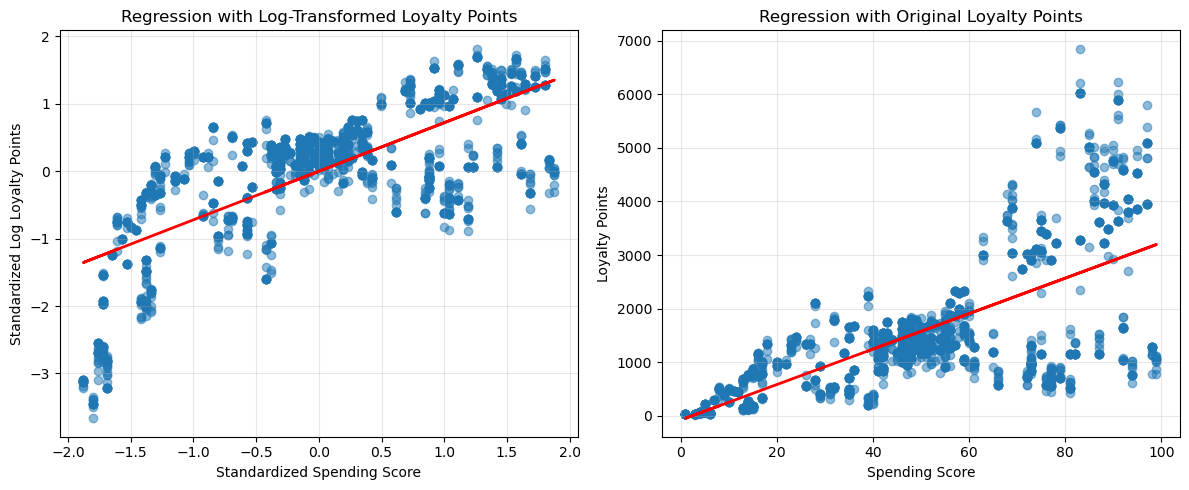

In [38]:
# Analysis with log-transformed loyalty points
print("Analysis with Log-Transformed Loyalty Points:")
print("-" * 50)

# Define Independent (X) and Dependent (y) variables for log-transformed data
X_log = scaled_data[['spending_score']]
y_log = scaled_data['loyalty_points_log']

# Create and fit the model for log-transformed data
model_log_ss = sm.OLS(y_log, sm.add_constant(X_log)).fit()

# Print model summary
print(model_log_ss.summary())

# Extract parameters
coefficients_log = model_log_ss.params
std_errors_log = model_log_ss.bse
predicted_log = model_log_ss.predict(sm.add_constant(X_log))

# Create regression results table
regression_results_log = pd.DataFrame({
    'Variable': ['Constant', 'Spending Score'],
    'Coefficient': coefficients_log,
    'Std Error': std_errors_log
})
print("\nRegression Results (Log-transformed):")
print(regression_results_log)

# Plot for log-transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_log, y_log, alpha=0.5)
plt.plot(X_log, predicted_log, color='red', linewidth=2)
plt.xlabel('Standardized Spending Score')
plt.ylabel('Standardized Log Loyalty Points')
plt.title('Regression with Log-Transformed Loyalty Points')
plt.grid(True, alpha=0.3)

# Analysis with original loyalty points
print("\n\nAnalysis with Original Loyalty Points:")
print("-" * 50)

# Define Independent (X) and Dependent (y) variables for original data
X_orig = tgr_cleaned[['spending_score']]
y_orig = tgr_cleaned['loyalty_points']

# Create and fit the model for original data
model_orig_ss = sm.OLS(y_orig, sm.add_constant(X_orig)).fit()

# Print model summary
print(model_orig_ss.summary())

# Extract parameters
coefficients_orig = model_orig_ss.params
std_errors_orig = model_orig_ss.bse
predicted_orig = model_orig_ss.predict(sm.add_constant(X_orig))

# Create regression results table
regression_results_orig = pd.DataFrame({
    'Variable': ['Constant', 'Spending Score'],
    'Coefficient': coefficients_orig,
    'Std Error': std_errors_orig
})
print("\nRegression Results (Original):")
print(regression_results_orig)

# Plot for original data
plt.subplot(1, 2, 2)
plt.scatter(X_orig, y_orig, alpha=0.5)
plt.plot(X_orig, predicted_orig, color='red', linewidth=2)
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Regression with Original Loyalty Points')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### b. Simple Linear Regression - Loyalty points explained by remuneration

Analysis with Log-Transformed Loyalty Points:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     loyalty_points_log   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     796.8
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          8.16e-148
Time:                        21:36:02   Log-Likelihood:                -2502.3
No. Observations:                2000   AIC:                             5009.
Df Residuals:                    1998   BIC:                             5020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

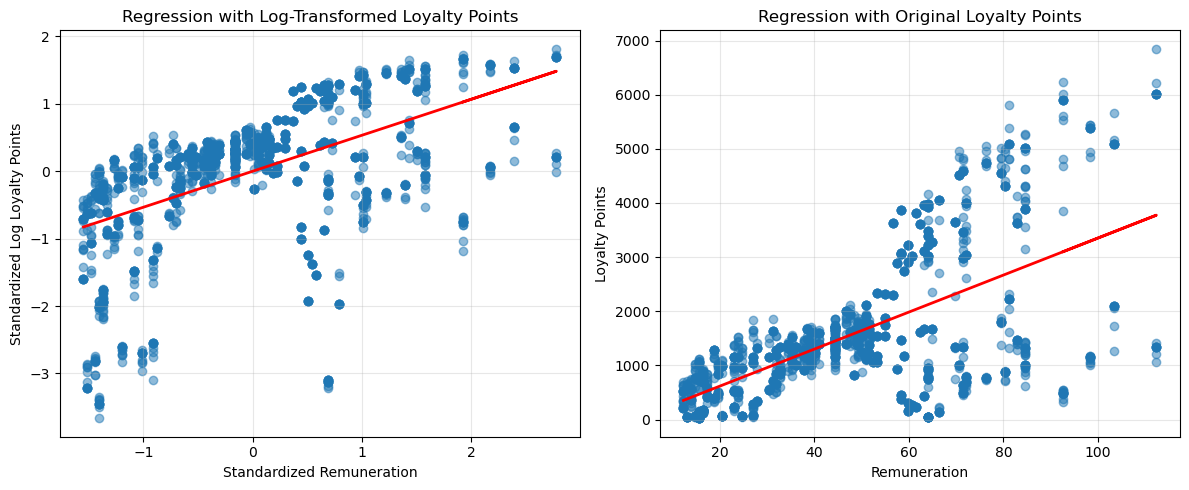

In [40]:
# Analysis with log-transformed loyalty points
print("Analysis with Log-Transformed Loyalty Points:")
print("-" * 50)

# Define Independent (X) and Dependent (y) variables for log-transformed data
X_log = scaled_data[['remuneration']]
y_log = scaled_data['loyalty_points_log']

# Create and fit the model for log-transformed data
model_log_rem = sm.OLS(y_log, sm.add_constant(X_log)).fit()

# Print model summary
print(model_log_rem.summary())

# Extract parameters
coefficients_log = model_log_rem.params
std_errors_log = model_log_rem.bse
predicted_log = model_log_rem.predict(sm.add_constant(X_log))

# Create regression results table
regression_results_log = pd.DataFrame({
    'Variable': ['Constant', 'Remuneration'],
    'Coefficient': coefficients_log,
    'Std Error': std_errors_log
})
print("\nRegression Results (Log-transformed):")
print(regression_results_log)

# Plot for log-transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_log, y_log, alpha=0.5)
plt.plot(X_log, predicted_log, color='red', linewidth=2)
plt.xlabel('Standardized Remuneration')
plt.ylabel('Standardized Log Loyalty Points')
plt.title('Regression with Log-Transformed Loyalty Points')
plt.grid(True, alpha=0.3)

# Analysis with original loyalty points
print("\n\nAnalysis with Original Loyalty Points:")
print("-" * 50)

# Define Independent (X) and Dependent (y) variables for original data
X_orig = tgr_cleaned[['remuneration']]
y_orig = tgr_cleaned['loyalty_points']

# Create and fit the model for original data
model_orig_rem = sm.OLS(y_orig, sm.add_constant(X_orig)).fit()

# Print model summary
print(model_orig_rem.summary())

# Extract parameters
coefficients_orig = model_orig_rem.params
std_errors_orig = model_orig_rem.bse
predicted_orig = model_orig_rem.predict(sm.add_constant(X_orig))

# Create regression results table
regression_results_orig = pd.DataFrame({
    'Variable': ['Constant', 'Remuneration'],
    'Coefficient': coefficients_orig,
    'Std Error': std_errors_orig
})
print("\nRegression Results (Original):")
print(regression_results_orig)

# Plot for original data
plt.subplot(1, 2, 2)
plt.scatter(X_orig, y_orig, alpha=0.5)
plt.plot(X_orig, predicted_orig, color='red', linewidth=2)
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Regression with Original Loyalty Points')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### c. Simple Linear Regression - Loyalty points explained by age

Analysis with Log-Transformed Loyalty Points:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     loyalty_points_log   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.376
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.123
Time:                        21:36:03   Log-Likelihood:                -2836.7
No. Observations:                2000   AIC:                             5677.
Df Residuals:                    1998   BIC:                             5689.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

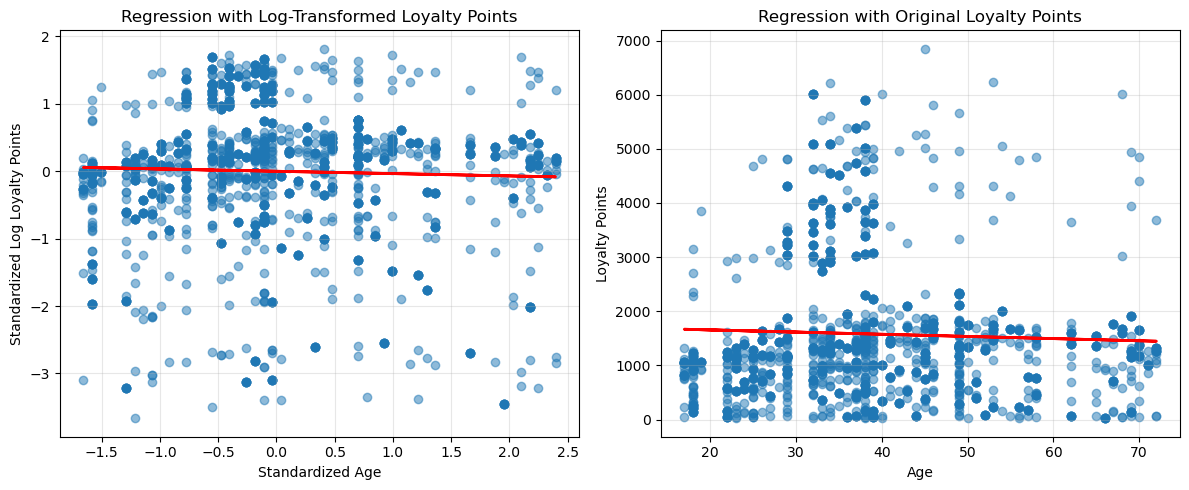

In [42]:
# Analysis with log-transformed loyalty points
print("Analysis with Log-Transformed Loyalty Points:")
print("-" * 50)

# Define Independent (X) and Dependent (y) variables for log-transformed data
X_log = scaled_data[['age']]
y_log = scaled_data['loyalty_points_log']

# Create and fit the model for log-transformed data
model_log_age = sm.OLS(y_log, sm.add_constant(X_log)).fit()

# Print model summary
print(model_log_age.summary())

# Extract parameters
coefficients_log = model_log_age.params
std_errors_log = model_log_age.bse
predicted_log = model_log_age.predict(sm.add_constant(X_log))

# Create regression results table
regression_results_log = pd.DataFrame({
    'Variable': ['Constant', 'age'],
    'Coefficient': coefficients_log,
    'Std Error': std_errors_log
})
print("\nRegression Results (Log-transformed):")
print(regression_results_log)

# Plot for log-transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_log, y_log, alpha=0.5)
plt.plot(X_log, predicted_log, color='red', linewidth=2)
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Log Loyalty Points')
plt.title('Regression with Log-Transformed Loyalty Points')
plt.grid(True, alpha=0.3)

# Analysis with original loyalty points
print("\n\nAnalysis with Original Loyalty Points:")
print("-" * 50)

# Define Independent (X) and Dependent (y) variables for original data
X_orig = tgr_cleaned[['age']]
y_orig = tgr_cleaned['loyalty_points']

# Create and fit the model for original data
model_orig_age = sm.OLS(y_orig, sm.add_constant(X_orig)).fit()

# Print model summary
print(model_orig_age.summary())

# Extract parameters
coefficients_orig = model_orig_age.params
std_errors_orig = model_orig_age.bse
predicted_orig = model_orig_age.predict(sm.add_constant(X_orig))

# Create regression results table
regression_results_orig = pd.DataFrame({
    'Variable': ['Constant', 'age'],
    'Coefficient': coefficients_orig,
    'Std Error': std_errors_orig
})
print("\nRegression Results (Original):")
print(regression_results_orig)

# Plot for original data
plt.subplot(1, 2, 2)
plt.scatter(X_orig, y_orig, alpha=0.5)
plt.plot(X_orig, predicted_orig, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Regression with Original Loyalty Points')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### d. Summary of Simple Linear Regression Models

In [44]:
# Create a summary table of all regression models
models_summary = pd.DataFrame({
    'Model': [
      'Loyalty Points vs Spending Score',
      'Loyalty Points vs Remuneration',
      'Loyalty Points vs Age',
      'Log Loyalty Points vs Spending Score',
      'Log Loyalty Points vs Remuneration',
      'Log Loyalty Points vs Age'
    ],
    'R-squared': [
        model_orig_ss.rsquared,
        model_orig_rem.rsquared,
        model_orig_age.rsquared,
        model_log_ss.rsquared,
        model_log_rem.rsquared,
        model_log_age.rsquared
    ],
    'P-value': [
        model_orig_ss.f_pvalue,
        model_orig_rem.f_pvalue,
        model_orig_age.f_pvalue,
        model_log_ss.f_pvalue,
        model_log_rem.f_pvalue,
        model_log_age.f_pvalue
    ]
})

# Format the numeric columns
models_summary['R-squared'] = models_summary['R-squared'].round(2)
models_summary['P-value'] = models_summary['P-value'].round(3)

print("\nSummary of All Regression Models:")
print("-" * 80)
print(models_summary.to_string(index=False))



Summary of All Regression Models:
--------------------------------------------------------------------------------
                               Model  R-squared  P-value
    Loyalty Points vs Spending Score       0.45    0.000
      Loyalty Points vs Remuneration       0.38    0.000
               Loyalty Points vs Age       0.00    0.058
Log Loyalty Points vs Spending Score       0.52    0.000
  Log Loyalty Points vs Remuneration       0.29    0.000
           Log Loyalty Points vs Age       0.00    0.123


<<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 8px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <p style="margin: 0; padding-bottom: 4px; font-weight: bold;">Based on the summary of all regression models, we can conclude:</p>
    <ul style="list-style-type: none; padding-left: 4px; line-height: 1.6; margin: 0;">
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Spending score and remuneration are significant predictors of loyalty points.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Age is not a significant predictor of loyalty points <b>P value = 0.05, R-square = 0.</b>
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Log transformation of loyalty points does not improve the model fit significantly.
        </li>
    </ul>
    <p style="margin-top: 12px;font-weight: bold;">Accordingly, we will apply multiple linear regression with spending score and remuneration as predictors and original loyalty points as the response variable.</p>
</div>


##### e. Multiple Linear Regression Model

In [47]:
# Define Independent (X) and Dependent (y) variables for original data
X = tgr_cleaned[['spending_score','remuneration']]
y = tgr_cleaned['loyalty_points']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Create and fit the model for original data
mlr = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Print model summary
print(mlr.summary())

y_pred_mlr = mlr.predict(sm.add_constant(X_test))

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3446.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:36:04   Log-Likelihood:                -10764.
No. Observations:                1400   AIC:                         2.153e+04
Df Residuals:                    1397   BIC:                         2.155e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1697.8113     42.064    -40.

In [48]:
# Check for Multicollinearity
vif = pd.DataFrame()
vif['features'] = X_test.columns
# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(X_test.values,
                                               i) for i in range(X_test.values.shape[1])]
# Print the values to two decimal points.
print(vif.round(3))

         features  VIF Factor
0  spending_score       2.662
1    remuneration       2.662


R-squared Score on Test Set: 81.51

Mean Absolute Error: 425.36
Mean Squared Error: 299499.01
Root Mean Squared Error: 547.27


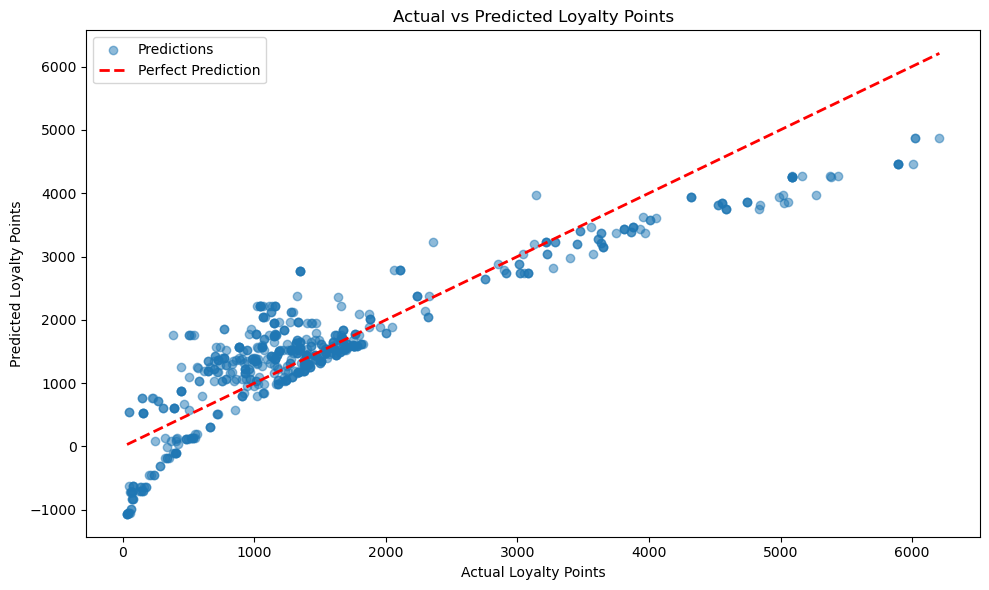

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Calculate R-squared score on test set
r2_score_test = r2_score(y_test, y_pred_mlr)
print(f"R-squared Score on Test Set: {r2_score_test*100:.2f}")

# Calculate MSE and RMSE
mae = mean_absolute_error(y_test, y_pred_mlr)
mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)
print(f"\nMean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Create a scatter plot to compare predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlr, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Actual vs Predicted Loyalty Points')
plt.legend()
plt.tight_layout()
plt.show()


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            VIF is less than 5 for both indicating both spending score and remuneration are sufficiently independent</li>
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            Similar R-squared values between training (83%) and test (81%) sets indicate good generalization
        </li>
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            <b>Model should perform consistently on new, unseen data </b>
        </li>
    </ul>
</div>

In [51]:
# Create and fit the model for full dataset
mlr_final = sm.OLS(y, sm.add_constant(X)).fit()

# Print model summary
print(mlr_final.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:36:06   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3051     35.740    -47.

##### **Business Insights**

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 16px;
    color: #333;">
   <b>1. Mathematical Relationship:</b>
   Loyalty Points = -1700.3051 + (32.8927 × Spending Score) + (33.9795 × Remuneration)

   <b>2. Coefficient Interpretation:</b>
   - Spending Score (32.8927):
     - For every 1-point increase in spending score, loyalty points increase by ~32.89 points
     - Strong positive relationship with loyalty points
   
   - Remuneration (33.9795):
     - For every £1,000 increase in remuneration, loyalty points increase by ~33.97 points
     - Slightly stronger impact than spending score

   <b>3. Constant (-1700.3):</b>
   - Theoretical starting point when both predictors are zero
   - Negative value suggests minimum thresholds of spending and income needed for loyalty point accumulation

   <b>4. Business Impact:</b>
   - Both spending score and remuneration have similar magnitude of impact on loyalty points
   - The nearly equal coefficients suggest both customer spending behavior and income level are equally important in predicting loyalty program participation
   - The negative constant indicates the program may not be as accessible to lower-income or lower-spending customers
</div>

### 3. Exploring the structure using decision trees

In [55]:
tgr2 = pd.read_csv('turtle_reviews_cleaned.csv')
tgr2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [56]:
# Creating a new dataframe with features that can be used for decision tree
tgr_dtr = tgr2.loc[:,~tgr2.columns.isin(['product','review','summary'])]
tgr_dtr.head()

gender  age  remuneration  spending_score  loyalty_points education
0    Male   18         12.30              39             210  graduate
1    Male   23         12.30              81             524  graduate
2  Female   22         13.12               6              40  graduate
3  Female   25         13.12              77             562  graduate
4  Female   33         13.94              40             366  graduate

In [57]:
# Analysing categorical data
categorical_cols = ['gender','education']
gender_breakdown = pd.DataFrame(tgr_dtr['gender'].value_counts())
education_breakdown = pd.DataFrame(tgr_dtr['education'].value_counts())
print(gender_breakdown)
print(education_breakdown)

        count
gender       
Female   1120
Male      880
              count
education          
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50


In [58]:
# Transforming categorical columns through dummy encoding
tgr_dtr = pd.get_dummies(tgr_dtr,columns = categorical_cols,prefix=categorical_cols,prefix_sep='_',dtype=int)
tgr_dtr.head()

age  remuneration  spending_score  loyalty_points  gender_Female  \
0   18         12.30              39             210              0   
1   23         12.30              81             524              0   
2   22         13.12               6              40              1   
3   25         13.12              77             562              1   
4   33         13.94              40             366              1   

   gender_Male  education_Basic  education_PhD  education_diploma  \
0            1                0              0                  0   
1            1                0              0                  0   
2            0                0              0                  0   
3            0                0              0                  0   
4            0                0              0                  0   

   education_graduate  education_postgraduate  
0                   1                       0  
1                   1                       0  
2                   1                       0  
3                   1                       0  
4                   1                       0

In [59]:
# Dependent variable - Y as Loyalty points
y_dt = tgr_dtr['loyalty_points']

# Independent variable - X for other columns
X_dt = tgr_dtr.drop(columns='loyalty_points',inplace=False)

print(y_dt.head())
X_dt.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64


age  remuneration  spending_score  gender_Female  gender_Male  \
0   18         12.30              39              0            1   
1   23         12.30              81              0            1   
2   22         13.12               6              1            0   
3   25         13.12              77              1            0   
4   33         13.94              40              1            0   

   education_Basic  education_PhD  education_diploma  education_graduate  \
0                0              0                  0                   1   
1                0              0                  0                   1   
2                0              0                  0                   1   
3                0              0                  0                   1   
4                0              0                  0                   1   

   education_postgraduate  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [60]:
print(y_dt.shape)
print(X_dt.shape)

(2000,)
(2000, 10)


In [61]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt,y_dt,test_size=0.3,random_state=42)

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_dt_train,y_dt_train)

DecisionTreeRegressor(random_state=42)

In [62]:
# Get predictions and metrics for training set
y_dt_pred_train = regressor.predict(X_dt_train)
r2_score_train = r2_score(y_dt_train, y_dt_pred_train)
print("Decision Tree Regression: Training Set Metrics:")
print(f"R-squared Score: {r2_score_train*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt_train, y_dt_pred_train))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt_train, y_dt_pred_train))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt_train, y_dt_pred_train)))
print("\n")


Decision Tree Regression: Training Set Metrics:
R-squared Score: 100.00%
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0




In [63]:
y_dt_pred = regressor.predict(X_dt_test)
r2_score_test = r2_score(y_dt_test, y_dt_pred)
print("Decision Tree Regression: Test Set Metrics:")
print(f"R-squared Score on Test Set: {r2_score_test*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt_test,y_dt_pred).round(2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt_test,y_dt_pred).round(2))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt_test,y_dt_pred)))

Decision Tree Regression: Test Set Metrics:
R-squared Score on Test Set: 99.53%
Mean Absolute Error:  31.95
Mean Squared Error:  7599.02
Root Mean Squared Error:  87.17234844452301


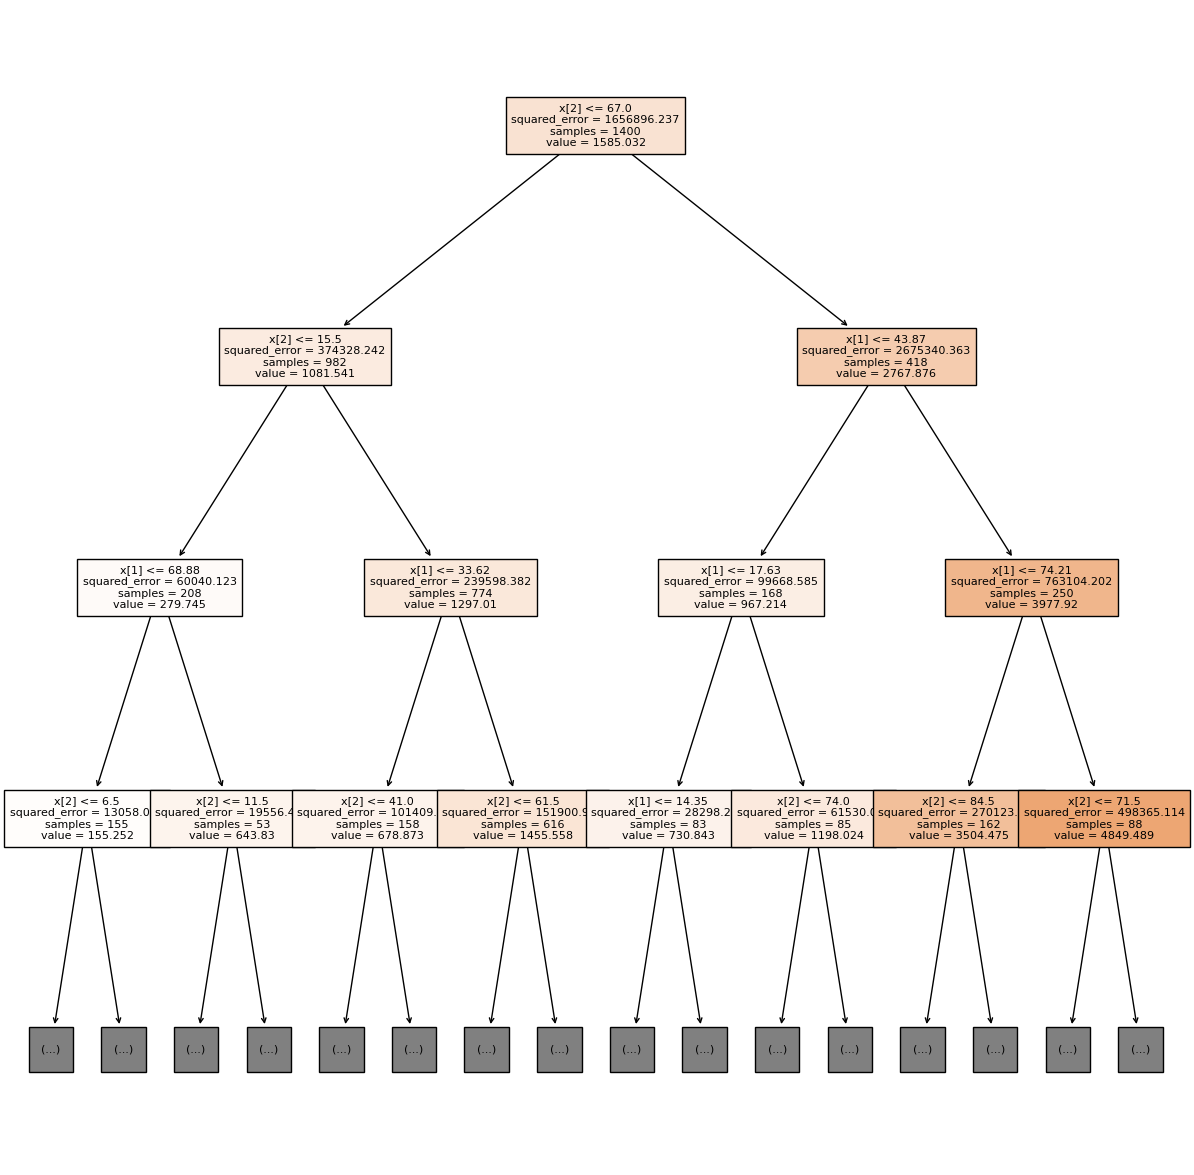

In [64]:
from sklearn import tree

fig, ax = plt.subplots(figsize = (15,15))
tree.plot_tree(regressor,max_depth=3,fontsize=8, filled=True)
plt.show()

In [65]:
# Get all parameters of the trained decision tree regressor
params = regressor.get_params()
print("Decision Tree Regressor Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

Decision Tree Regressor Parameters:
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best


In [66]:
print("Tree Structure Information:")
print(f"Max Depth: {regressor.get_depth()}")
print(f"Number of Leaves: {regressor.get_n_leaves()}")
print(f"Feature Count: {regressor.n_features_in_}")

Tree Structure Information:
Max Depth: 23
Number of Leaves: 556
Feature Count: 10


<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> The number of features are high - at 10 along with the depth at 23 and leaves at 556.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Based on the Decision tree chart, <b>x[2]- spending score</b> and <b>x[1] - remuneration</b> are used to classify most of the dataset.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Dataset can be trimmed to include the important features(based on imporatance) and then optimized by pruning.
        </li>
    </ul>
</div>

In [68]:
dtr_importance = pd.DataFrame({'Feature':X_dt.columns})
dtr_importance['Importance'] = regressor.feature_importances_

dtr_importance = dtr_importance.sort_values(by='Importance',ascending=False)
dtr_importance

Feature  Importance
1            remuneration    0.498322
2          spending_score    0.482888
0                     age    0.017164
7       education_diploma    0.000603
6           education_PhD    0.000348
8      education_graduate    0.000347
9  education_postgraduate    0.000108
3           gender_Female    0.000106
4             gender_Male    0.000090
5         education_Basic    0.000025

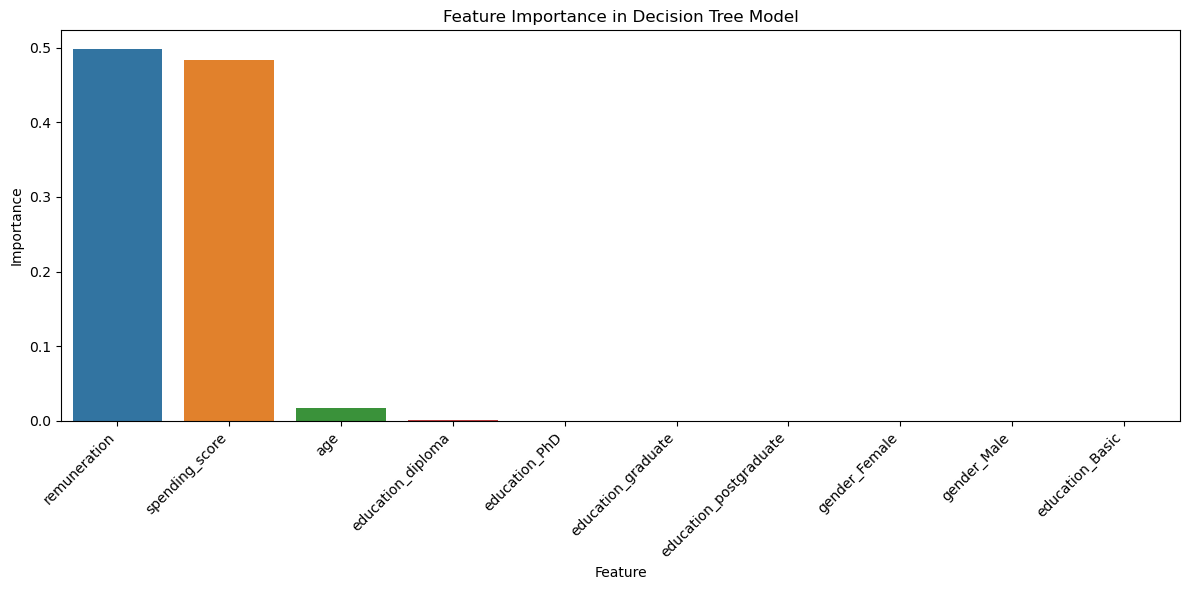

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dtr_importance, x='Feature', y='Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Remuneration and Spending score are the important features.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Age, Education and Gender related features have very less significance.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Removing these datapoints from the dataset and rebuilding the decision-tree regressor on the simplified dataset.
        </li>
    </ul>
</div>

In [71]:
tgr_dtr2 = tgr_dtr[['remuneration','spending_score','loyalty_points']]
print(tgr_dtr2.head())
tgr_dtr2.shape

   remuneration  spending_score  loyalty_points
0         12.30              39             210
1         12.30              81             524
2         13.12               6              40
3         13.12              77             562
4         13.94              40             366


(2000, 3)

In [72]:
# Dependent variable - Y as Loyalty points
y_dt2 = tgr_dtr2['loyalty_points']

# Independent variable - X for remuneration and spending_score
X_dt2 = tgr_dtr2.drop(columns='loyalty_points',inplace=False)

In [73]:
X_dt2_train, X_dt2_test, y_dt2_train, y_dt2_test = train_test_split(X_dt2,y_dt2,test_size=0.3,random_state=42)

regressor2 = DecisionTreeRegressor(random_state=42)

regressor2.fit(X_dt2_train,y_dt2_train)

DecisionTreeRegressor(random_state=42)

In [74]:
# Get predictions and metrics for training set
y_dt2_pred_train = regressor2.predict(X_dt2_train)
r2_score2_train = r2_score(y_dt2_train, y_dt2_pred_train)
print("Decision Tree Regression: Training Set Metrics:")
print(f"R-squared Score: {r2_score2_train*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt2_train, y_dt2_pred_train))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt2_train, y_dt2_pred_train))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt2_train, y_dt2_pred_train)))
print("\n")

Decision Tree Regression: Training Set Metrics:
R-squared Score: 98.89%
Mean Absolute Error:  69.1567125533197
Mean Squared Error:  18455.976903780742
Root Mean Squared Error:  135.85277657736975




In [75]:
y_dt2_pred = regressor2.predict(X_dt2_test)
r2_score2_test = r2_score(y_dt2_test, y_dt2_pred)
print("Decision Tree Regression: Test Set Metrics:")
print(f"R-squared Score on Test Set: {r2_score2_test*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt2_test,y_dt2_pred).round(2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt2_test,y_dt2_pred).round(2))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt2_test,y_dt2_pred)))

Decision Tree Regression: Test Set Metrics:
R-squared Score on Test Set: 98.39%
Mean Absolute Error:  83.27
Mean Squared Error:  26097.98
Root Mean Squared Error:  161.54870369129105


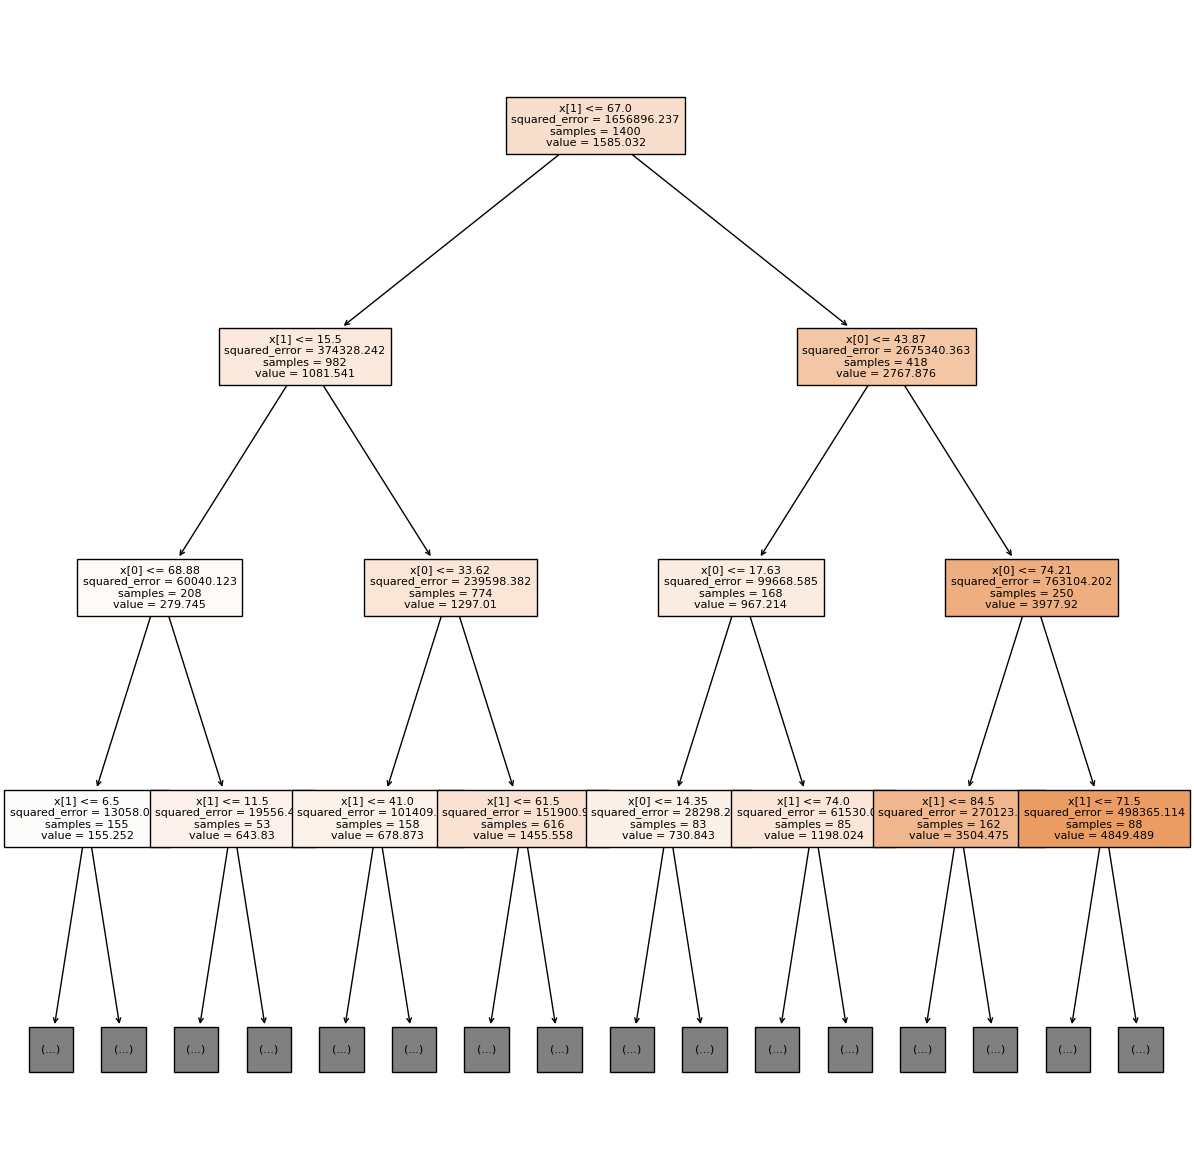

Tree Structure Information:
Max Depth: 18
Number of Leaves: 196
Feature Count: 2


In [76]:
fig, ax = plt.subplots(figsize = (15,15))
tree.plot_tree(regressor2,max_depth=3,fontsize=8, filled=True)
plt.show()

print("Tree Structure Information:")
print(f"Max Depth: {regressor2.get_depth()}")
print(f"Number of Leaves: {regressor2.get_n_leaves()}")
print(f"Feature Count: {regressor2.n_features_in_}")

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            With the features reduced to 2, the Depth has reduced from 23 to 18 and leaves have reduced significantly from 534 to 196. </li>
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            The R-squared value has also reduced marginally on Test set from 99.5% to 98.9%.
        </li>
        <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>
            <b>Optimizing the Decision tree by pruning with a GridSearchCV,to reduce overfitting and manage the efficiency of the decision tree </b>
        </li>
    </ul>
</div>

In [78]:
regressor2.fit(X_dt2,y_dt2)
y_dt2_pred = regressor2.predict(X_dt2)
r2_score2_test = r2_score(y_dt2, y_dt2_pred)
print("Decision Tree Regression: Full Set Metrics:")
print(f"R-squared Score on Full Set: {r2_score2_test*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt2,y_dt2_pred).round(2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt2,y_dt2_pred).round(2))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt2,y_dt2_pred)))

Decision Tree Regression: Full Set Metrics:
R-squared Score on Full Set: 98.80%
Mean Absolute Error:  72.45
Mean Squared Error:  19793.12
Root Mean Squared Error:  140.6880330060445


In [79]:
# importing class from library
from sklearn.model_selection import GridSearchCV

# Setting optimum values for parameters.
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [40, 80, 190]
}

# creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

# fitting data
grid_search.fit(X_dt2, y_dt2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10],
                         'max_leaf_nodes': [40, 80, 190],
                         'min_samples_split': [2, 5, 10]})

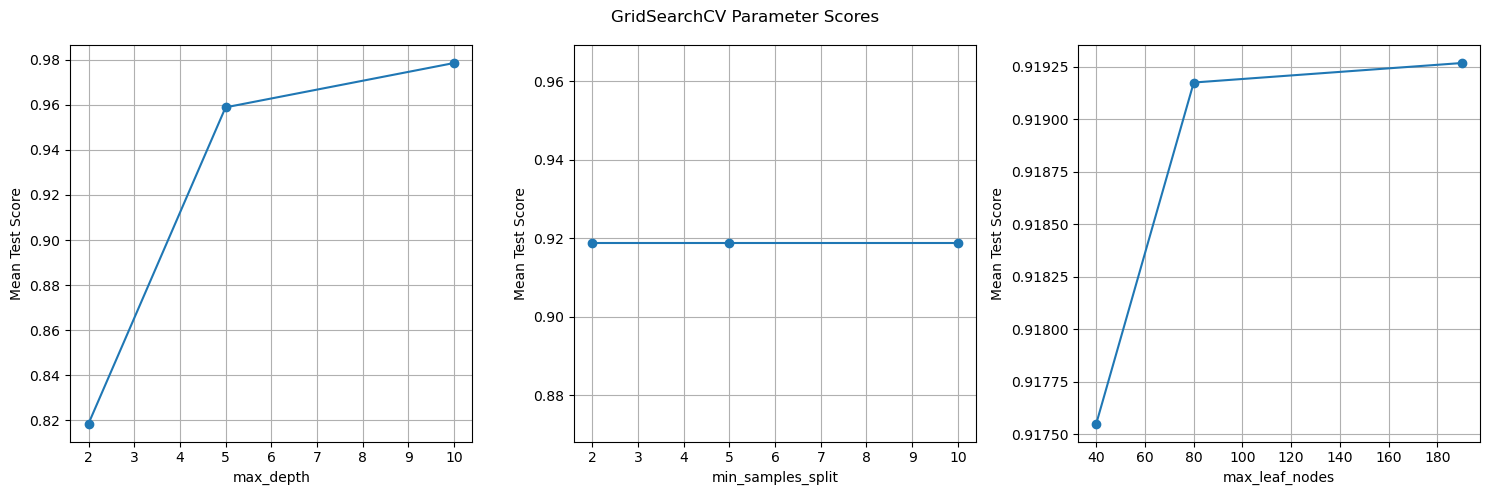

In [80]:
# Create a DataFrame of the grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Create a figure with subplots for each parameter
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('GridSearchCV Parameter Scores')

# Plot max_depth results
mean_scores = cv_results.groupby('param_max_depth')['mean_test_score'].mean()
axes[0].plot(mean_scores.index, mean_scores.values, marker='o')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('Mean Test Score')
axes[0].grid(True)

# Plot min_samples_split results
mean_scores = cv_results.groupby('param_min_samples_split')['mean_test_score'].mean()
axes[1].plot(mean_scores.index, mean_scores.values, marker='o')
axes[1].set_xlabel('min_samples_split')
axes[1].set_ylabel('Mean Test Score')
axes[1].grid(True)

# Plot min_samples_leaf results
mean_scores = cv_results.groupby('param_max_leaf_nodes')['mean_test_score'].mean()
axes[2].plot(mean_scores.index, mean_scores.values, marker='o')
axes[2].set_xlabel('max_leaf_nodes')
axes[2].set_ylabel('Mean Test Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()


<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Based on the charts, a Max Depth = 5, and Max_leaf_nodes = 80 could already result in overfitting at ~95% Test score.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Applying max_depth to 3 and max_leaf_nodes to 40 could retain the fit at ~90% on the training set.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span><b> Applying identified parameters and building the optimized decision tree</b>
        </li>
    </ul>
</div>

In [82]:
regressor_opt = DecisionTreeRegressor(random_state=42,max_depth=3,max_leaf_nodes=40)
regressor_opt.fit(X_dt2_train,y_dt2_train)

# Get predictions and metrics for training set
y_dt2_pred_opt_train = regressor_opt.predict(X_dt2_train)
r2_score3_train = r2_score(y_dt2_train, y_dt2_pred_opt_train)
print("Optimized Decision Tree Regression: Training Set Metrics:")
print(f"R-squared Score: {r2_score3_train*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt2_train, y_dt2_pred_opt_train).round(2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt2_train, y_dt2_pred_opt_train).round(2))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt2_train, y_dt2_pred_opt_train)))

Optimized Decision Tree Regression: Training Set Metrics:
R-squared Score: 91.04%
Mean Absolute Error:  277.9
Mean Squared Error:  148463.7
Root Mean Squared Error:  385.3098746741017


In [83]:
y_dt2_pred_opt_test = regressor2.predict(X_dt2_test)
r2_score4_test = r2_score(y_dt2_test, y_dt2_pred_opt_test)
print("Optimized Decision Tree Regression: Test Set Metrics:")
print(f"R-squared Score on Test Set: {r2_score4_test*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt2_test,y_dt2_pred_opt_test).round(2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt2_test,y_dt2_pred_opt_test).round(2))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt2_test,y_dt2_pred_opt_test)))

Optimized Decision Tree Regression: Test Set Metrics:
R-squared Score on Test Set: 98.71%
Mean Absolute Error:  75.04
Mean Squared Error:  20880.52
Root Mean Squared Error:  144.5009345710073


In [84]:
regressor_opt.fit(X_dt2,y_dt2)

# Get predictions and metrics for full dataset
y_dt2_pred_opt = regressor_opt.predict(X_dt2)
r2_score_final = r2_score(y_dt2, y_dt2_pred_opt)
print("Optimized Decision Tree Regression: Final Metrics:")
print(f"R-squared Score: {r2_score3_train*100:.2f}%")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_dt2, y_dt2_pred_opt).round(2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_dt2, y_dt2_pred_opt).round(2))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_dt2, y_dt2_pred_opt)))

Optimized Decision Tree Regression: Final Metrics:
R-squared Score: 91.04%
Mean Absolute Error:  273.85
Mean Squared Error:  145184.48
Root Mean Squared Error:  381.03081549938605


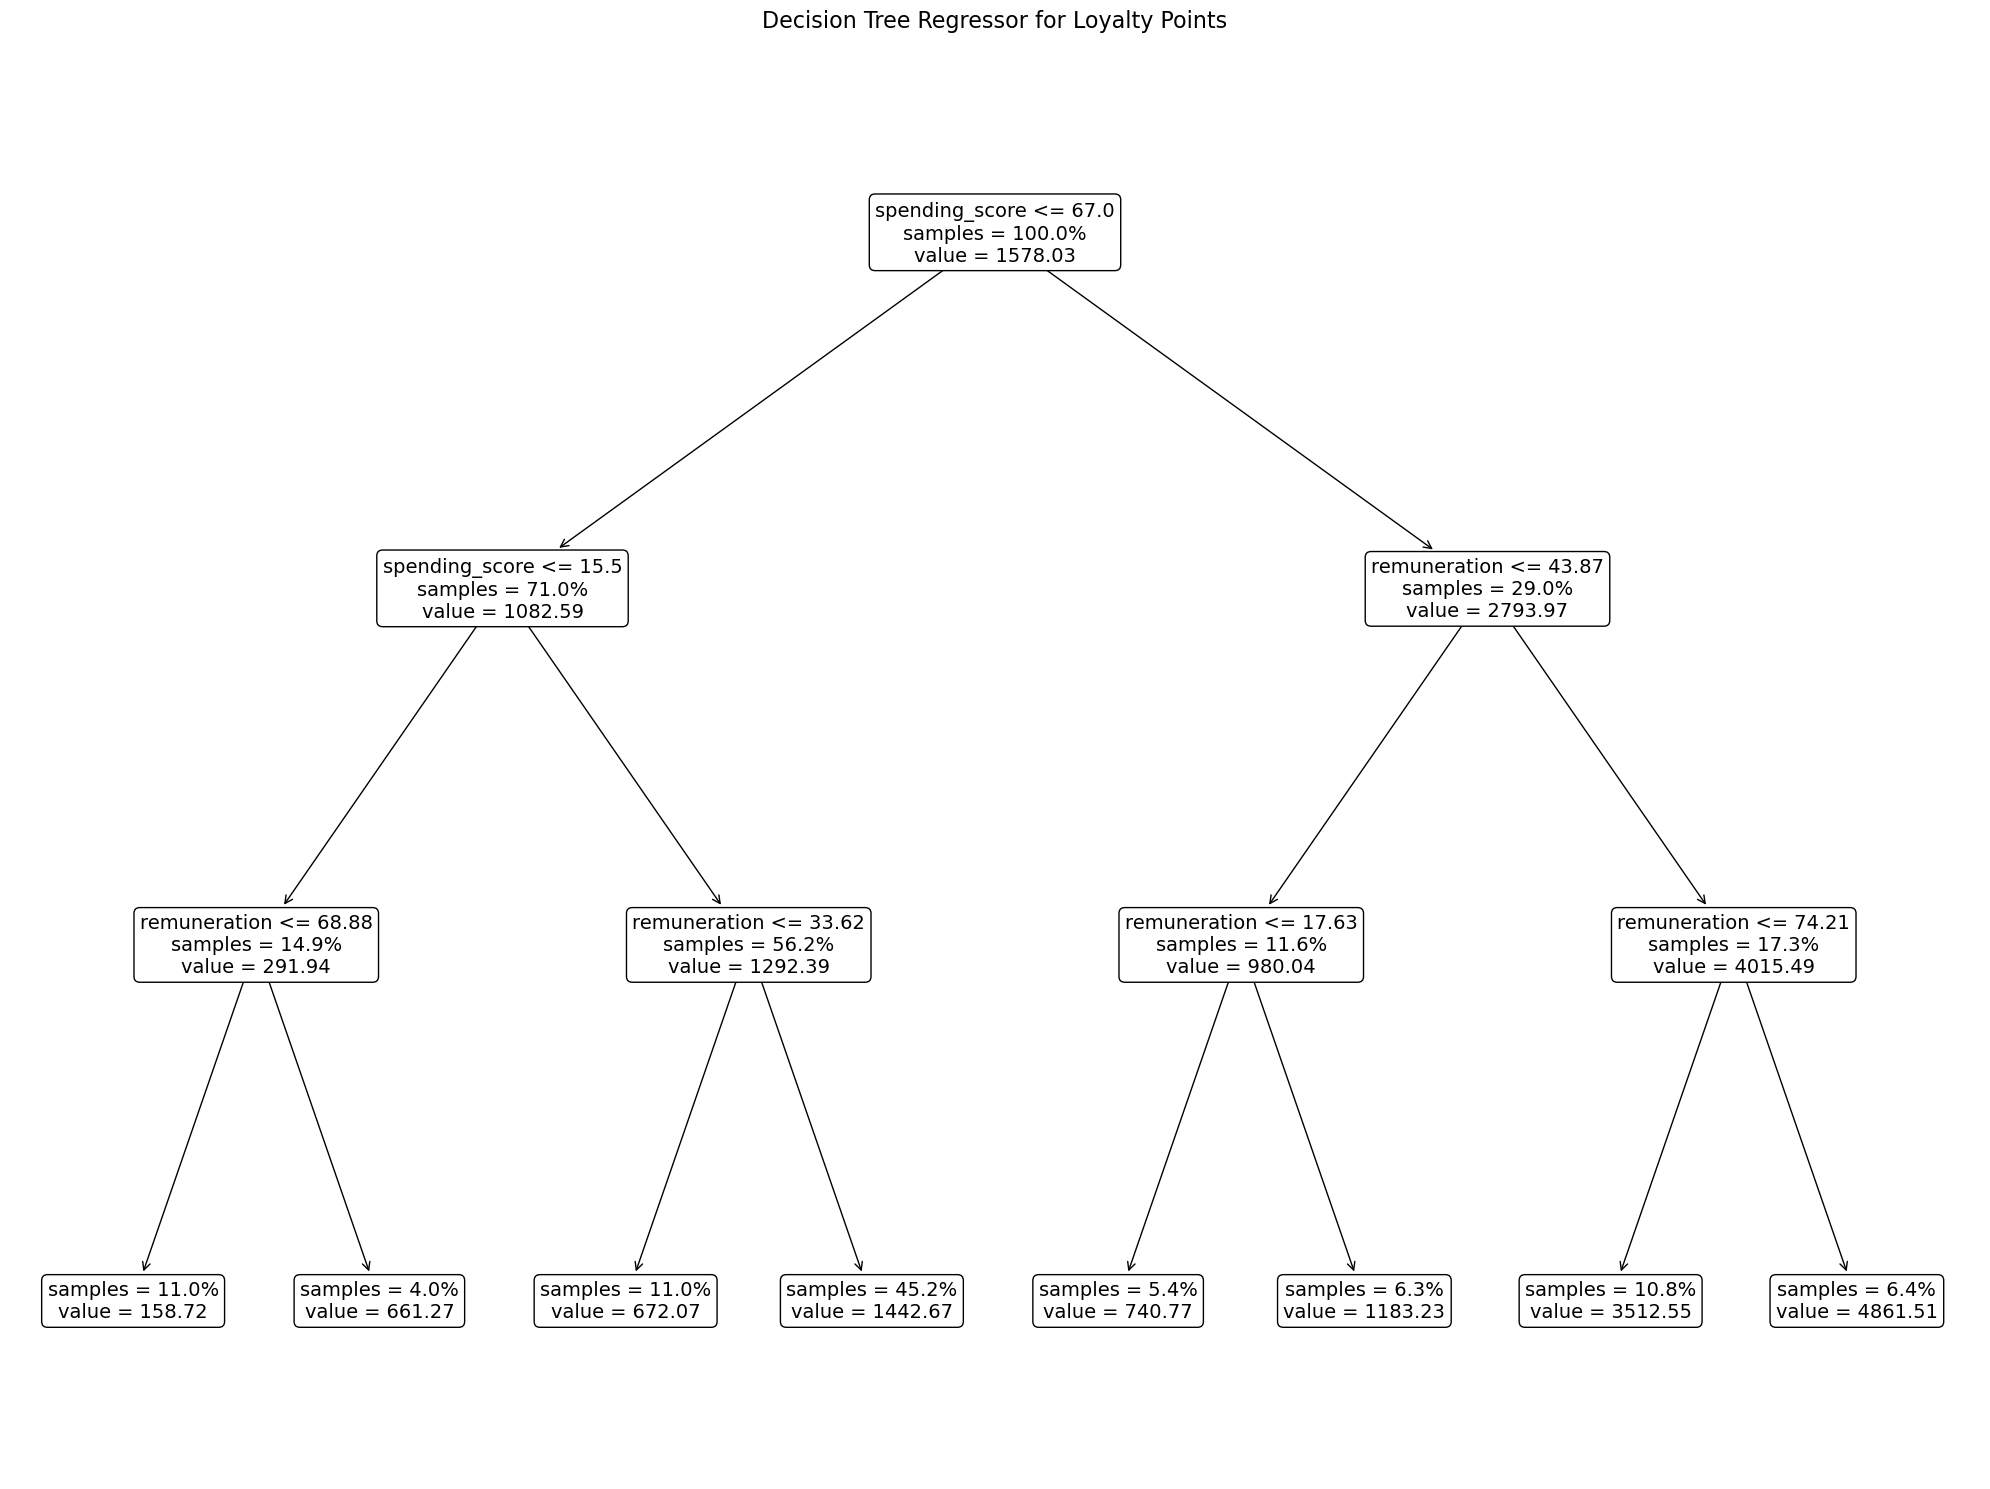

In [85]:
# Create figure with larger size
plt.figure(figsize=(20,15))

# Create improved tree visualization
dt = tree.plot_tree(regressor_opt,
               feature_names=list(X_dt2.columns),  # Show actual feature names
               filled=False,                  # Color nodes by majority class
               rounded=True,                 # Round node corners
               fontsize=14,                  # Increase font size
               max_depth=3,                  # Limit depth for clarity
               proportion=True,              # Show proportions instead of counts
               precision=2,
               impurity=False)

# Add a title
plt.title("Decision Tree Regressor for Loyalty Points", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [86]:
dtr_importance2 = pd.DataFrame({'Feature':X_dt2.columns})
dtr_importance2['Importance'] = regressor_opt.feature_importances_

dtr_importance2 = dtr_importance2.sort_values(by='Importance',ascending=False)
dtr_importance2

Feature  Importance
0    remuneration    0.520031
1  spending_score    0.479969

| Customer Category    | % of Total |  Avg Loyalty Points |
| -------------------- | :--------: |------------------: |
| <b>Low Spenders (SS<15.5)  | <b>15%     |<b>410|
|          1. Rem>£68.8k  |  4%     |661.27|
|          2. Rem<=£68.8k | 11%     |158.72|
|<b>Moderate Spenders (SS>15.5 & SS< 67)</b> |<b>	56% |<b>	1313|
|1. Rem >£33.62k|	45%	| 1442.67|
|2. Rem <= £33.62k|	11%	| 1183.23|
|<b>High Spenders (SS>67)  |	<b>29% |	<b>2574 |
|1. Rem>£74.21k|	6.4%	|4861.5|
|2. Rem >£43.8k and <= 74.21|	10.8%|	3512.55|
|3. Rem <= £17.63k|	5.4%|740.77|
|4. Rem > £17.63k and <=£43.8k|	6.3% |	1183.23 |



<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 8px 0;
    font-family: Calibri, sans-serif;
    font-size: 16px;
    color: #333;">
   <b>Key Business Insights</b>
   <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Majority of the customers are moderate spenders <b>(56.15%)</b> and have an average loyalty points of 1,057.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> High spending customers come in second at 28.95% of total customers with an average 2,547 loyalty points.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> High Income and High Spending customer group make up 17.3% of Total cusomters and have very high loyalty points.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> High Spenders with High incomes (>£74.2k) earn the highest average loyalty points ~4,861 points.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> At every spending level, higher income groups have higher loyalty points.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span><b> Studying the product purchase patterns for these spend groups further can help identify product pricing and reward categories.</b>
        </li>    
</div>

 <div style="
     background-color: #e8f8e8;
     border: 1px solid #efffe8;
     border-left: 20px solid #7dbf7d;
     border-radius: 4px;
     padding: 4px;
     margin: 8px 0;
     font-family: Calibri, sans-serif;
     font-size: 16px;
     color: #333;">
    <b> Business Recommendations</b>
    <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;">
         <li style="margin-bottom: 4px;">
             <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Consider tiered loyalty programs tailored to spending patterns - premium benefits for high spenders (29%) to maintain their engagement.
         </li>
         <li style="margin-bottom: 4px;">
             <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Focus on moderate spenders (56%) with targeted promotions to encourage movement into high spending segments.
         </li>
         <li style="margin-bottom: 4px;">
             <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Develop special rewards/products for high-income high-spenders (6.4%) who show exceptional loyalty with ~4,861 points.
         </li>
         <li style="margin-bottom: 4px;">
             <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Create income-based marketing strategies since higher income correlates with higher loyalty across all spending groups.
         </li>
         <li style="margin-bottom: 4px;">
             <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Analyze low spenders (15%) to identify barriers and develop strategies to increase their engagement.
         </li>
         <li style="margin-bottom: 4px;">
             <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Consider implementing personalized reward thresholds based on income brackets to optimize customer retention across segments.
         </li>    
</div>


### 4. Identifying Customer groups using k-Means

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> The above decision tree suggests possible groups of customers exist, based on spending and remuneration -  who could exhibit similar patterns.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> However, the decision tree is applying different values to the same features in the sub-groupings.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Identifying natural clusters can help identify distinct customer groups revealing patterns that decision tree could have missed and enhance the customer segmentation further. </b>
        </li>
    </ul>
</div> 

#### a. Identifying cluster size

In [93]:
tgr3 = tgr2[['spending_score','remuneration']]
print(tgr3.info())
print(tgr3.shape)
print(tgr3.describe())
tgr3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spending_score  2000 non-null   int64  
 1   remuneration    2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
(2000, 2)
       spending_score  remuneration
count     2000.000000   2000.000000
mean        50.000000     48.079060
std         26.094702     23.123984
min          1.000000     12.300000
25%         32.000000     30.340000
50%         50.000000     47.150000
75%         73.000000     63.960000
max         99.000000    112.340000


spending_score  remuneration
0              39         12.30
1              81         12.30
2               6         13.12
3              77         13.12
4              40         13.94

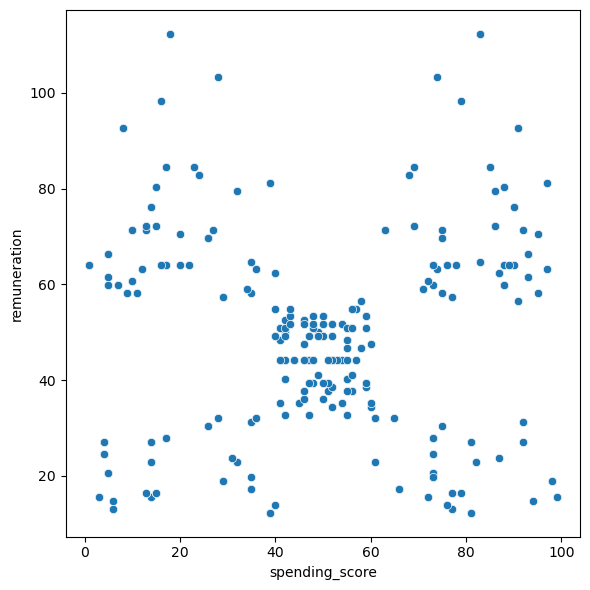

In [94]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x ='spending_score', y='remuneration',data = tgr3)
plt.tight_layout()
plt.show()

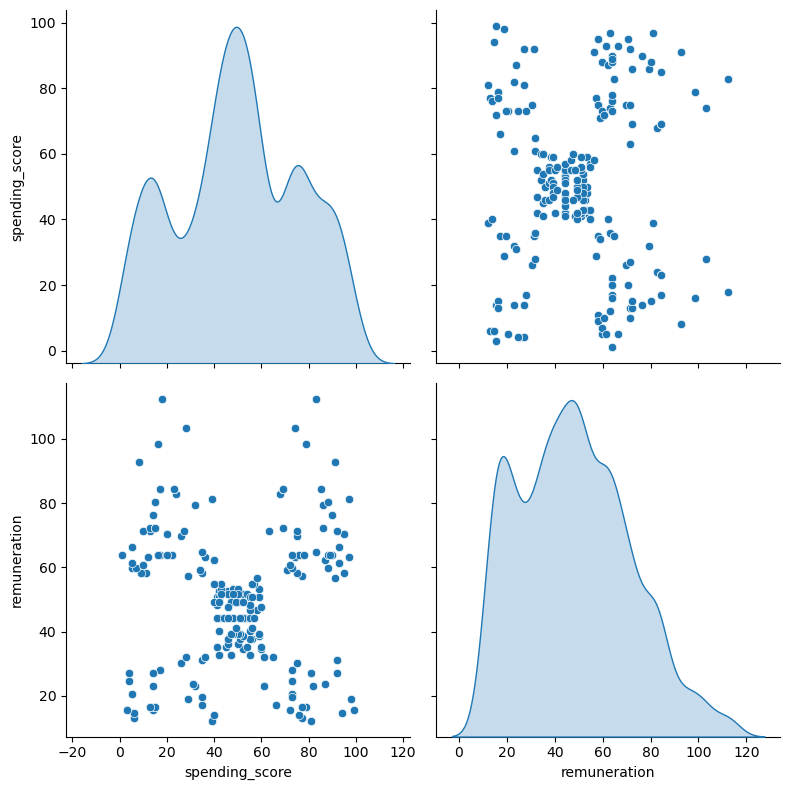

In [95]:
sns.pairplot(tgr3,diag_kind = 'kde',height=4,aspect=1)
plt.tight_layout()
plt.show()

In [96]:
# Try with a very simple dataset
X_test = np.array([[1, 1], [2, 2], [10, 10], [12, 12]])
print("\nShape of test data:", X_test.shape)

try:
    kmeans_test = KMeans(n_clusters=2, random_state=42)
    labels = kmeans_test.fit_predict(X_test)
    print("KMeans successful with test data")
except Exception as e:
    print("KMeans failed with error:", str(e))


Shape of test data: (4, 2)
KMeans successful with test data


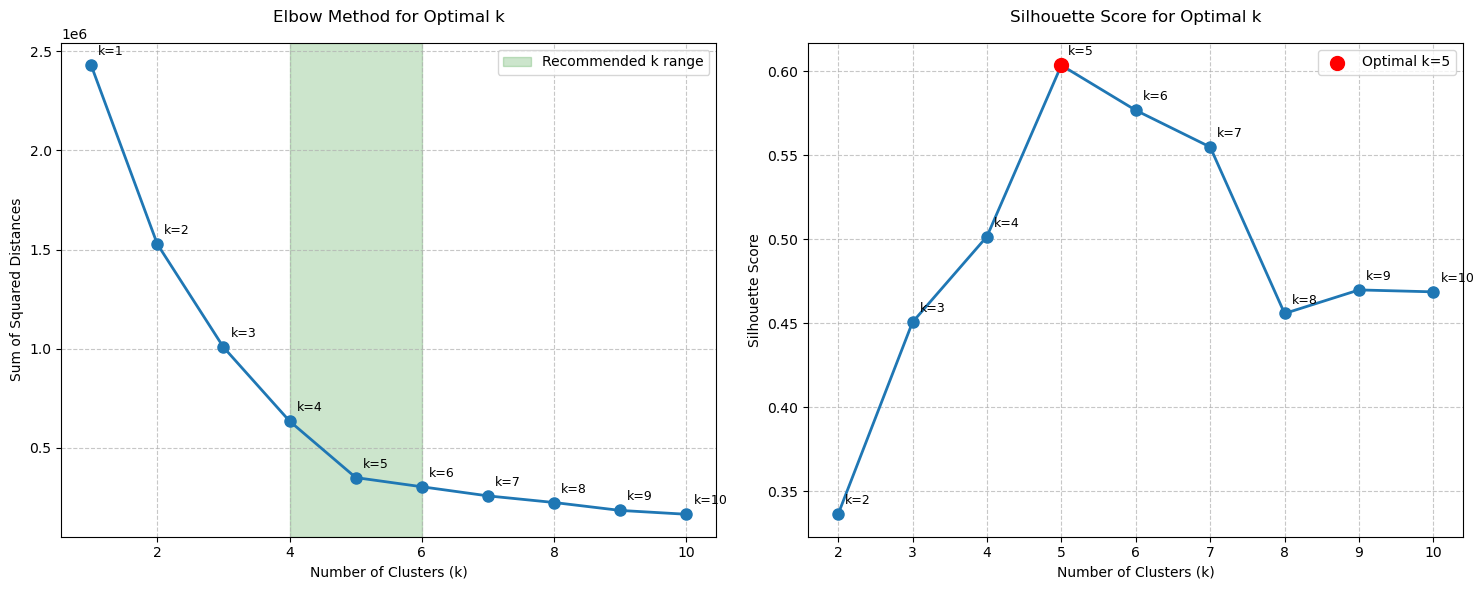


Based on Silhouette Score, the optimal number of clusters is: 5
Maximum Silhouette Score: 0.604


In [97]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# 1. Elbow Method - Enhanced
plt.subplot(1, 2, 1)
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tgr3)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11), ss, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Elbow Method for Optimal k', fontsize=12, pad=15)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Sum of Squared Distances', fontsize=10)

# Annotate each point
for i, value in enumerate(ss):
    plt.annotate(f'k={i+1}', 
                xy=(i+1, value),
                xytext=(5, 5),
                textcoords='offset points',
                ha='left',
                va='bottom',
                fontsize=9)
# Add vertical band for k=4 to k=6
plt.axvspan(4, 6, alpha=0.2, color='green', label='Recommended k range')
plt.legend()

# 2. Silhouette Method - Enhanced
plt.subplot(1, 2, 2)
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k, random_state=0).fit(tgr3)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(tgr3, labels, metric='manhattan'))

plt.plot(range(2, kmax+1), sil, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Silhouette Score for Optimal k', fontsize=12, pad=15)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)

# Annotate each point
for i, value in enumerate(sil):
    plt.annotate(f'k={i+2}', 
                xy=(i+2, value),
                xytext=(5, 5),
                textcoords='offset points',
                ha='left',
                va='bottom',
                fontsize=9)

# Find and highlight the optimal k based on silhouette score
optimal_k = sil.index(max(sil)) + 2
plt.scatter(optimal_k, max(sil), c='red', s=100, zorder=5, label=f'Optimal k={optimal_k}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nBased on Silhouette Score, the optimal number of clusters is: {optimal_k}")
print(f"Maximum Silhouette Score: {max(sil):.3f}")

#### b. Applying k-Means clustering

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Based on the elbow and silhouette methods, K should be between 4 to 6 - ideally 5
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Applying k values of 4,5,6 and plotting the clusters to identify the best k-value</b>
        </li>
    </ul>
</div>


Cluster Sizes:


K-Means Predicted  Cluster size  % of Total
0                  0           356        17.8
1                  1           351        17.5
2                  2           280        14.0
3                  3          1013        50.6

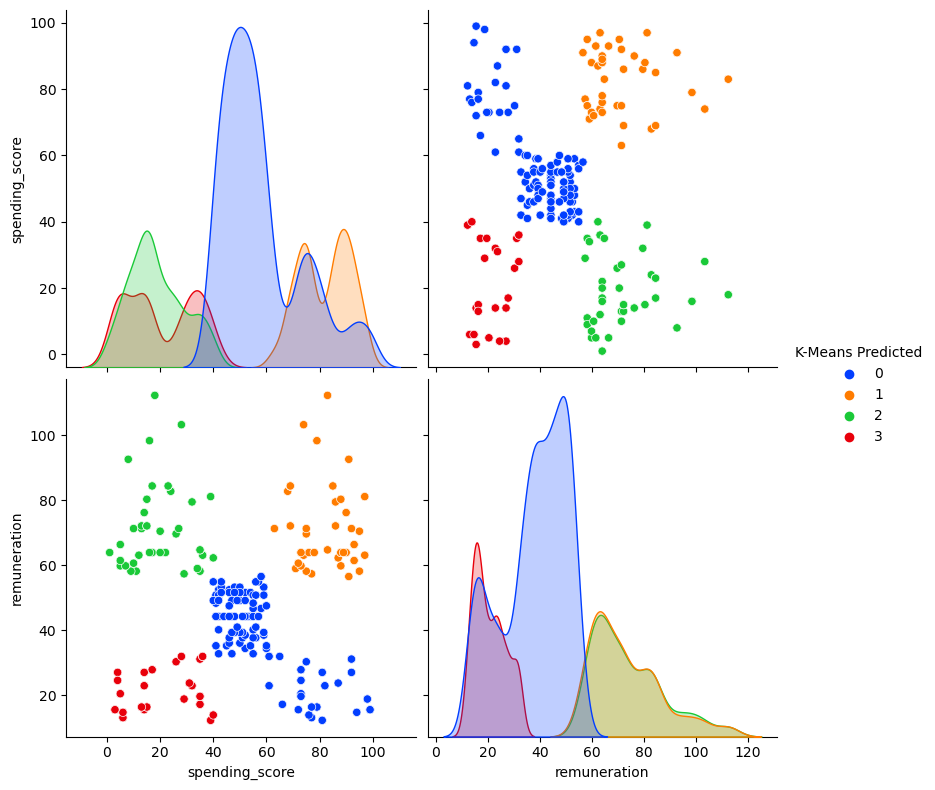

In [100]:
k_means = KMeans(n_clusters = 4, max_iter = 500, init = 'k-means++', n_init=10,random_state=0).fit(tgr3)
clusters = k_means.labels_
tgr3['K-Means Predicted'] = clusters

# Generate pairplot
sns.pairplot(tgr3, hue = 'K-Means Predicted',diag_kind = 'kde',palette='bright',height=4,aspect=1)

# Print cluster sizes
print("\nCluster Sizes:")

cluster_size = pd.DataFrame()
cluster_size['K-Means Predicted'] = tgr3['K-Means Predicted'].unique()
cluster_size['Cluster size'] = tgr3['K-Means Predicted'].value_counts()
cluster_size.sort_values(by='K-Means Predicted', ascending= True,inplace=True)
tot = cluster_size['Cluster size'].sum()
cluster_size.reset_index(drop=True,inplace=True)
cluster_size['% of Total'] = ((cluster_size['Cluster size']/tot)*100).round(1)
cluster_size

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">4 clusters looks correct based on the spending score's distribution chart. However,
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> There is significant overlap in terms of remuneration on clusters 2 and 3 as well as 0 and 1
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> The cluster 0 is ~5 times the size of the other clusters
        </li>
        <b>For these reasons, 4 cannot be the ideal size</b> 
    </ul>
</div> 



Cluster Sizes:


K-Means Predicted  Cluster size  % of Total
0                  0           356        17.8
1                  1           271        13.6
2                  2           269        13.4
3                  3           330        16.5
4                  4           774        38.7

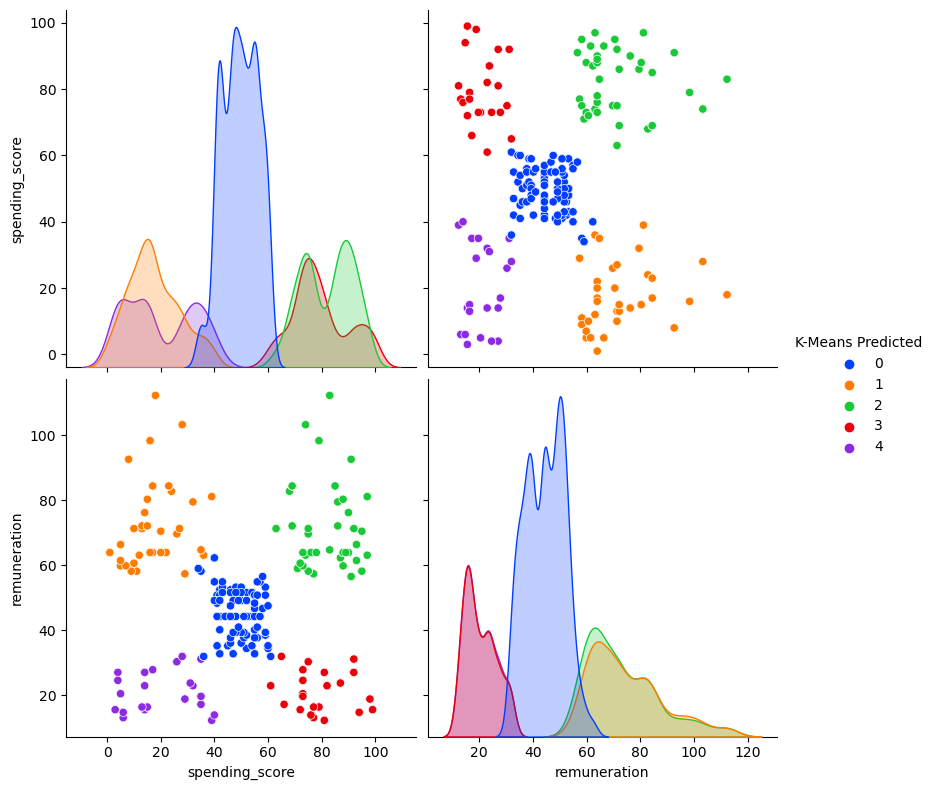

In [102]:
k_means = KMeans(n_clusters = 5, max_iter = 500, init = 'k-means++', n_init=10,random_state=0).fit(tgr3)
clusters = k_means.labels_
tgr3['K-Means Predicted'] = clusters

# Generate pairplot
sns.pairplot(tgr3, hue = 'K-Means Predicted',diag_kind = 'kde',palette='bright',height=4,aspect=1)

# Print cluster sizes
print("\nCluster Sizes:")

cluster_size = pd.DataFrame()
cluster_size['K-Means Predicted'] = tgr3['K-Means Predicted'].unique()
cluster_size['Cluster size'] = tgr3['K-Means Predicted'].value_counts()
cluster_size.sort_values(by='K-Means Predicted', ascending= True,inplace=True)
tot = cluster_size['Cluster size'].sum()
cluster_size.reset_index(drop=True,inplace=True)
cluster_size['% of Total'] = ((cluster_size['Cluster size']/tot)*100).round(1)
cluster_size


Cluster Sizes:


K-Means Predicted  Cluster size  % of Total
0                  0           760        38.0
1                  1           356        17.8
2                  2           269        13.4
3                  3           221        11.0
4                  4           271        13.6
5                  5           123         6.2

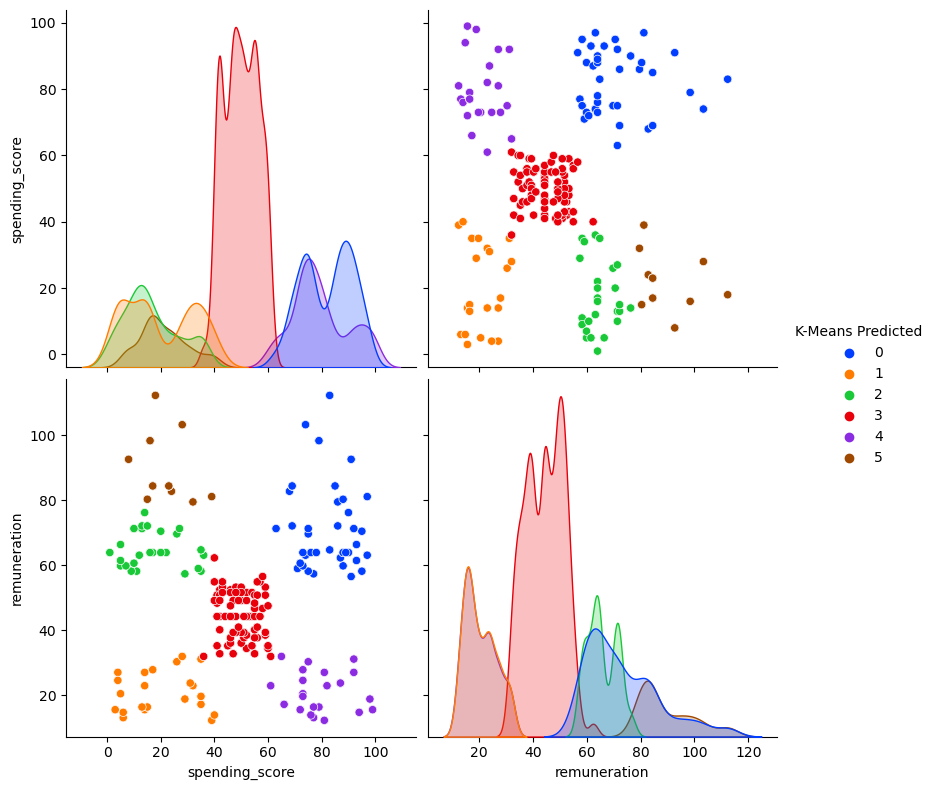

In [103]:
k_means = KMeans(n_clusters = 6, max_iter = 500, init = 'k-means++', n_init=10,random_state=0).fit(tgr3)
clusters = k_means.labels_
tgr3['K-Means Predicted'] = clusters

# Generate pairplot
sns.pairplot(tgr3, hue = 'K-Means Predicted',diag_kind = 'kde',palette='bright',height=4,aspect=1)

# Print cluster sizes
print("\nCluster Sizes:")

cluster_size = pd.DataFrame()
cluster_size['K-Means Predicted'] = tgr3['K-Means Predicted'].unique()
cluster_size['Cluster size'] = tgr3['K-Means Predicted'].value_counts()
cluster_size.sort_values(by='K-Means Predicted', ascending= True,inplace=True)
tot = cluster_size['Cluster size'].sum()
cluster_size.reset_index(drop=True,inplace=True)
cluster_size['% of Total'] = ((cluster_size['Cluster size']/tot)*100).round(1)
cluster_size

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 5 is optimally clustering the dataset and has a fairly equal distribution
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 6 is dividing a more sparsely populated cluster further and causing an unequal distribution.
        </li>
        For these reasons, 5 would be the ideal k-value and can be applied to be obtain the final grouping of clusters
    </ul>
</div> 

In [105]:
k_means = KMeans(n_clusters = 5, max_iter = 500, init = 'k-means++', n_init=10,random_state=0).fit(tgr3)
clusters = k_means.labels_
# Adding clusters columns to the dataset
tgr3['K-Means Predicted'] = clusters

tgr3.head()

spending_score  remuneration  K-Means Predicted
0              39         12.30                  4
1              81         12.30                  3
2               6         13.12                  4
3              77         13.12                  3
4              40         13.94                  4

#### c. Cluster-based Analysis and Persona identification

In [107]:
tgr3.groupby('K-Means Predicted')[['spending_score']].agg(['min','mean','max','count']).round(2)

spending_score                 
                             min   mean max count
K-Means Predicted                                
0                             34  49.53  61   774
1                              1  17.42  39   330
2                             63  82.01  97   356
3                             61  79.42  99   269
4                              3  19.76  40   271

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;"><b>Based on spending_score:</b>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Clusters 2 and 3 are High Spenders
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Clusters 1 and 4 are Low Spenders
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 0 is Moderate Spenders
        </li>
    </ul>
</div>

In [109]:
tgr3.groupby('K-Means Predicted')[['remuneration']].agg(['min','mean','max','count']).round(2)

remuneration                     
                           min   mean     max count
K-Means Predicted                                  
0                        31.98  44.42   62.32   774
1                        57.40  74.83  112.34   330
2                        56.58  73.24  112.34   356
3                        12.30  20.35   31.98   269
4                        12.30  20.42   31.98   271

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;"><b>Based on Remuneration:</b>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Clusters 3 and 4 are Low-Income
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Clusters 1 and 2 are High-Income
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 0 is Moderate-Income
        </li>
    </ul>
</div>

In [111]:
tgr3.groupby('K-Means Predicted')[['spending_score','remuneration']].agg(['min','mean','max','count']).round(2)

spending_score                  remuneration                 \
                             min   mean max count          min   mean     max   
K-Means Predicted                                                               
0                             34  49.53  61   774        31.98  44.42   62.32   
1                              1  17.42  39   330        57.40  74.83  112.34   
2                             63  82.01  97   356        56.58  73.24  112.34   
3                             61  79.42  99   269        12.30  20.35   31.98   
4                              3  19.76  40   271        12.30  20.42   31.98   

                         
                  count  
K-Means Predicted        
0                   774  
1                   330  
2                   356  
3                   269  
4                   271

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;"><b>Combinining both Spending score and Remuneration together,</b>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 0 : Moderate Income - Moderate Spenders
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 1 : High Income - Low Spenders
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 2 : High Income - High Spenders
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 3 : Low Income - High Spenders
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Cluster 4 : Low Income - Low Spenders
        </li>
    </ul>
</div>

#### d. Analysing Cluster Profiles

In [114]:
cluster_analysis = tgr2.copy()

cluster_analysis['Cluster'] = tgr3['K-Means Predicted']

# Calculate cluster profiles
cluster_profiles = cluster_analysis.groupby('Cluster').agg({
    'spending_score': ['mean', 'count'],
    'remuneration': 'mean',
    'loyalty_points': 'mean',
    'age': 'mean',
    'gender': lambda x: x.value_counts().index[0],  # most common gender
    'education': lambda x: x.value_counts().index[0]  # most common education level
}).round(2)

# Rename columns for clarity
cluster_profiles.columns = ['Avg Spending Score', 'Count', 'Avg Remuneration', 
                          'Avg Loyalty Points', 'Avg Age', 'Primary Gender', 
                          'Primary Education']

print("\nDetailed Cluster Profiles:")
cluster_profiles


Detailed Cluster Profiles:


Avg Spending Score  Count  Avg Remuneration  Avg Loyalty Points  \
Cluster                                                                    
0                     49.53    774             44.42             1420.38   
1                     17.42    330             74.83              911.76   
2                     82.01    356             73.24             3988.24   
3                     79.42    269             20.35              971.94   
4                     19.76    271             20.42              275.06   

         Avg Age Primary Gender Primary Education  
Cluster                                            
0          42.13         Female          graduate  
1          40.67           Male          graduate  
2          35.59         Female          graduate  
3          31.60         Female          graduate  
4          43.51         Female          graduate

Common Gender, Age and Primary Education seem to be the same across all 5 Clusters 

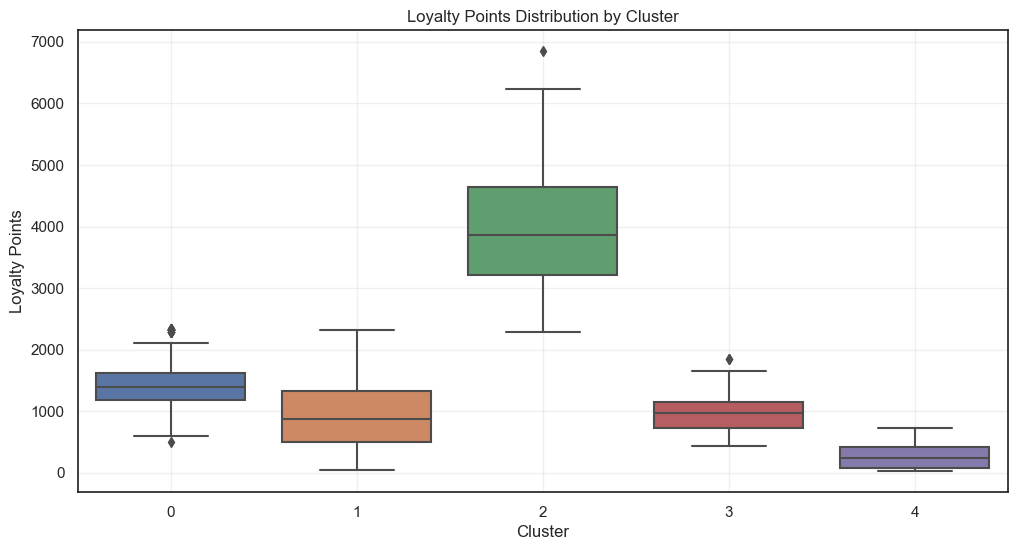


Loyalty Points Statistics by Cluster:
         count     mean  median     std   min   max  % of Total
Cluster                                                        
2          356  3988.24  3866.0  898.41  2289  6847        17.8
0          774  1420.38  1393.0  322.53   504  2332        38.7
3          269   971.94   969.0  296.17   436  1851        13.4
1          330   911.76   874.0  545.85    40  2325        16.5
4          271   275.06   236.0  198.24    25   726        13.6

Cluster Summary:


Cluster Type  Size (%)  Avg Loyalty Points  \
0  Moderate Income - Moderate Spenders      38.7             1420.38   
1           High Income - Low Spenders      16.5              911.76   
2          High Income - High Spenders      17.8             3988.24   
3           Low Income - High Spenders      13.4              971.94   
4            Low Income - Low Spenders      13.6              275.06   

  Spending Score Range Income Range (k£)  
0                34-61         32.0-62.3  
1                 1-39        57.4-112.3  
2                63-97        56.6-112.3  
3                61-99         12.3-32.0  
4                 3-40         12.3-32.0

In [337]:
# Create a box plot to visualize loyalty points distribution across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='loyalty_points', data=cluster_analysis)
plt.title('Loyalty Points Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Loyalty Points')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate detailed loyalty points statistics by cluster
loyalty_stats = cluster_analysis.groupby('Cluster')['loyalty_points'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)

# Add percentage of total customers
loyalty_stats['% of Total'] = (loyalty_stats['count'] / loyalty_stats['count'].sum() * 100).round(1)

# Sort by mean loyalty points to see ranking
loyalty_stats_sorted = loyalty_stats.sort_values('mean', ascending=False)

print("\nLoyalty Points Statistics by Cluster:")
print(loyalty_stats_sorted)

# Create a summary table combining cluster characteristics with loyalty insights
cluster_summary = pd.DataFrame({
    'Cluster Type': [
        'Moderate Income - Moderate Spenders',
        'High Income - Low Spenders',
        'High Income - High Spenders',
        'Low Income - High Spenders',
        'Low Income - Low Spenders'
    ],
    'Size (%)': loyalty_stats['% of Total'],
    'Avg Loyalty Points': loyalty_stats['mean'],
    'Spending Score Range': [
        '34-61',
        '1-39',
        '63-97',
        '61-99',
        '3-40'
    ],
    'Income Range (k£)': [
        '32.0-62.3',
        '57.4-112.3',
        '56.6-112.3',
        '12.3-32.0',
        '12.3-32.0'
    ]
}, index=range(5))

print("\nCluster Summary:")
cluster_summary

In [339]:
# Creating a simplified summary table
cluster_summary = pd.DataFrame({
    'Cluster': range(5),
    'Persona': [
        'Regular Customers',       # Moderate Income - Moderate Spenders
        'Occasional Affluents',    # High Income - Low Spenders
        'Premium Buyers',          # High Income - High Spenders
        'Bargain Hunters',        # Low Income - High Spenders
        'Basic Buyers'            # Low Income - Low Spenders
    ],
    'Description': [
        'Mid-market customers with consistent spending',
        'High income customers who spend occasionally',
        'High income customers who spend frequently',
        'Budget-conscious customers who seek deals',
        'Low spending, price-sensitive customers'
    ],
    'Size (%)': loyalty_stats['% of Total'],
    'Avg Loyalty Points': loyalty_stats['mean'],
    'Income Range (k£)': [
        '32.0-62.3k',
        '57.4-112.3k',
        '56.6-112.3k',
        '12.3-32.0k',
        '12.3-32.0k'
    ],
    'Spending Level': [
        'Medium (34-61)',
        'Low (1-39)',
        'High (63-97)',
        'High (61-99)',
        'Low (3-40)'
    ]
})

print("\nCustomer Segments:")
cluster_summary


Customer Segments:


Cluster               Persona  \
Cluster                                  
0              0     Regular Customers   
1              1  Occasional Affluents   
2              2        Premium Buyers   
3              3       Bargain Hunters   
4              4          Basic Buyers   

                                           Description  Size (%)  \
Cluster                                                            
0        Mid-market customers with consistent spending      38.7   
1         High income customers who spend occasionally      16.5   
2           High income customers who spend frequently      17.8   
3            Budget-conscious customers who seek deals      13.4   
4              Low spending, price-sensitive customers      13.6   

         Avg Loyalty Points Income Range (k£)  Spending Level  
Cluster                                                        
0                   1420.38        32.0-62.3k  Medium (34-61)  
1                    911.76       57.4-112.3k      Low (1-39)  
2                   3988.24       56.6-112.3k    High (63-97)  
3                    971.94        12.3-32.0k    High (61-99)  
4                    275.06        12.3-32.0k      Low (3-40)

In [341]:
tgr_customergrouped = cluster_analysis.copy()

# Create mapping dictionary for customer types
customer_type_map = {
    4: 'Basic Buyers',
    3: 'Bargain Hunters', 
    1: 'Occasional Affluents',
    0: 'Regular Customers',
    2: 'Premium Buyers'
}

# Add CustomerType column based on Cluster mapping
tgr_customergrouped['CustomerType'] = tgr_customergrouped['Cluster'].map(customer_type_map)

tgr_customergrouped.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  Cluster     CustomerType  
0  The fact that 50% of this space is wasted on a...        4     Basic Buyers  
1  Another worthless Dungeon Master's screen from...        3  Bargain Hunters  
2                    pretty, but also pretty useless        4     Basic Buyers  
3                                         Five Stars        3  Bargain Hunters  
4                                         Money trap        4     Basic Buyers

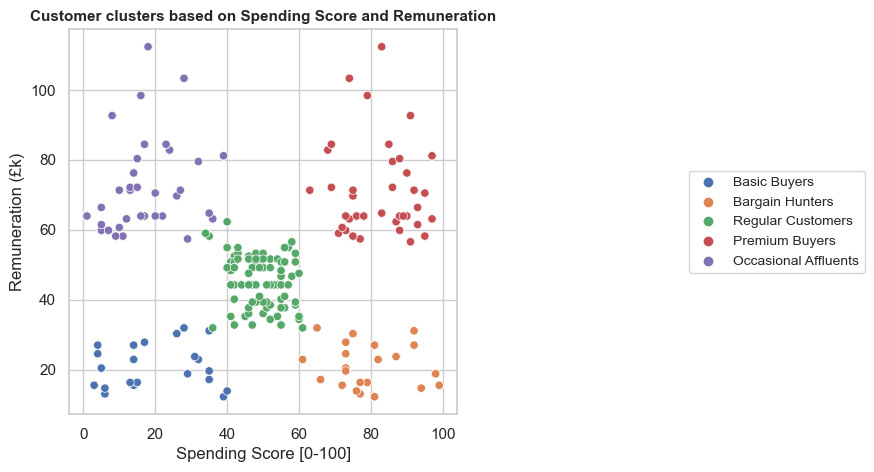

In [343]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.scatterplot(x ='spending_score', y='remuneration',data = tgr_customergrouped, hue='CustomerType')
plt.legend(loc='center right', bbox_to_anchor=(2.07,0.5), ncols = 1,fontsize = 10)
plt.title('Customer clusters based on Spending Score and Remuneration', fontsize = 11, fontweight = 'bold')
plt.xlabel('Spending Score [0-100]', fontsize = 12)
plt.ylabel('Remuneration (£k)', fontsize = 12)
plt.tight_layout()
plt.show()

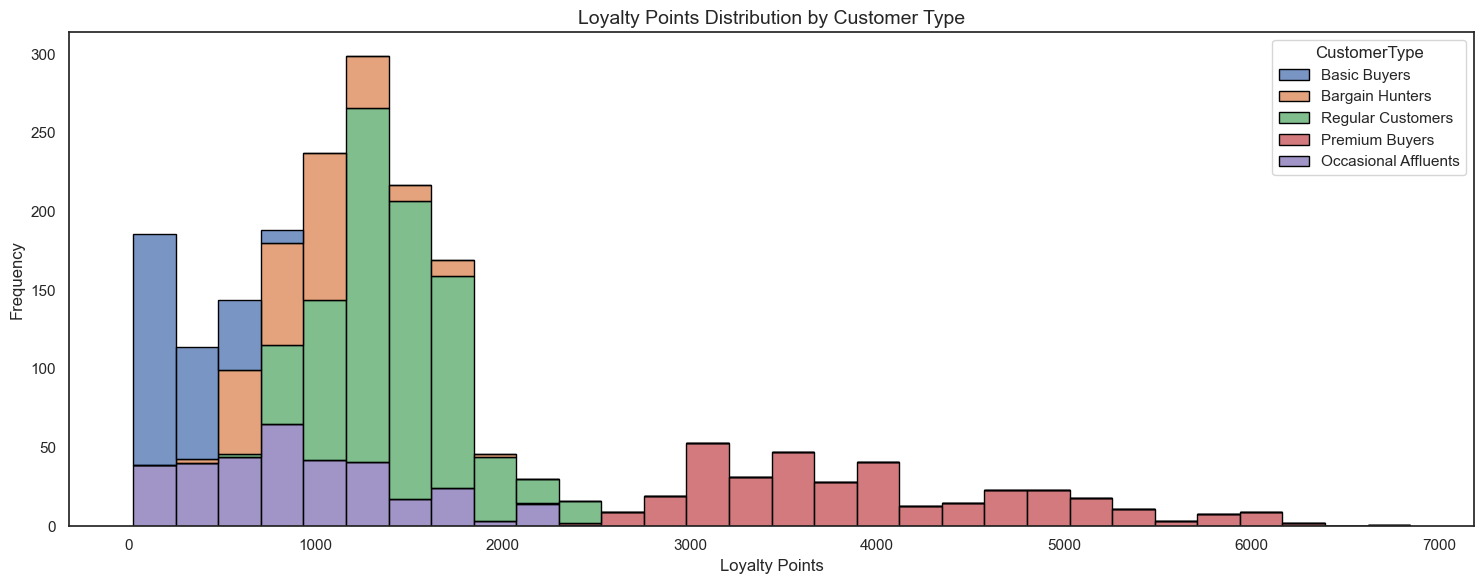

In [345]:
sns.set_theme(style="white")
plt.figure(figsize=(15, 6))
sns.histplot(data=tgr_customergrouped, x='loyalty_points', kde=False, hue = 'CustomerType', multiple="stack", 
    bins=30,
    edgecolor="black")
plt.title("Loyalty Points Distribution by Customer Type", fontsize=14, loc='center')
plt.xlabel("Loyalty Points", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
   <b>Customer Segment Insights</b>
   <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Premium Buyers (17.8%)</b>
            - Highest loyalty points and spending
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Regular Customers (38.7%)</b>
            - Largest segment with steady spending
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Occasional Affluents (13.4%)</b>
            - High income but low engagement
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Bargain Hunters (16.5%)</b>
            - High spending despite lower income
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Basic Buyers (13.6%)</b>
            - Minimal spending and engagement
        </li>
   </ul>
</div>

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 16px;
    color: #333;">
    <b>Business Recommendations</b>
    <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;margin: 4px 0">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Premium Buyers (17.8%)</b>
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Implement VIP program with exclusive benefits and early access to new products
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Develop premium product lines targeting this high-value segment
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Create referral programs to leverage their network
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Regular Customers (38.7%)</b>
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Focus on upselling and cross-selling to increase basket size
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Introduce mid-tier loyalty rewards to encourage higher spending
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Create bundle offers to increase transaction value
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Occasional Affluents (13.4%)</b>
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Develop targeted marketing campaigns highlighting premium products
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Create special occasion promotions to increase purchase frequency
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Implement personalized communication highlighting new product launches
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Bargain Hunters (16.5%)</b>
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Introduce tiered discounts based on purchase volume
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Create flash sales and limited-time offers
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Develop value-focused product lines maintaining quality
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Basic Buyers (13.6%)</b>
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Implement entry-level loyalty program with achievable rewards
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Create budget-friendly product options
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Use educational marketing to demonstrate product value
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b>Cross-Segment Strategies</b>
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Develop personalized marketing campaigns based on segment characteristics
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Create clear upgrade paths between segments with targeted incentives
            <li style="margin-bottom: 2px;">
            <span style="color: #2c7a7b; font-weight: normal;padding-left: 10px;">&#2790;</span>
            Regularly monitor segment migration to measure strategy effectiveness
        </li>
    </ul>
</div>

### 5. Analysing Customer Sentiment with Reviews

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;"> <b>Demonstration for Marketing team on text analysis potential. Customer sentiment analysis through NLP to identify: </b>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Top 20 Positive and Negative reviews received from the website
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 15 Most common words used in Online product positive and negative reviews
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Product level and Customer cluster level sentiment analysis and insights.
        </li>
    </ul>
</div>

In [125]:
tgr_reviews = tgr_customergrouped[['product','summary','review']]
tgr_reviews.head()

product                                            summary  \
0      453  The fact that 50% of this space is wasted on a...   
1      466  Another worthless Dungeon Master's screen from...   
2      254                    pretty, but also pretty useless   
3      263                                         Five Stars   
4      291                                         Money trap   

                                              review  
0  When it comes to a DM's screen, the space on t...  
1  An Open Letter to GaleForce9*:\n\nYour unpaint...  
2  Nice art, nice printing.  Why two panels are f...  
3  Amazing buy! Bought it as a gift for our new d...  
4  As my review of GF9's previous screens these w...

In [126]:
tgr_reviews.head(10).style.set_properties(subset=['summary','review'], **{'width': '1200px'})

In [127]:
tgr_reviews.tail(10).style.set_properties(subset=['summary','review'], **{'width': '1200px'})

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Some Reviews are detailed, some are very brief.
        </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Summary field values are sometimes a repeat of what is available in the review text, while the rest are summaries of detailed reviews.
        </li>
        <li>
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> <b> It would be ideal to start with sentiment of summary and review columns individually and find an average or the best out of both. </b>
        </li>
   

In [129]:
print('Summary Empty rows: ',tgr_reviews['summary'].isna().sum())
print('Review Empty rows: ', tgr_reviews['review'].isna().sum())

Summary Empty rows:  0
Review Empty rows:  0


<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 16px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0"> <b>Cleanup of review and summary columns </b>
     </ul>
</div> 

In [131]:
# Convert text to lower case
tgr_reviews['summary'] = tgr_reviews['summary'].apply(lambda x:" ".join(x.lower() for x in x.split()))
tgr_reviews['review'] = tgr_reviews['review'].apply(lambda x:" ".join(x.lower() for x in x.split()))

# Remove punctuations
tgr_reviews['summary'] = tgr_reviews['summary'].str.replace('[^\w\s]', ' ', regex=True)
tgr_reviews['review'] =  tgr_reviews['review'].str.replace('[^\w\s]', ' ', regex=True)

In [132]:
tgr_reviews.head(5).style.set_properties(subset=['summary','review'], **{'width': '1200px'})

In [133]:
print('Review Duplicates: ', tgr_reviews['review'].duplicated().sum())
print('Summary Duplicates: ', tgr_reviews['summary'].duplicated().sum())

Review Duplicates:  34
Summary Duplicates:  603


In [134]:
tgr_reviews[tgr_reviews['review'].duplicated()]

product                                    summary  \
326      2849                                 five stars   
371      5726                                 five stars   
408      1459                                 five stars   
416       830                                 five stars   
430      2173                                 five stars   
576      7141                                 five stars   
811      1183                                 five stars   
959     11086                                 five stars   
979      4405                                 five stars   
1006     1183                                 five stars   
1037     2130                                 five stars   
1050      815                                 five stars   
1145     6271                                 five stars   
1155     3153                                 five stars   
1186     3711                                 five stars   
1267      504  dungeon tiles master set   the wilderness   
1337     4702                                    love it   
1382     1031                                 five stars   
1414      811                                 five stars   
1531     4712                                 five stars   
1540    11084                                 five stars   
1544     3267                                 five stars   
1545     3277                                 five stars   
1553     6431                                 five stars   
1651     4452                                 five stars   
1713     7533                                 five stars   
1849     1577                                 five stars   
1856      930                                 five stars   
1863     6694                                 five stars   
1933    10995                                 five stars   
1938    11084                                 five stars   
1972      453                                 five stars   
1982      466                                three stars   
1998     1031                                 four stars   

                                                 review  
326                                             love it  
371                                              great   
408                                               great  
416                                             love it  
430                                             love it  
576                                              great   
811                                          great game  
959                                             love it  
979                                          great game  
1006                                         great game  
1037                                            awesome  
1050                                        great game   
1145                                               nice  
1155                             on time and nice item   
1186                                               good  
1267  this set is slightly worse than earlier ones  ...  
1337                                            love it  
1382                                            love it  
1414                   great expansion to a great game   
1531                                               cute  
1540                                            love it  
1544                                             great   
1545                                         very cute   
1553                                        as expected  
1651                                        as expected  
1713                                        love these   
1849                                       good product  
1856                                               fun   
1863                                         great game  
1933                                               good  
1938                                          good game  
1972                                             

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.4;margin: 4px 0"> <b> Although duplicates are shown, we see that they are for different products. Retaining the duplicates as they seem to be valid. </b>
    </ul>
</div>

#### 5a. Sentiment Analysis

In [137]:
# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.5;margin: 4px 0"> <b>Testing polarity scores for known positive and negative statements in summary and review to decide which column is understood better by the available VADER package</b></ul>
</div>

In [139]:
print('Review: ', sia.polarity_scores(tgr_reviews['review'][8]))
print('Summary: ', sia.polarity_scores(tgr_reviews['summary'][8]))

Review:  {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.9702}
Summary:  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}


In [140]:
print('Review: ', sia.polarity_scores(tgr_reviews['review'][4]))
print('Summary: ', sia.polarity_scores(tgr_reviews['summary'][4]))

Review:  {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.6808}
Summary:  {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}


In [141]:
tgr_review_sample = tgr_reviews.head(20)
# Create separate columns for summary sentiment scores 
tgr_review_sample['summary_score_vader'] = tgr_review_sample['summary'].apply(lambda x: sia.polarity_scores(x)['compound'])
tgr_review_sample['review_score_vader'] = tgr_review_sample['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Determine overall sentiment based on compound scores
def get_sentiment_label(compound):
    if compound >0.00:
        return 'Positive'
    elif compound <0.00:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling functions to create new columns
tgr_review_sample['vader_sentiment_review'] = tgr_review_sample['review_score_vader'].apply(get_sentiment_label)
tgr_review_sample['vader_sentiment_summary'] = tgr_review_sample['summary_score_vader'].apply(get_sentiment_label)

tgr_review_sample.style.set_properties(subset=['summary','review'], **{'width': '800px'})

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 8px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
   <b>Based on a manual review of these 20 rows:</b>
   <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;">
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Summary's sentiment score captures the sentiment correctly in 3 instances </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Review's sentiment score captures the sentiment correctly in 9 instances </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Both Summary and review columns' sentiment captures the sentiment correctly in 7 instances. </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Neither of them are getting the correct sentiment for 1 instance (row 14, product 1506)</li>
    </ul>
    <b> Inference: Review column is more appropriate for sentiment analysis</b>
</div>

In [143]:
#Applying VADER Sentiment Analysis for Polarity
tgr_reviews['review_polarity_vader'] = tgr_reviews['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
tgr_reviews.head()

product                                            summary  \
0      453  the fact that 50  of this space is wasted on a...   
1      466  another worthless dungeon master s screen from...   
2      254                    pretty  but also pretty useless   
3      263                                         five stars   
4      291                                         money trap   

                                              review  review_polarity_vader  
0  when it comes to a dm s screen  the space on t...                -0.6333  
1  an open letter to galeforce9   your unpainted ...                 0.8140  
2  nice art  nice printing  why two panels are fi...                -0.0045  
3  amazing buy  bought it as a gift for our new d...                 0.8860  
4  as my review of gf9 s previous screens these w...                -0.6808

In [144]:
#Applying Textblob Sentiment Analysis for Polarity and Subjectivity - for Comparison study
from textblob import TextBlob

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

tgr_reviews['review_polarity_Tx'] = tgr_reviews['review'].apply(generate_polarity)
tgr_reviews['review_subjectivity_Tx'] = tgr_reviews['review'].apply(generate_subjectivity)

tgr_reviews.head()

product                                            summary  \
0      453  the fact that 50  of this space is wasted on a...   
1      466  another worthless dungeon master s screen from...   
2      254                    pretty  but also pretty useless   
3      263                                         five stars   
4      291                                         money trap   

                                              review  review_polarity_vader  \
0  when it comes to a dm s screen  the space on t...                -0.6333   
1  an open letter to galeforce9   your unpainted ...                 0.8140   
2  nice art  nice printing  why two panels are fi...                -0.0045   
3  amazing buy  bought it as a gift for our new d...                 0.8860   
4  as my review of gf9 s previous screens these w...                -0.6808   

   review_polarity_Tx  review_subjectivity_Tx  
0           -0.036111                0.486111  
1            0.032684                0.440206  
2            0.115410                0.427755  
3            0.578788                0.784848  
4           -0.316667                0.316667

In [145]:
# Calculating an Average polarity value between VADER and Textblob for reference
tgr_reviews['avg_review_polarity'] = (tgr_reviews['review_polarity_vader']+tgr_reviews['review_polarity_Tx'])/2

In [146]:
tgr_reviews.head(20)

product                                            summary  \
0       453  the fact that 50  of this space is wasted on a...   
1       466  another worthless dungeon master s screen from...   
2       254                    pretty  but also pretty useless   
3       263                                         five stars   
4       291                                         money trap   
5       977                                         five stars   
6       979                                best gm screen ever   
7      1012                                         five stars   
8      1031                     great but could be even better   
9      1459  another missed opportunity  not a value add to...   
10     1463                                         five stars   
11     1473                                      love the map    
12     1497                            not a general dm screen   
13     1501                                     very weak game   
14     1506                            fell completely flat      
15      123                                         five stars   
16      486                                          good book   
17      830                          buckley was a card mommer   
18     1175              very advanced  but as good as it gets   
19     1183           you better know what you re getting into   

                                               review  review_polarity_vader  \
0   when it comes to a dm s screen  the space on t...                -0.6333   
1   an open letter to galeforce9   your unpainted ...                 0.8140   
2   nice art  nice printing  why two panels are fi...                -0.0045   
3   amazing buy  bought it as a gift for our new d...                 0.8860   
4   as my review of gf9 s previous screens these w...                -0.6808   
5                                      grandson loves                 0.5719   
6   i have bought many gm screens over the years  ...                 0.7958   
7                          came in perfect condition                  0.5719   
8   could be better but its still great  i love th...                 0.9702   
9   my review will mirror others in that this kind...                 0.9782   
10                                    works very well                 0.3384   
11                              can t wait to use it                  0.0000   
12  this is a campaign specific dm screen meant to...                 0.9360   
13  this is one of the worst games i have ever pla...                 0.6187   
14  it sounded like a really amazing concept  but ...                 0.8544   
15                        very fun game for my family                 0.5563   
16  pretty good book with a variety of unique card...                 0.9753   
17  when i unexpectedly came across a picture of b...                 0.9953   
18  if you ve mastered hugard and braue s stuff  i...                 0.9707   
19  i ve yet to see a bad review for this book  an...                 0.9501   

    review_polarity_Tx  review_subjectivity_Tx  avg_review_polarity  
0            -0.036111                0.486111            -0.334706  
1             0.032684                0.440206             0.423342  
2             0.115410                0.427755             0.055455  
3             0.578788                0.784848             0.732394  
4            -0.316667                0.316667            -0.498733  
5             0.000000                0.000000             0.285950  
6             0.660000                0.700000             0.727900  
7             1.000000                1.000000             0.785950  
8             0.372222                0.463889             0.671211  
9             0.150760                0.505054             0.564480  
10            0.200000                0.300000             0.269200  
11            0.000000                0.000000             0.000000  
12            0.070000    

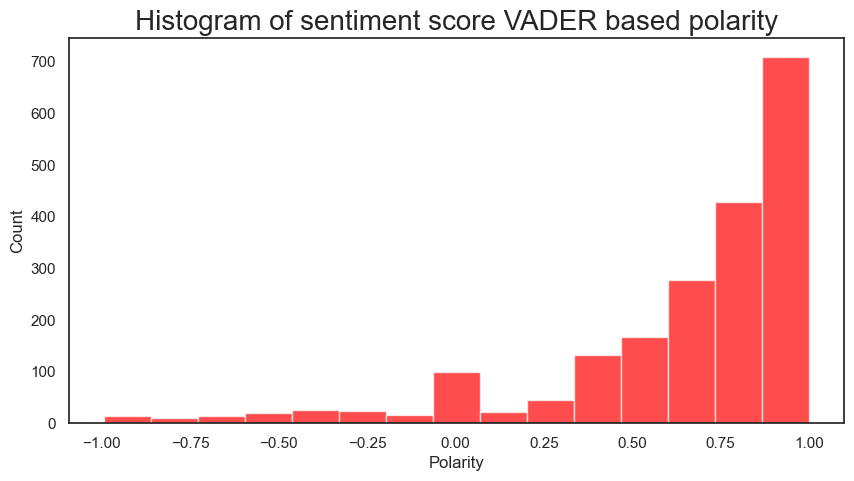

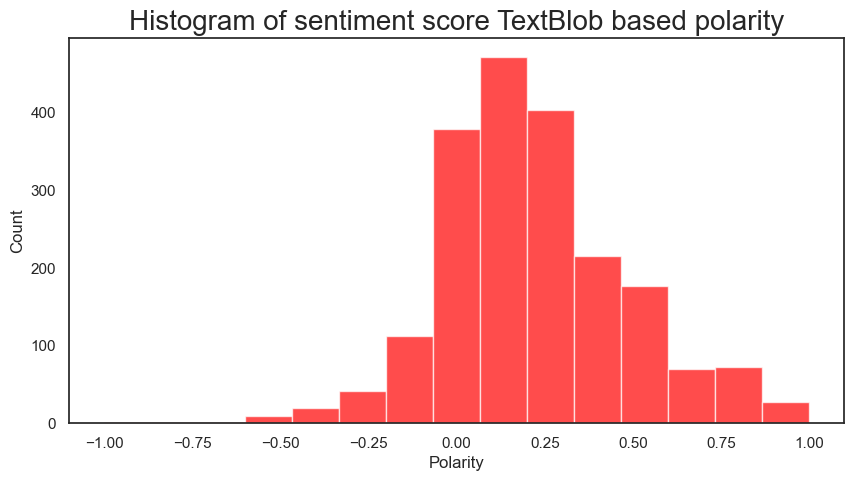

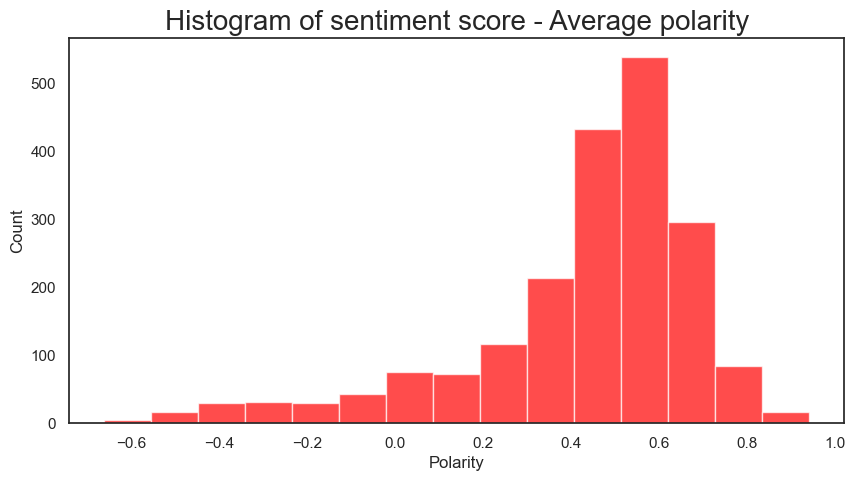

In [147]:
num_bins = 15
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(tgr_reviews['review_polarity_vader'], num_bins,facecolor='red',alpha=0.7)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score VADER based polarity', fontsize = 20)
plt.show()

num_bins = 15
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(tgr_reviews['review_polarity_Tx'], num_bins,facecolor='red',alpha=0.7)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score TextBlob based polarity', fontsize = 20)
plt.show()

num_bins = 15
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(tgr_reviews['avg_review_polarity'], num_bins,facecolor='red',alpha=0.7)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score - Average polarity', fontsize = 20)
plt.show()

In [148]:
# Basic classification of polarity to a sentiment value
tgr_reviews['vader_sentiment'] = tgr_reviews['review_polarity_vader'].apply(get_sentiment_label)
tgr_reviews['tx_sentiment'] = tgr_reviews['review_polarity_Tx'].apply(get_sentiment_label)
tgr_reviews['avg_sentiment'] = tgr_reviews['avg_review_polarity'].apply(get_sentiment_label)

In [149]:
# Identifying mismatches between VADER and TextBlob
unequal_sentiments = tgr_reviews[tgr_reviews['vader_sentiment'] != tgr_reviews['tx_sentiment']]
unequal_sentiments

product                          summary  \
2         254  pretty  but also pretty useless   
5         977                       five stars   
13       1501                   very weak game   
15        123                       five stars   
20       1212                     don t bother   
...       ...                              ...   
1988     1012                        two stars   
1991      466                       five stars   
1993      263                             gift   
1998     1031                       four stars   
1999      453                   love this game   

                                                 review  \
2     nice art  nice printing  why two panels are fi...   
5                                        grandson loves   
13    this is one of the worst games i have ever pla...   
15                          very fun game for my family   
20    i don t know how well they work  if they re a ...   
...                                                 ...   
1988                     not as much fun as i had hoped   
1991                             addicted to this game    
1993                                               gift   
1998                                          fun game    
1999  this game is fun  a lot like scrabble without ...   

      review_polarity_vader  review_polarity_Tx  review_subjectivity_Tx  \
2                   -0.0045            0.115410                0.427755   
5                    0.5719            0.000000                0.000000   
13                   0.6187           -0.040909                0.628788   
15                   0.5563           -0.005000                0.330000   
20                   0.6124           -0.250000                0.850000   
...                     ...                 ...                     ...   
1988                -0.0263            0.300000                0.200000   
1991                 0.0000           -0.400000                0.500000   
1993                 0.4404            0.000000                0.000000   
1998                 0.5106           -0.050000                0.300000   
1999                 0.5209           -0.095833                0.366667   

      avg_review_polarity vader_sentiment tx_sentiment avg_sentiment  
2                0.055455        Negative     Positive      Positive  
5                0.285950        Positive      Neutral      Positive  
13               0.288895        Positive     Negative      Positive  
15               0.275650        Positive     Negative      Positive  
20               0.181200        Positive     Negative      Positive  
...                   ...             ...          ...           ...  
1988             0.136850        Negative     Positive      Positive  
1991            -0.200000         Neutral     Negative      Negative  
1993             0.220200        Positive      Neutral      Positive  
1998             0.230300        Positive     Negative      Positive  
1999             0.212533        Positive     Negative      Positive  

[322 rows x 10 columns]

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Between VADER and TextBlob, 322 of the 2000 are not being tagged the same way(16%). </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Manually reviewing a random sample of 40 to determine which of the 2 models provides better sentiment analysis </li>
    </ul>
</div>

In [151]:
unequal_sentiments[['review','review_polarity_vader','review_polarity_Tx','avg_review_polarity','vader_sentiment','tx_sentiment','avg_sentiment']].head(20).style.set_properties(subset=['review'], **{'width': '800px'})

In [152]:
unequal_sentiments[['review','review_polarity_vader','review_polarity_Tx','avg_review_polarity','vader_sentiment','tx_sentiment','avg_sentiment']].tail(20).style.set_properties(subset=['review'], **{'width': '800px'})

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 8px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
   <b>Based on the Manual analysis of the scores, the conclusions we can arrive at are:</b>
   <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;">
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 29 classifications from VADER are correct </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 9 classifications from TextBlob are correct </li>
    </ul>
    <b>Comparitive analysis between VADER and Textblob results:</b>
    <ul style="list-style-type: none; padding-left: 10px; line-height: 1.6;">
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Positives are scored higher by Vader compared to Textblob - This causes more neutrals and more negatives from TextBlob </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span>  Negatives are misread by Vader compared to Textblob </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Textblob misreads even positives as Neutral or Negatives </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> The majority of reviews are positive, which suggests that VADER demonstrates good accuracy in manual sentiment checks for product reviews. </li>
        <li style="margin-bottom: 4px;"> 
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Given the prevalence of positive reviews, VADER's polarity scores are particularly useful for effectively identifying and differentiating between positive and negative sentiments about products. </li>
    </ul>
    <b> Continuing with VADER Sentiment analysis for Polarity scores and TextBlob for Subjectivity</b>
    </div>

In [154]:
#Retaining VADER Sentiment Analysis for Polarity and TextBlob for Subjectivity
tgr_reviews.drop(columns = ['review_polarity_Tx','avg_review_polarity','tx_sentiment','avg_sentiment'], inplace=True)

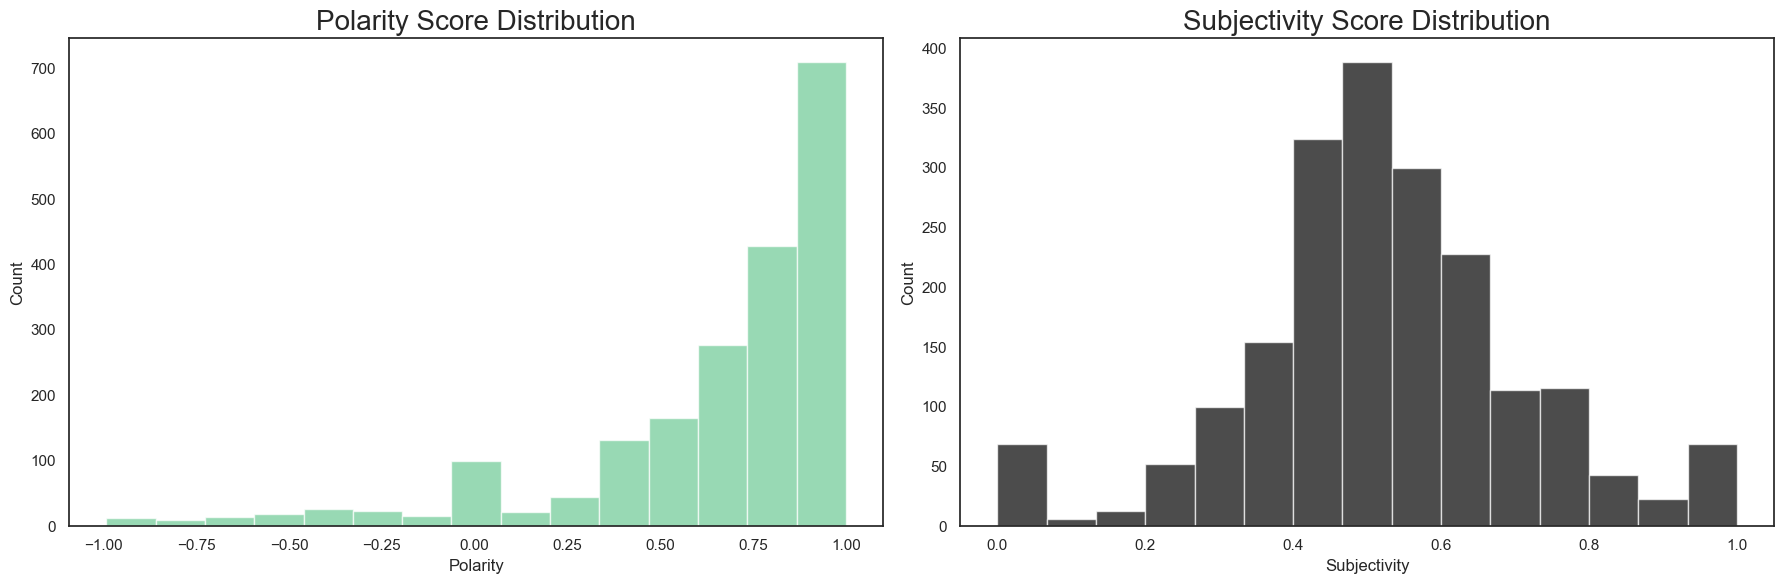

In [155]:
# Create a figure with two subplots side by side
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
num_bins = 15
n, bins, patches = plt.hist(tgr_reviews['review_polarity_vader'], num_bins,facecolor='#6dc994',alpha=0.7) # VADER based Polarity
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Polarity Score Distribution', fontsize = 20)

plt.subplot(1, 2, 2)
num_bins = 15
n, bins, patches = plt.hist(tgr_reviews['review_subjectivity_Tx'], num_bins,facecolor='black',alpha=0.7) # Textblob based Subjectivity
plt.xlabel('Subjectivity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Subjectivity Score Distribution', fontsize = 20) 
plt.tight_layout()
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> The Polarity score histogram indicates that the majority of the reviews have a positive sentiment, with a smaller proportion of reviews exhibiting negative sentiment. </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> The Subjectivity score histogram indicates that the review text contains a mix of subjective and objective content, without a clear skew towards one end of the subjectivity spectrum. </li>
    </ul>
</div>

In [157]:
# Top 20 Positive Reviews
positive_sentiment = tgr_reviews.nlargest(20, 'review_polarity_vader')
# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['product', 'summary', 'review', 'review_polarity_vader','vader_sentiment']]

# Top 20 Negative Reviews
negative_sentiment = tgr_reviews.nsmallest(20, 'review_polarity_vader')
# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['product', 'summary', 'review', 'review_polarity_vader','vader_sentiment']]

# Displaying Summary text of Top 20 Best and Worst reviews
print('\n Top 20 Best Reviews - Summary data:')
display(positive_sentiment[['product','review_polarity_vader','vader_sentiment','summary']].style.set_properties(subset=['summary'], **{'width': '800px'}).background_gradient(subset=['review_polarity_vader'], cmap='Greens'))

print('\n\n Top 20 Worst Reviews - Summary data:')
display(negative_sentiment[['product','review_polarity_vader','vader_sentiment','summary']].style.set_properties(subset=['summary'], **{'width': '800px'}).background_gradient(subset=['review_polarity_vader'], cmap='Reds_r'))


 Top 20 Best Reviews - Summary data:




 Top 20 Worst Reviews - Summary data:


In [158]:
# Displaying Complete Review text of Top 20 Best and Worst reviews
print('\n Top 20 Best Reviews - Review data:')
display(positive_sentiment[['product','review_polarity_vader','vader_sentiment','review']].style.set_properties(subset=['review'], **{'width': '1200px'}).background_gradient(subset=['review_polarity_vader'], cmap='Greens'))

print('\n Top 20 Worst Reviews - Review data:')
display(negative_sentiment[['product','review_polarity_vader','vader_sentiment','review']].style.set_properties(subset=['review'], **{'width': '1200px'}).background_gradient(subset=['review_polarity_vader'], cmap='Reds_r'))



 Top 20 Best Reviews - Review data:



 Top 20 Worst Reviews - Review data:


In [159]:
review_sentiment = pd.DataFrame(tgr_reviews['vader_sentiment'].value_counts())
review_sentiment.reset_index(inplace=True)
review_sentiment

vader_sentiment  count
0        Positive   1793
1        Negative    130
2         Neutral     77

<Axes: ylabel='count'>

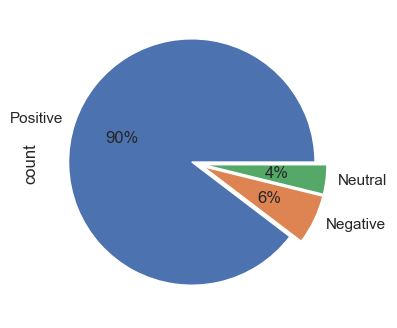

In [160]:
tgr_reviews['vader_sentiment'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%.0f%%',figsize=(4,4))

<Axes: ylabel='count'>

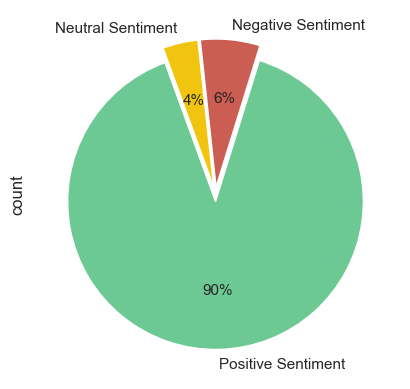

In [161]:
tgr_reviews['vader_sentiment'].value_counts().plot.pie(
    explode=[0.05, 0.05, 0.05],
    autopct='%.0f%%',
    colors=['#6dc994','#cc5d52','#f1c40f'],
    labels=['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment'],
    fontsize=11, counterclock=True, rotatelabels=False, 
   startangle=110, 
)

<Axes: ylabel='count'>

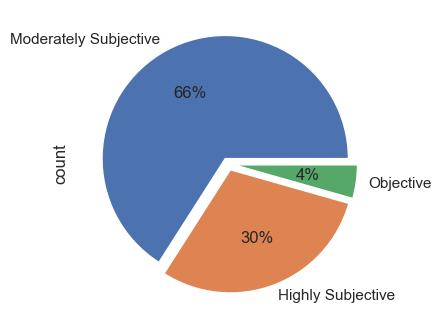

In [162]:
def get_subjectivity_label(subjectivity):
    if subjectivity >=0.6:
        return 'Highly Subjective'
    elif subjectivity <0.2:
        return 'Objective'
    else:
        return 'Moderately Subjective'

tgr_reviews['subjectivity_cat'] = tgr_reviews['review_subjectivity_Tx'].apply(get_subjectivity_label)

tgr_reviews['subjectivity_cat'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%.0f%%',figsize=(4,4))

<Axes: ylabel='count'>

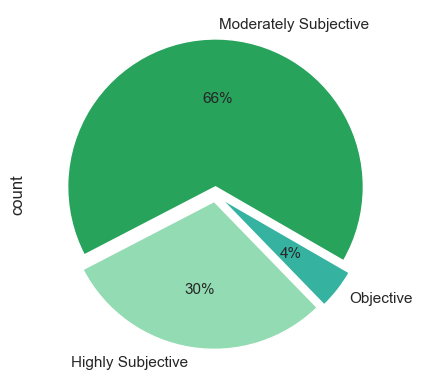

In [163]:
tgr_reviews['subjectivity_cat'].value_counts().plot.pie(
    explode=[0.05, 0.05, 0.05],
    autopct='%.0f%%',
    colors=['#27a35c','#93dbb2','#36b3a0'],
    labels=['Moderately Subjective', 'Highly Subjective', 'Objective'],
    fontsize=11, counterclock=True, rotatelabels=False, 
   startangle=330
 )

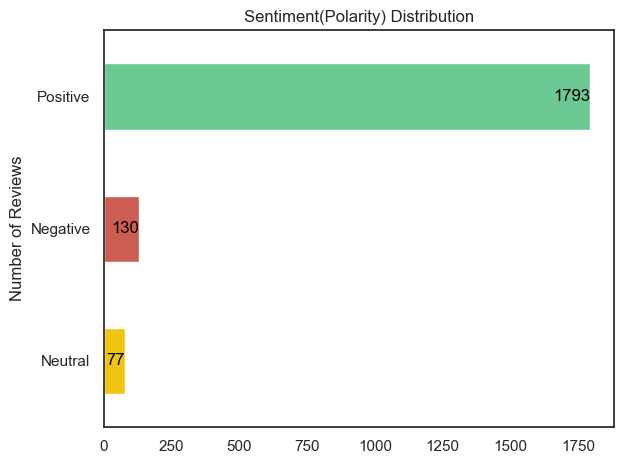

In [164]:
# Get the polarity sentiment counts
polarity_counts = tgr_reviews['vader_sentiment'].value_counts().sort_values(ascending = True)

# Create the horizontal bar chart
polarity_counts.plot(kind='barh',                     
                    color=['#f1c40f','#cc5d52','#6dc994'],
                    xlabel='',
                    ylabel='Number of Reviews',
                    title='Sentiment(Polarity) Distribution',
                   )

# Add count labels
for i, v in enumerate(polarity_counts):
    plt.text(v, i, f"{v}", 
             color='black', va='center', ha='right')

plt.tight_layout()
plt.show()

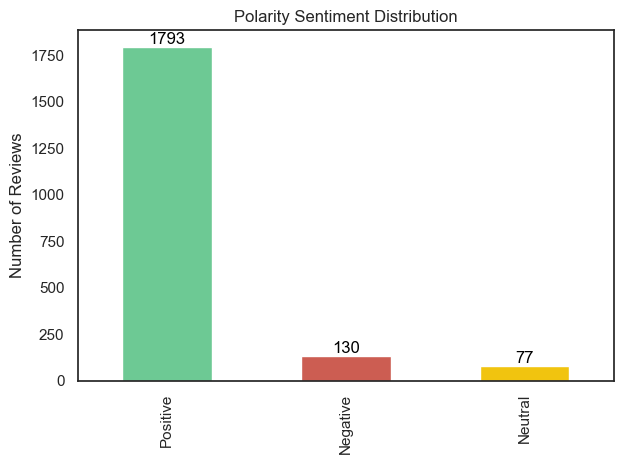

In [165]:
polarity_counts = tgr_reviews['vader_sentiment'].value_counts().sort_values(ascending = False)

# Create the vertical bar chart
polarity_counts.plot(kind='bar', 
                    color=['#6dc994','#cc5d52','#f1c40f'],
                    xlabel='',
                    ylabel='Number of Reviews',
                    title='Polarity Sentiment Distribution')

# Add percentage labels
for i, v in enumerate(polarity_counts):
    plt.text(i, v, f"{v}",
             color='black', va='bottom', ha='center')

plt.tight_layout()
plt.show()

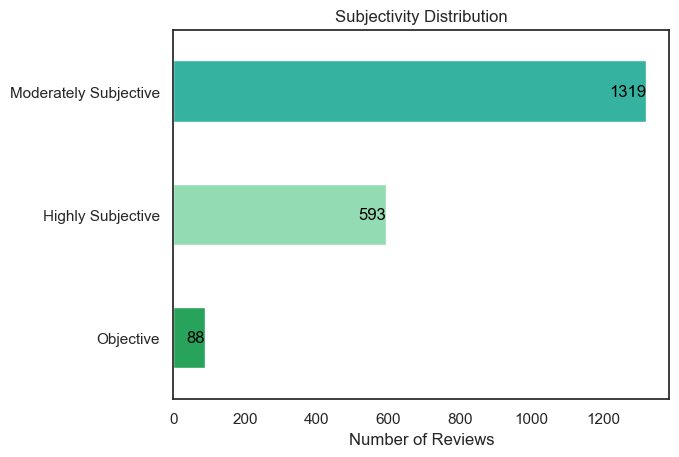

In [166]:
subjective_counts = tgr_reviews['subjectivity_cat'].value_counts().sort_values(ascending = True)

# Create the horizontal bar chart
subjective_counts.plot(kind='barh', 
                    color=['#27a35c','#93dbb2','#36b3a0'],
                    xlabel='Number of Reviews',
                    ylabel='',
                    title='Subjectivity Distribution')

# Add count labels
for i, v in enumerate(subjective_counts):
    plt.text(v, i, f"{v}", 
             color='black', va='center', ha='right')

#### 5b. WordCloud and Common Words

In [168]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))
custom_stopwords = ['would','could','may','might','can','will','buy','bought','thought','think',
                    'also','game','one','card','get','use','used','old','son','got','year','year old'
                    'thought','since','ever','even','guess','bit','daughter','other','others','made','use','used','another','like']

def WordCloudGenerator(df,tokens_column):
    """
    Generate a word cloud from the specified comments in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the tokens.
    tokens_column (str): The name of the column containing the tokens.

    Returns:
    None: Displays the generated word cloud.
    """
    # Generate string based on the tokens in the specified column
    all_comments = ' '.join([' '.join(tokens) for tokens in df[tokens_column]])

    word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(all_comments)
    plt.figure(figsize = (16,9),facecolor = None)
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    return


In [169]:
rev_tokens = tgr_reviews['review'].apply(word_tokenize)
summ_tokens = tgr_reviews['summary'].apply(word_tokenize)

tgr_reviews['rev_tokens'] = rev_tokens.apply(lambda x: [w for w in x if w not in english_stopwords])
tgr_reviews['summ_tokens'] = summ_tokens.apply(lambda x: [w for w in x if w not in english_stopwords])

tgr_reviews['rev_tokens'] = tgr_reviews['rev_tokens'].apply(lambda x: [w for w in x if w not in custom_stopwords])
tgr_reviews['summ_tokens'] = tgr_reviews['summ_tokens'].apply(lambda x: [w for w in x if w not in custom_stopwords])

In [170]:
tgr_reviews.head()

product                                            summary  \
0      453  the fact that 50  of this space is wasted on a...   
1      466  another worthless dungeon master s screen from...   
2      254                    pretty  but also pretty useless   
3      263                                         five stars   
4      291                                         money trap   

                                              review  review_polarity_vader  \
0  when it comes to a dm s screen  the space on t...                -0.6333   
1  an open letter to galeforce9   your unpainted ...                 0.8140   
2  nice art  nice printing  why two panels are fi...                -0.0045   
3  amazing buy  bought it as a gift for our new d...                 0.8860   
4  as my review of gf9 s previous screens these w...                -0.6808   

   review_subjectivity_Tx vader_sentiment       subjectivity_cat  \
0                0.486111        Negative  Moderately Subjective   
1                0.440206        Positive  Moderately Subjective   
2                0.427755        Negative  Moderately Subjective   
3                0.784848        Positive      Highly Subjective   
4                0.316667        Negative  Moderately Subjective   

                                          rev_tokens  \
0  [comes, dm, screen, space, screen, absolute, p...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3                  [amazing, gift, new, dm, perfect]   
4  [review, gf9, previous, screens, completely, u...   

                                         summ_tokens  
0  [fact, 50, space, wasted, art, terribly, infor...  
1   [worthless, dungeon, master, screen, galeforce9]  
2                          [pretty, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [171]:
tgr_reviews.head()

product                                            summary  \
0      453  the fact that 50  of this space is wasted on a...   
1      466  another worthless dungeon master s screen from...   
2      254                    pretty  but also pretty useless   
3      263                                         five stars   
4      291                                         money trap   

                                              review  review_polarity_vader  \
0  when it comes to a dm s screen  the space on t...                -0.6333   
1  an open letter to galeforce9   your unpainted ...                 0.8140   
2  nice art  nice printing  why two panels are fi...                -0.0045   
3  amazing buy  bought it as a gift for our new d...                 0.8860   
4  as my review of gf9 s previous screens these w...                -0.6808   

   review_subjectivity_Tx vader_sentiment       subjectivity_cat  \
0                0.486111        Negative  Moderately Subjective   
1                0.440206        Positive  Moderately Subjective   
2                0.427755        Negative  Moderately Subjective   
3                0.784848        Positive      Highly Subjective   
4                0.316667        Negative  Moderately Subjective   

                                          rev_tokens  \
0  [comes, dm, screen, space, screen, absolute, p...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3                  [amazing, gift, new, dm, perfect]   
4  [review, gf9, previous, screens, completely, u...   

                                         summ_tokens  
0  [fact, 50, space, wasted, art, terribly, infor...  
1   [worthless, dungeon, master, screen, galeforce9]  
2                          [pretty, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

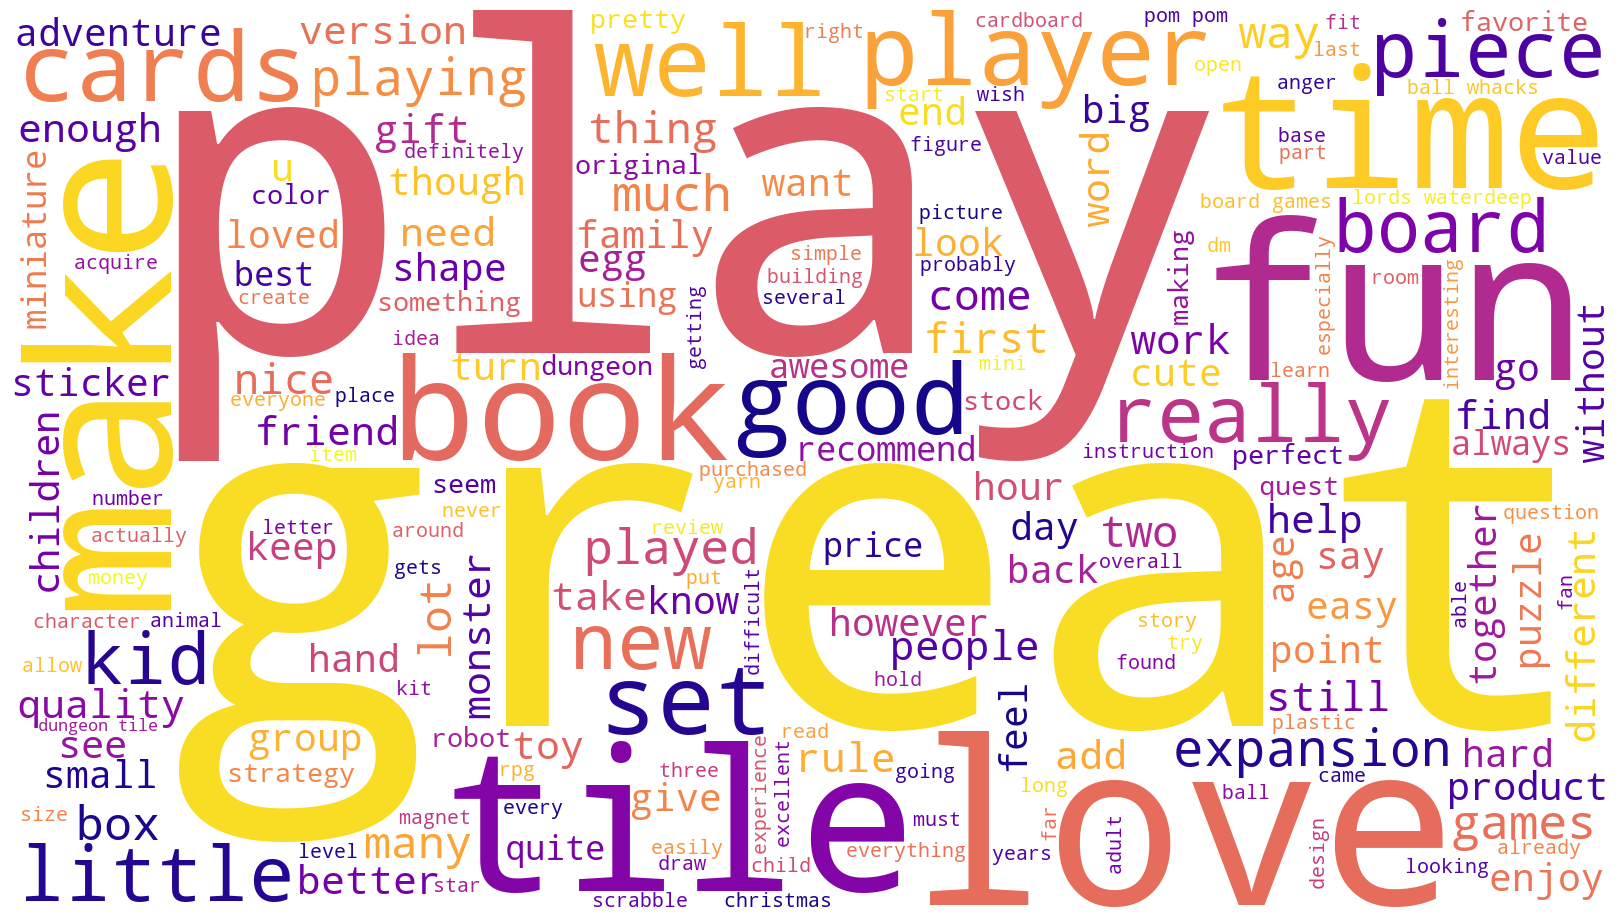

In [172]:
WordCloudGenerator(tgr_reviews,'rev_tokens')

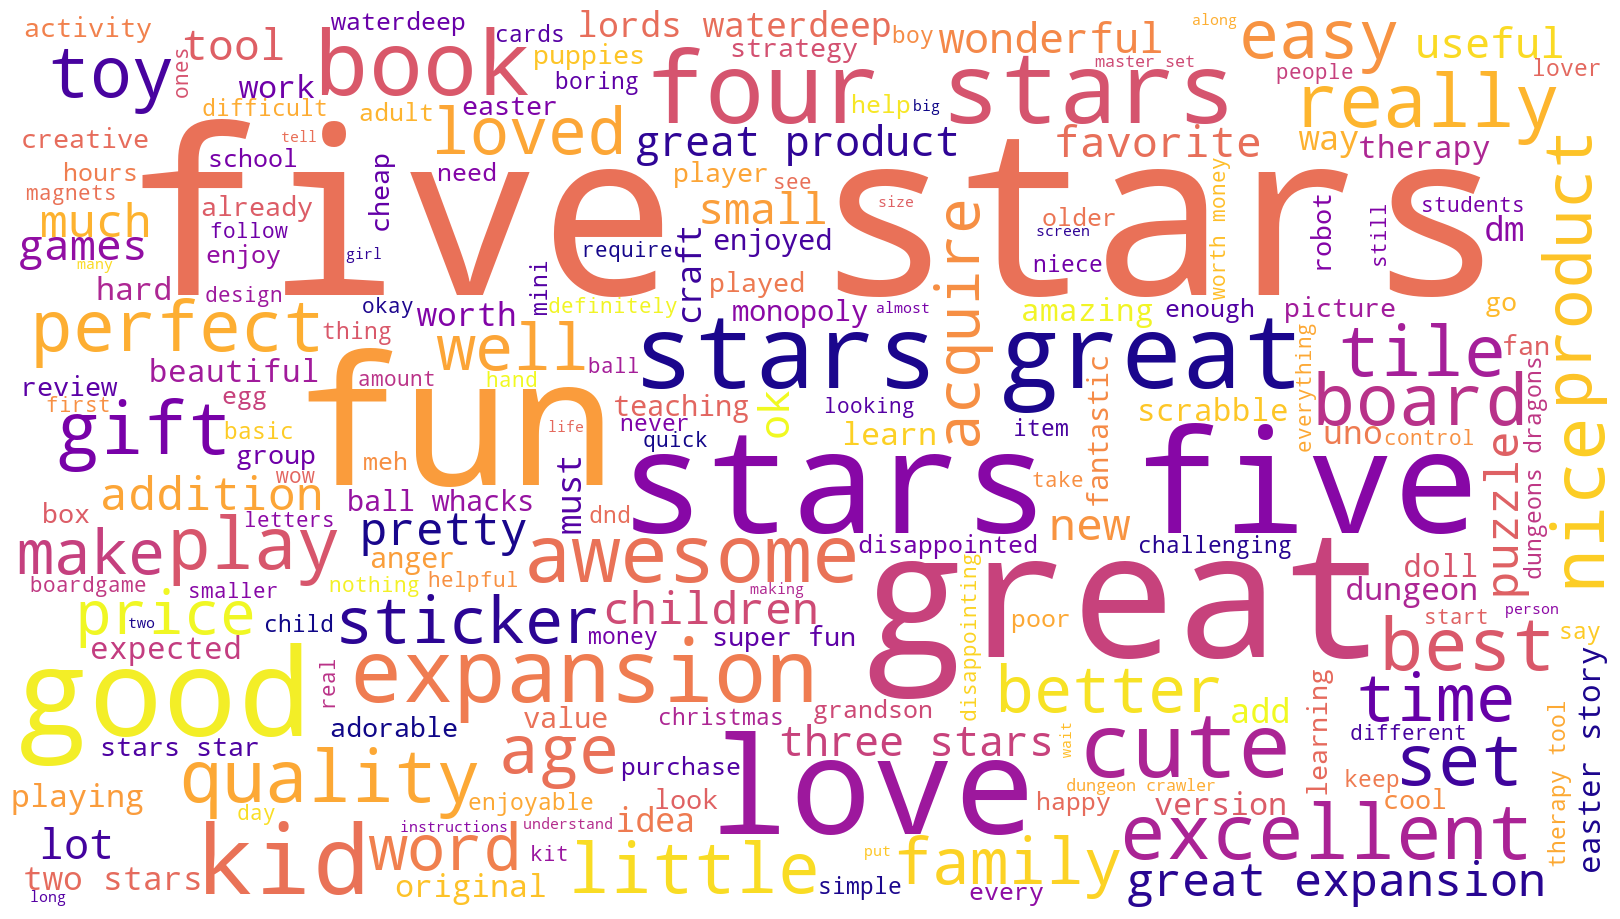

In [173]:
WordCloudGenerator(tgr_reviews,'summ_tokens')

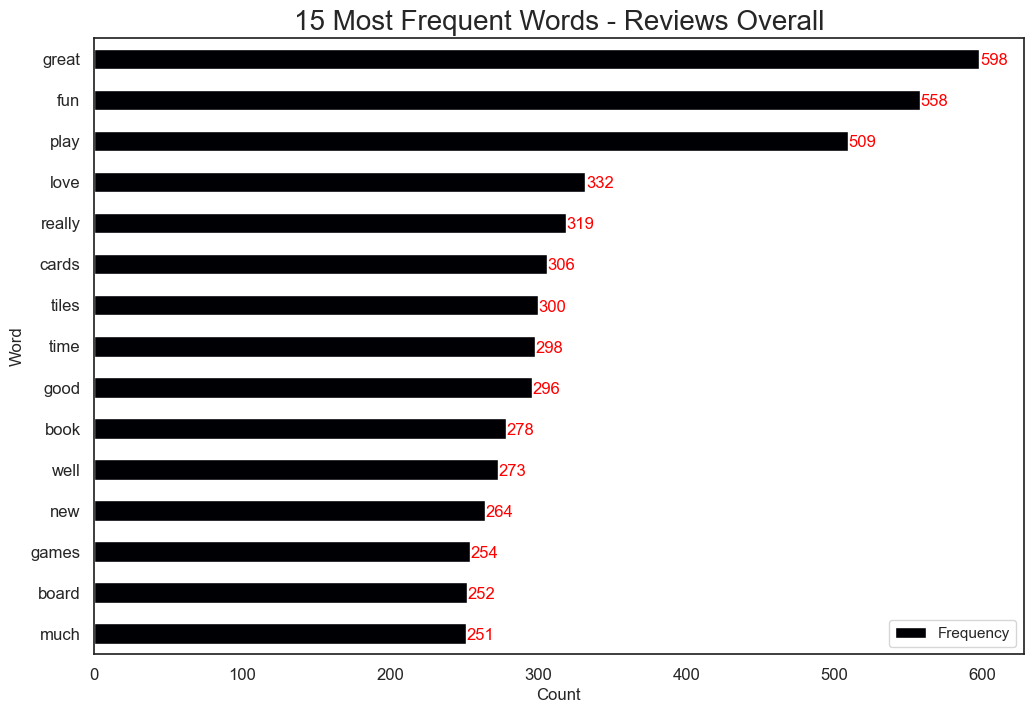

In [174]:
from collections import Counter

def MostCommonWords(tokens_column,title_str):
    all_tokens = [word for sublist in tokens_column for word in sublist]
    counts = pd.DataFrame(Counter(all_tokens).most_common(15), columns = ['Word','Frequency']).sort_values(by='Frequency',ascending=True).set_index('Word')
    ax = counts.plot(kind='barh',figsize =(12,8),fontsize=12, colormap = 'magma')
    ax.set_xlabel('Count', fontsize = 12)
    ax.set_ylabel('Word', fontsize = 12)
    ax.set_title(f'15 Most Frequent Words - {title_str}', fontsize=20)
    for i in ax.patches:
        ax.text(i.get_width()+.41, i.get_y()+.1,str(round((i.get_width()),2)), fontsize=12,color='red')

MostCommonWords(tgr_reviews['rev_tokens'],'Reviews Overall')

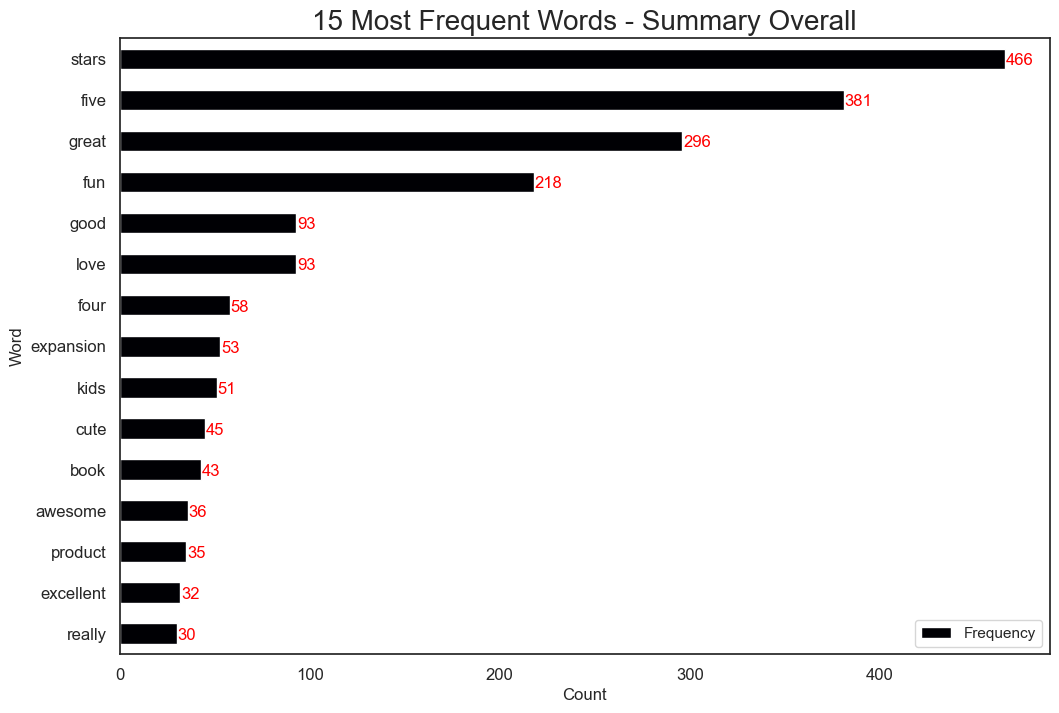

In [175]:
MostCommonWords(tgr_reviews['summ_tokens'],'Summary Overall')

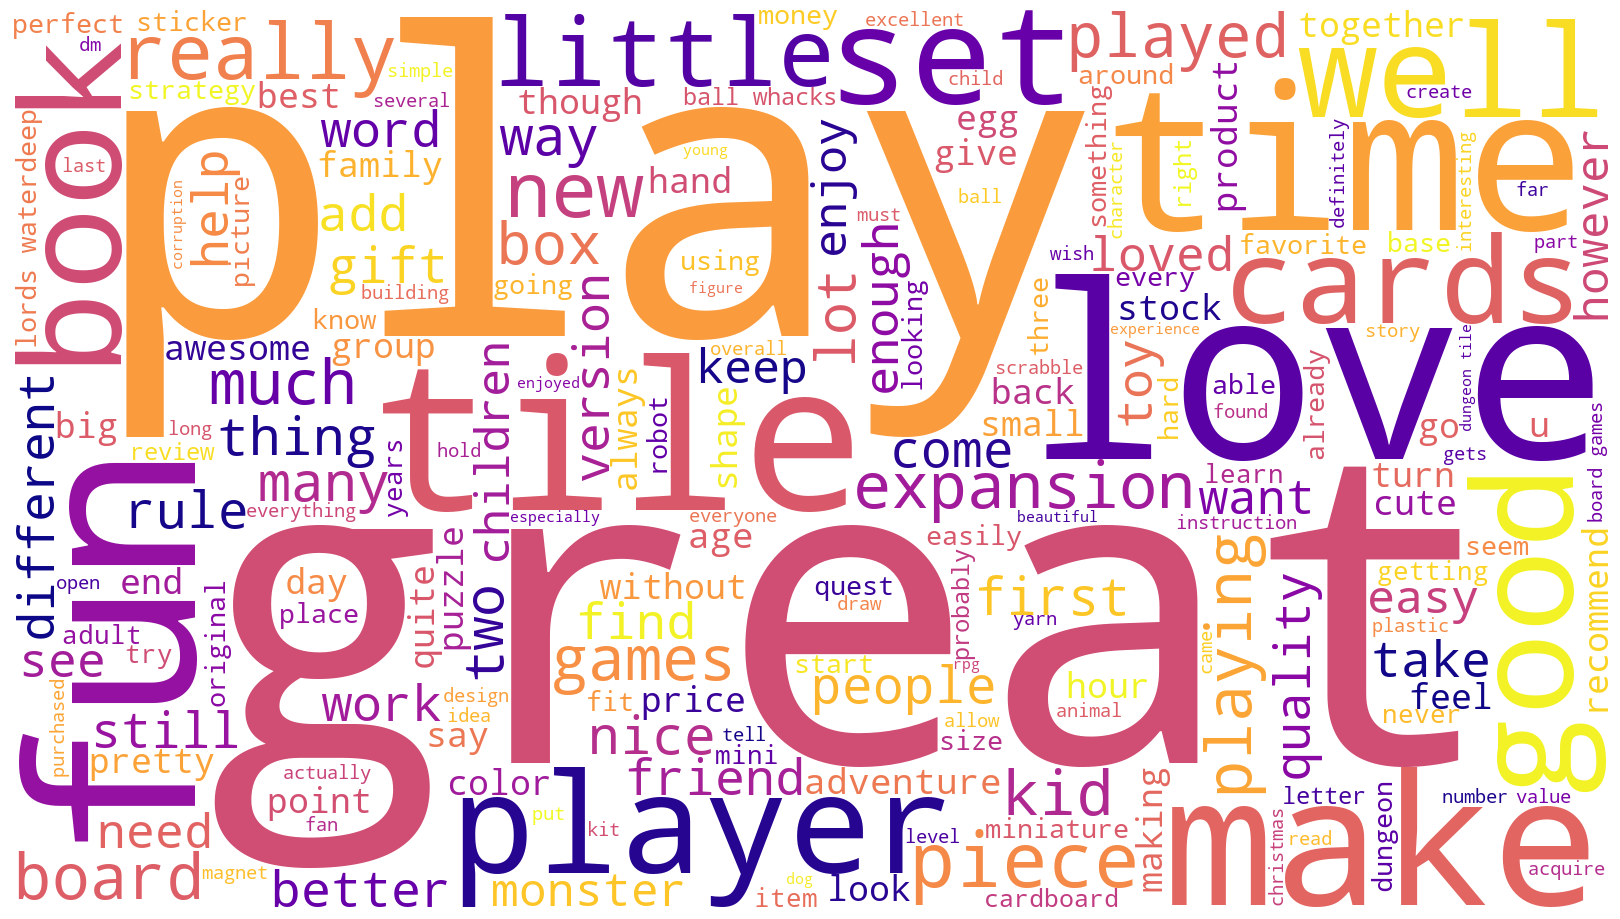

In [176]:
#Positive Sentiment - Word Cloud
WordCloudGenerator(tgr_reviews[tgr_reviews['vader_sentiment']=='Positive'],'rev_tokens')

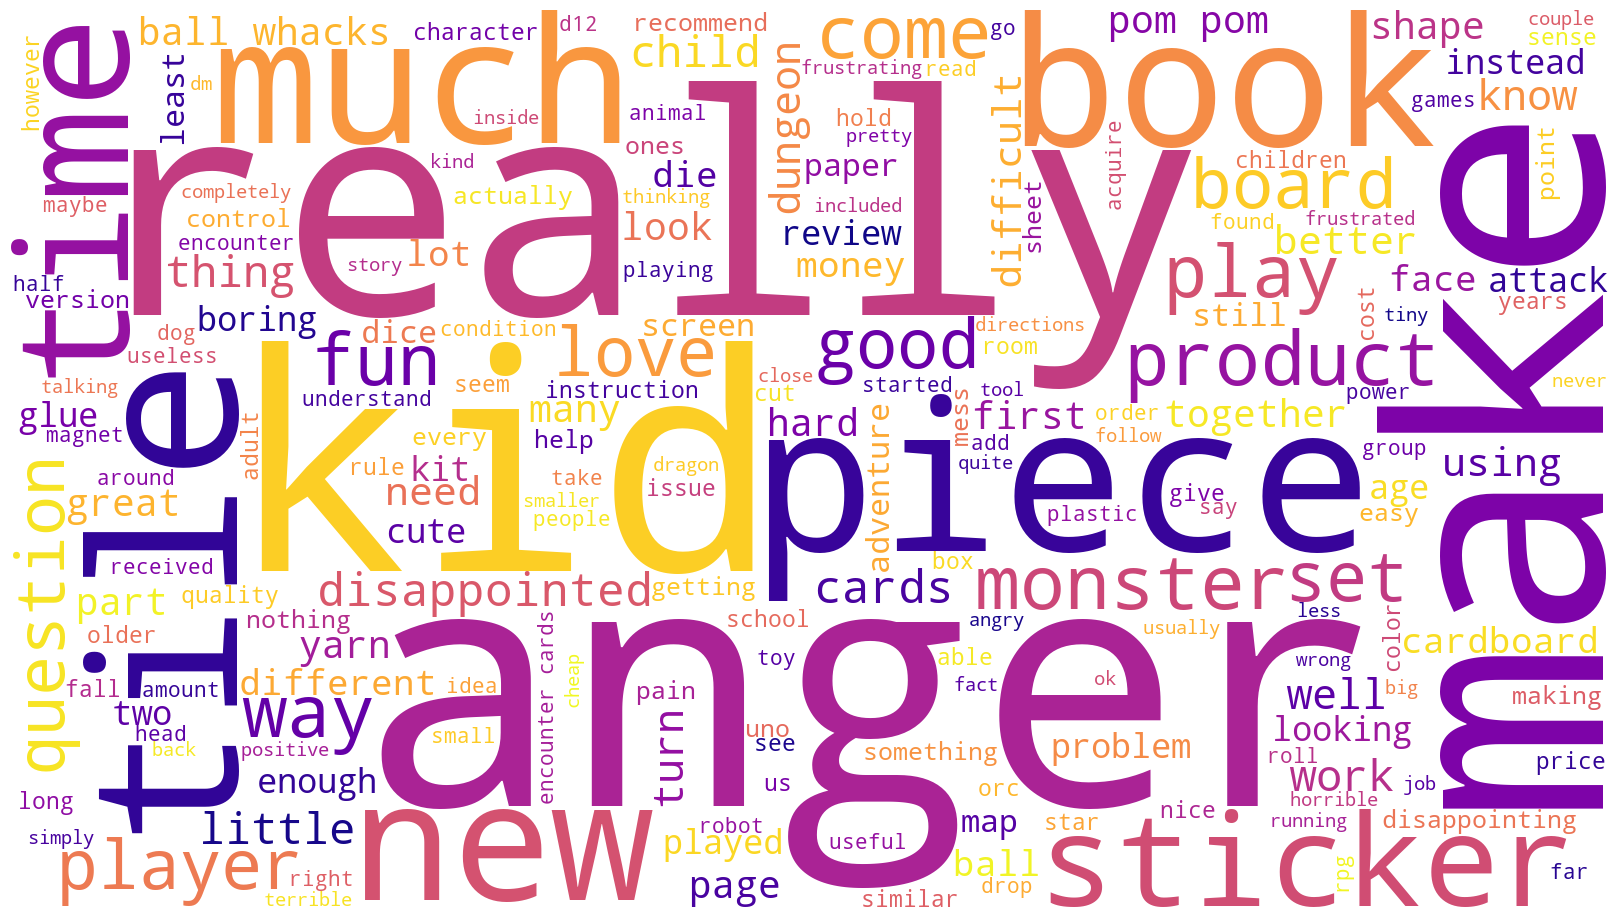

In [177]:
#Negative Sentiment Word Cloud
WordCloudGenerator(tgr_reviews[tgr_reviews['vader_sentiment']=='Negative'],'rev_tokens')

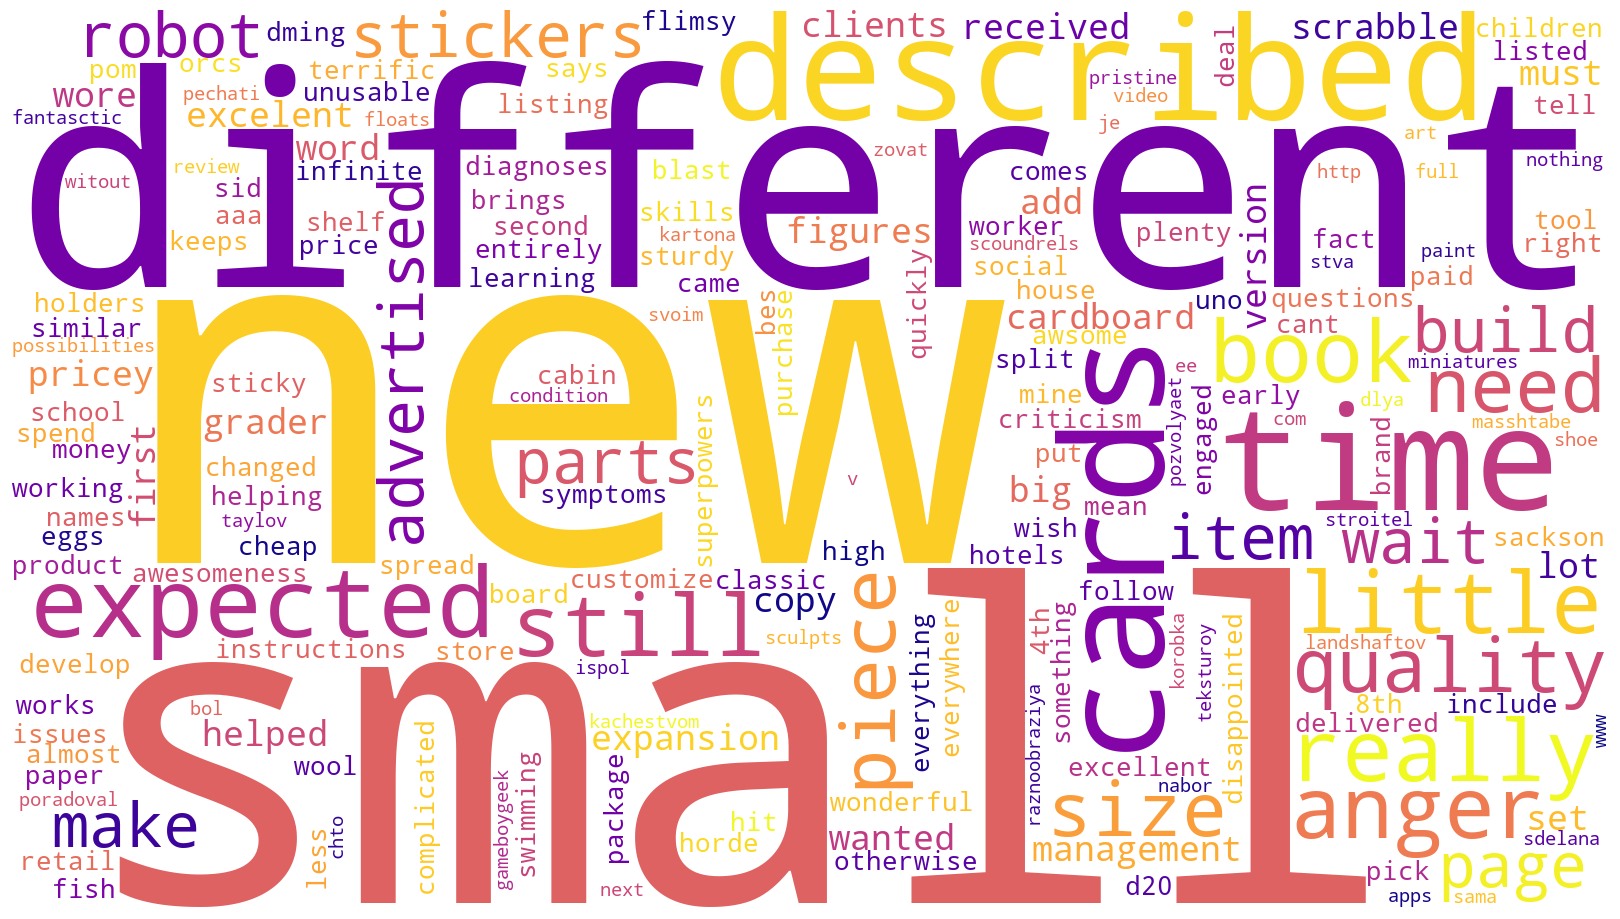

In [178]:
#Neutral Sentiment WordCloud
WordCloudGenerator(tgr_reviews[tgr_reviews['vader_sentiment']=='Neutral'],'rev_tokens')

#### 5c. Sentiment Analysis - Product and Customer group level analysis

In [180]:
tgr_customergrouped1 = tgr_customergrouped.rename(columns={'summary': 'summary_raw', 'review': 'review_raw','product': 'product_id'})

tgr_combined = pd.concat([tgr_reviews, tgr_customergrouped1], axis=1, join="inner")
tgr_combined.head()

product                                            summary  \
0      453  the fact that 50  of this space is wasted on a...   
1      466  another worthless dungeon master s screen from...   
2      254                    pretty  but also pretty useless   
3      263                                         five stars   
4      291                                         money trap   

                                              review  review_polarity_vader  \
0  when it comes to a dm s screen  the space on t...                -0.6333   
1  an open letter to galeforce9   your unpainted ...                 0.8140   
2  nice art  nice printing  why two panels are fi...                -0.0045   
3  amazing buy  bought it as a gift for our new d...                 0.8860   
4  as my review of gf9 s previous screens these w...                -0.6808   

   review_subjectivity_Tx vader_sentiment       subjectivity_cat  \
0                0.486111        Negative  Moderately Subjective   
1                0.440206        Positive  Moderately Subjective   
2                0.427755        Negative  Moderately Subjective   
3                0.784848        Positive      Highly Subjective   
4                0.316667        Negative  Moderately Subjective   

                                          rev_tokens  \
0  [comes, dm, screen, space, screen, absolute, p...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3                  [amazing, gift, new, dm, perfect]   
4  [review, gf9, previous, screens, completely, u...   

                                         summ_tokens  gender  age  \
0  [fact, 50, space, wasted, art, terribly, infor...    Male   18   
1   [worthless, dungeon, master, screen, galeforce9]    Male   23   
2                          [pretty, pretty, useless]  Female   22   
3                                      [five, stars]  Female   25   
4                                      [money, trap]  Female   33   

   remuneration  spending_score  loyalty_points education  product_id  \
0         12.30              39             210  graduate         453   
1         12.30              81             524  graduate         466   
2         13.12               6              40  graduate         254   
3         13.12              77             562  graduate         263   
4         13.94              40             366  graduate         291   

                                          review_raw  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                         summary_raw  Cluster     CustomerType  
0  The fact that 50% of this space is wasted on a...        4     Basic Buyers  
1  Another worthless Dungeon Master's screen from...        3  Bargain Hunters  
2                    pretty, but also pretty useless        4     Basic Buyers  
3                                         Five Stars        3  Bargain Hunters  
4                                         Money trap        4     Basic Buyers

In [181]:
tgr_combined.shape

(2000, 20)

#### 5d. Product-based Sentiment Analysis

In [183]:
product_sentiment = pd.DataFrame(tgr_combined[['product','vader_sentiment']].groupby(['product','vader_sentiment'])['vader_sentiment'].value_counts()).reset_index()
product_sentiment = product_sentiment.pivot(index=['product'], columns='vader_sentiment', values='count').rename_axis(columns=None).reset_index().fillna(0)
product_sentiment['product'] = product_sentiment['product'].astype(int)
product_sentiment['Negative'] = product_sentiment['Negative'].astype(int)
product_sentiment['Neutral'] = product_sentiment['Neutral'].astype(int)
product_sentiment['Positive'] = product_sentiment['Positive'].astype(int)
product_sentiment

product  Negative  Neutral  Positive
0        107         0        1         9
1        123         0        0        10
2        195         0        0        10
3        231         0        0        10
4        249         1        0         9
..       ...       ...      ...       ...
195    11004         2        0         8
196    11025         1        0         9
197    11056         2        0         8
198    11084         0        0        10
199    11086         0        1         9

[200 rows x 4 columns]

In [184]:
# Products with most negative sentiment
negative_products = product_sentiment[product_sentiment['Negative']>1].sort_values(by=['Positive','Neutral'],ascending=True)
top_neg_prod_ids = negative_products['product']
negative_products

product  Negative  Neutral  Positive
183     9597         3        2         5
28       876         3        1         6
144     6431         2        2         6
14       486         3        0         7
61      2253         3        0         7
76      2795         3        0         7
88      3165         3        0         7
113     4047         3        0         7
65      2296         2        1         7
138     6215         2        1         7
160     7143         2        1         7
8        291         2        0         8
17       518         2        0         8
56      2114         2        0         8
59      2162         2        0         8
60      2173         2        0         8
93      3436         2        0         8
115     4390         2        0         8
147     6504         2        0         8
163     7384         2        0         8
187    10196         2        0         8
195    11004         2        0         8
197    11056         2        0         8
31       977         2        0         9
33       979         2        1         9
35      1012         2        0        11

In [185]:
# Products with most positive sentiment
positive_products = product_sentiment[((product_sentiment['Positive']>9) & (product_sentiment['Negative']==0) & (product_sentiment['Neutral'] == 0))]
top_pos_prod_ids = positive_products['product']
positive_products

product  Negative  Neutral  Positive
1        123         0        0        10
2        195         0        0        10
3        231         0        0        10
10       399         0        0        10
15       504         0        0        10
..       ...       ...      ...       ...
178     9529         0        0        10
179     9530         0        0        10
188    10232         0        0        10
194    11003         0        0        10
198    11084         0        0        10

[68 rows x 4 columns]

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 26 of 200 Products have relatively higher negative scores with product IDs 9597, 876, 6431 having only 50-60% positive ratings. </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> 68 of 200 Products have fully positive reviews with no negative / neutral sentiment. </li>
    </ul>
</div>   

In [187]:
product_level_avg = tgr_combined.groupby('product').agg(
    avg_review_polarity_vader=('review_polarity_vader', 'mean'),
).sort_values(by = 'avg_review_polarity_vader',ascending=False).reset_index()

worst10_neg_prod_ids = (product_level_avg['product'].tail(10))
top10_pos_prod_ids = (product_level_avg['product'].head(10))

print("Top 10 Products by Avg Polarity Score of reviews:")
display(product_level_avg.head(10))

print("Worst 10 Products by Avg Polarity Score of reviews:")
display(product_level_avg.tail(10))

Top 10 Products by Avg Polarity Score of reviews:


product  avg_review_polarity_vader
0     6815                    0.85990
1     5493                    0.83939
2     2371                    0.83895
3     5429                    0.83604
4     3885                    0.82992
5      948                    0.82804
6     2877                    0.82352
7     5453                    0.81760
8     9064                    0.81429
9     8275                    0.81253

Worst 10 Products by Avg Polarity Score of reviews:


product  avg_review_polarity_vader
190     6431                    0.40734
191      486                    0.39775
192      876                    0.38211
193     2795                    0.37554
194     3165                    0.36730
195     7384                    0.36544
196     2253                    0.35318
197     4047                    0.35286
198      518                    0.33239
199     9597                    0.24059

In [188]:
product_level_avg['avg_review_polarity_vader'].describe()

count    200.000000
mean       0.647940
std        0.118022
min        0.240590
25%        0.581278
50%        0.663595
75%        0.734398
max        0.859900
Name: avg_review_polarity_vader, dtype: float64

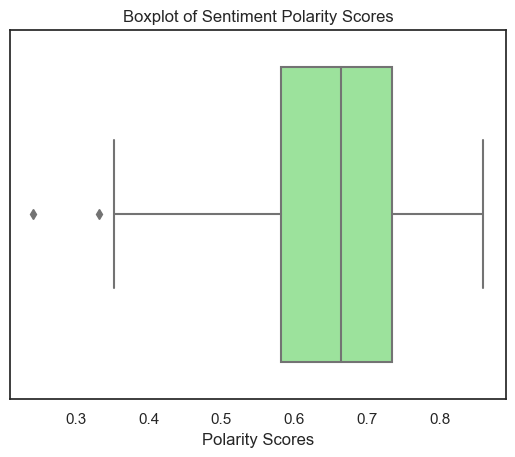

In [189]:
sns.boxplot(x=product_level_avg['avg_review_polarity_vader'], color='lightgreen')
plt.title('Boxplot of Sentiment Polarity Scores')
plt.xlabel('Polarity Scores')
plt.show()

product  avg_review_polarity_vader
0     6815                    0.85990
1     5493                    0.83939
2     2371                    0.83895

product  avg_review_polarity_vader
197     4047                    0.35286
198      518                    0.33239
199     9597                    0.24059

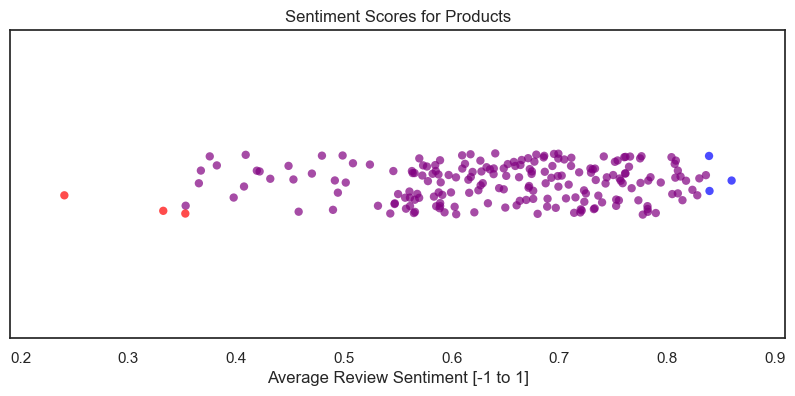

In [190]:
lowest_3 = product_level_avg.head(3)
highest_3 = product_level_avg.tail(3)
display(lowest_3)
display(highest_3)

# Create a color column for highlighting
product_level_avg['Color'] = 'purple'  # Default color
product_level_avg.loc[lowest_3.index, 'Color'] = 'blue'  # Bottom 3 points in red
product_level_avg.loc[highest_3.index, 'Color'] = 'red'  # Top 3 points in blue

plt.figure(figsize=(10,4))
stripplot = sns.stripplot(x='avg_review_polarity_vader',data = product_level_avg, color=product_level_avg['Color'], alpha=0.7, size = 6)

plt.xlim(min(product_level_avg['avg_review_polarity_vader']) - 0.05, max(product_level_avg['avg_review_polarity_vader']) + 0.05)
plt.title('Sentiment Scores for Products')
plt.xlabel('Average Review Sentiment [-1 to 1]')
plt.show()

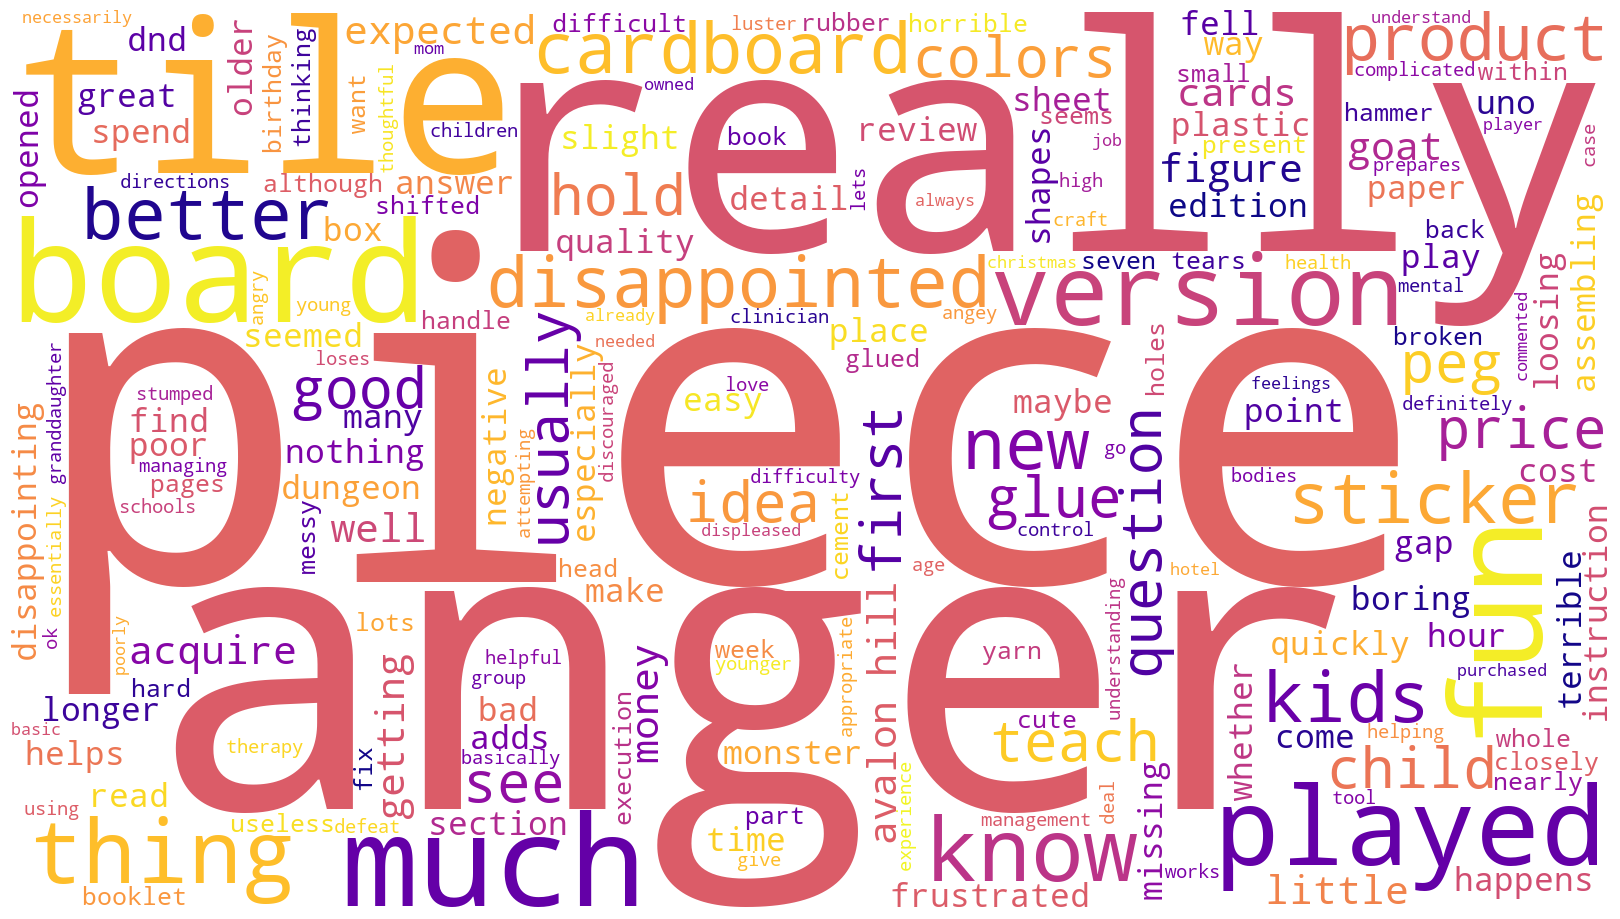

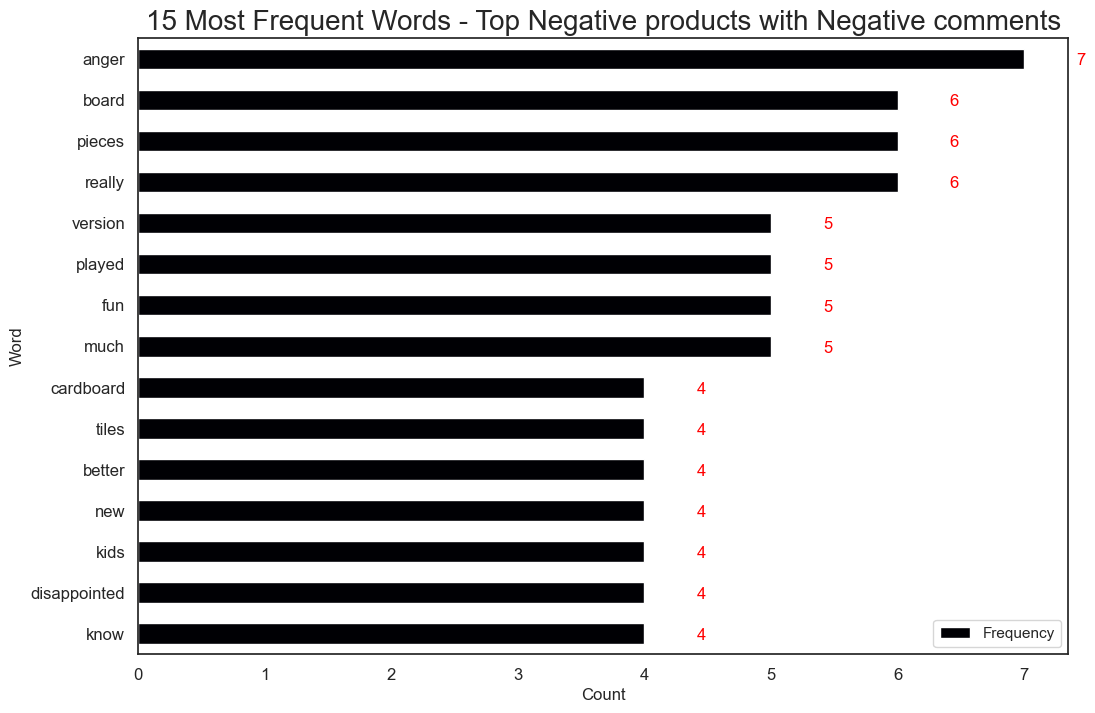

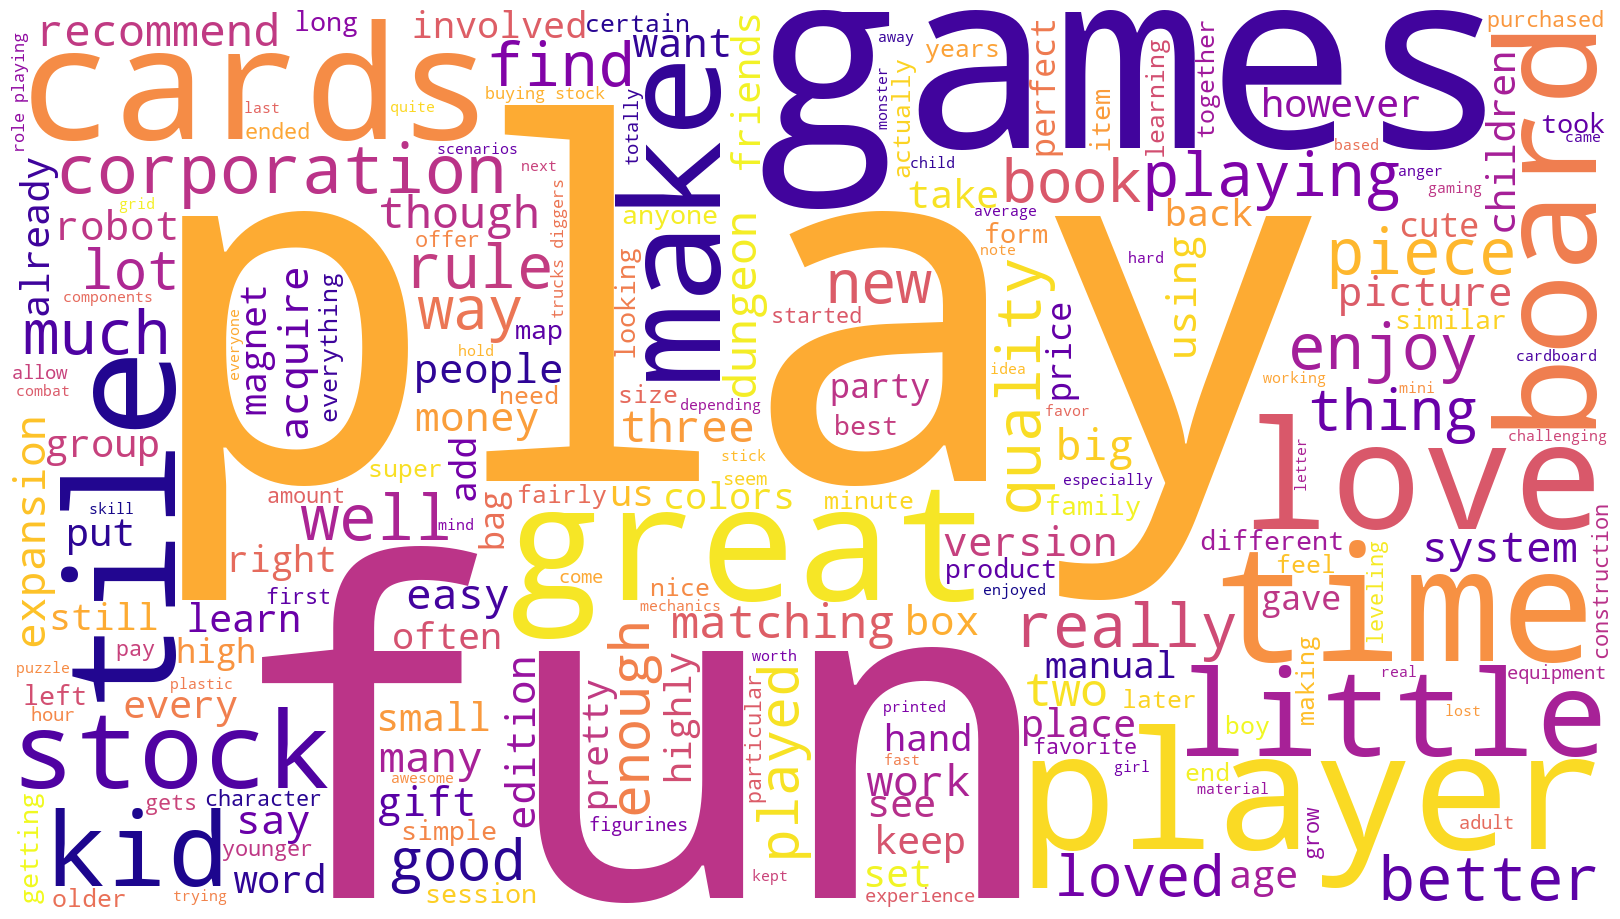

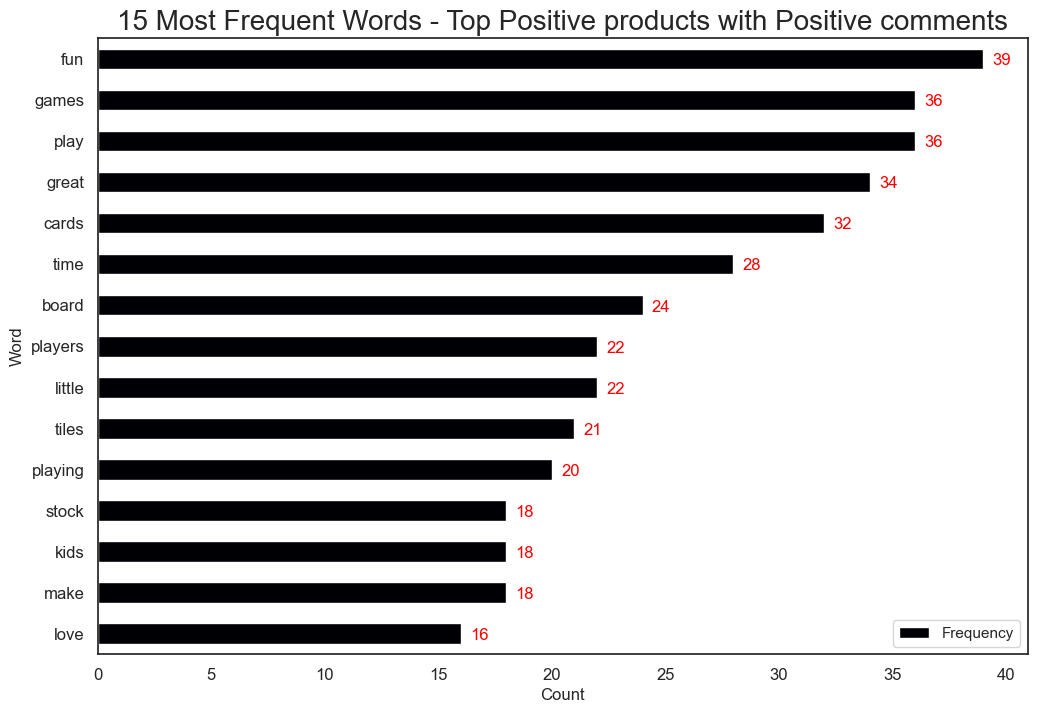

In [191]:
top_neg_prods1 = pd.DataFrame(tgr_combined[(tgr_combined['product'].isin(worst10_neg_prod_ids)) & (tgr_combined['vader_sentiment'] == 'Negative')])
WordCloudGenerator(top_neg_prods1,'rev_tokens')
MostCommonWords(top_neg_prods1['rev_tokens'],'Top Negative products with Negative comments')


top_pos_prods1 = pd.DataFrame(tgr_combined[(tgr_combined['product'].isin(top10_pos_prod_ids)) & (tgr_combined['vader_sentiment'] == 'Positive')])
WordCloudGenerator(top_pos_prods1,'rev_tokens')
MostCommonWords(top_pos_prods1['rev_tokens'],'Top Positive products with Positive comments')

#### 5e. Customer Groups wise Sentiment Analysis

In [347]:
customer_sentiment = pd.DataFrame(tgr_combined[['CustomerType','vader_sentiment']].groupby(['CustomerType','vader_sentiment'])['vader_sentiment'].value_counts()).reset_index()
customer_sentiment = customer_sentiment.pivot(index=['CustomerType'], columns='vader_sentiment', values='count').rename_axis(columns=None).reset_index()
customer_sentiment

CustomerType  Negative  Neutral  Positive
0       Bargain Hunters        18        7       244
1          Basic Buyers        18       18       235
2  Occasional Affluents        25       16       315
3        Premium Buyers        45       25       704
4     Regular Customers        24       11       295

In [349]:
# Calculate cluster-level average review_polarity_vader and review_subjectivity_Tx
cluster_level_avg = tgr_combined.groupby('Cluster').agg(
    avg_review_polarity_vader=('review_polarity_vader', 'mean'),
    avg_review_subjectivity_Tx=('review_subjectivity_Tx', 'mean'),
    common_sentiment = ('vader_sentiment',pd.Series.mode)
).reset_index()

# Display the results
print("\nCluster-Level Average Review Polarity and Subjectivity:")
display(cluster_level_avg)


Cluster-Level Average Review Polarity and Subjectivity:


Cluster  avg_review_polarity_vader  avg_review_subjectivity_Tx  \
0        0                   0.674131                    0.518088   
1        1                   0.616038                    0.538244   
2        2                   0.631156                    0.522950   
3        3                   0.638699                    0.505527   
4        4                   0.642368                    0.501885   

  common_sentiment  
0         Positive  
1         Positive  
2         Positive  
3         Positive  
4         Positive

In [351]:
customer_sentiment['Total'] = customer_sentiment['Negative']+ customer_sentiment['Neutral']	+ customer_sentiment['Positive']
customer_sentiment['Positive % of Total'] = ((customer_sentiment['Positive'] / customer_sentiment['Total'])*100).astype(int)
customer_sentiment['Neutral % of Total'] = ((customer_sentiment['Neutral'] / customer_sentiment['Total'])*100).astype(int)
customer_sentiment['Negative % of Total'] = ((customer_sentiment['Negative'] / customer_sentiment['Total'])*100).astype(int)
customer_sentiment

CustomerType  Negative  Neutral  Positive  Total  \
0       Bargain Hunters        18        7       244    269   
1          Basic Buyers        18       18       235    271   
2  Occasional Affluents        25       16       315    356   
3        Premium Buyers        45       25       704    774   
4     Regular Customers        24       11       295    330   

   Positive % of Total  Neutral % of Total  Negative % of Total  
0                   90                   2                    6  
1                   86                   6                    6  
2                   88                   4                    7  
3                   90                   3                    5  
4                   89                   3                    7

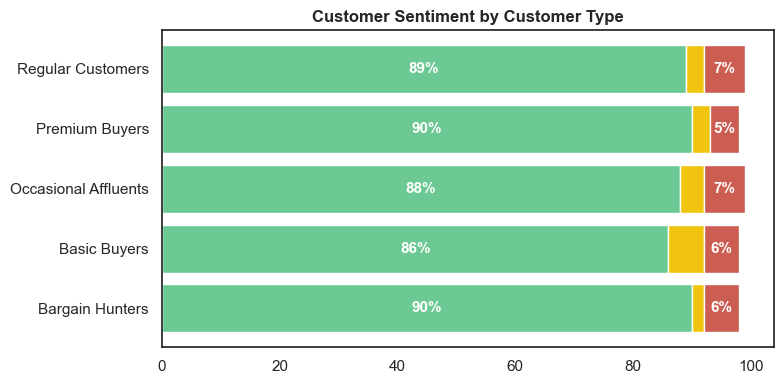

In [353]:
# Stacked bar plot
plt.figure(figsize=(8, 4))
bottom_positive = customer_sentiment['Positive % of Total']
bottom_neutral = bottom_positive + customer_sentiment['Neutral % of Total']

plt.barh(customer_sentiment['CustomerType'], customer_sentiment['Positive % of Total'], label='Positive', color='#6dc994')
plt.barh(customer_sentiment['CustomerType'], customer_sentiment['Neutral % of Total'], left=bottom_positive, label='Neutral', color='#f1c40f')
plt.barh(customer_sentiment['CustomerType'], customer_sentiment['Negative % of Total'], left=bottom_neutral, label='Negative', color='#cc5d52')

# Add labels and title
plt.title('Customer Sentiment by Customer Type', fontsize=12, fontweight='bold')
plt.ylabel('', fontsize=11)
plt.xlabel('', fontsize=11)
#plt.xticks(rotation=0, ha='right')
#plt.legend(title='Sentiment',loc='lower right',bbox_to_anchor=(-0.1,-0.1))

# Add annotations for Positive and Negative
for i, customer in enumerate(customer_sentiment['CustomerType']):
    # Positive annotations
    plt.text(
        customer_sentiment['Positive % of Total'][i] / 2,  # Midpoint of Positive bar
        i,
        f"{customer_sentiment['Positive % of Total'][i]}%", 
        ha='center', 
        va='center', 
        color='white', 
        fontsize=11, 
        fontweight='bold'
    )
    # Negative annotations
    plt.text(
        bottom_neutral[i] + (customer_sentiment['Negative % of Total'][i] / 2),  # Midpoint of Negative bar
        i, 
        f"{customer_sentiment['Negative % of Total'][i]}%", 
        ha='center', 
        va='center', 
        color='white', 
        fontsize=11, 
        fontweight='bold'
    )


# Show the plot
plt.tight_layout()
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #f0e68c;
    border-left: 20px solid #ffd700;
    border-radius: 4px;
    padding: 4px;
    margin: 4px 0;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0">
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Across all customer groups, the overall sentiment is highly positive based on the reviews </li>
        <li style="margin-bottom: 4px;">
            <span style="color: #2c7a7b; font-weight: bold;">&#9679;</span> Further analysis on which product categories these customer types purchase can help enhance the product base and improve purchase patterns. </li>
    </ul>
</div>

### 6. Insights and Recommendations